In [1]:
import os

from google.colab import drive
drive.mount('drive')

!mkdir -p drive -v
#!google-drive-ocamlfuse drive

cwd = os.getcwd()

#### Changez le chemin ci-dessous vers votre repertoire dans votre googledrive
##############################################################################

monchemin = 'drive/My Drive/Colab Notebooks/M2I3A/PSTALN/projet'

dir_path  = os.path.join(cwd, monchemin)
dirs = os.listdir(dir_path)
os.chdir(dir_path)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# Recupération des données bibliovid

In [2]:
import json

In [3]:
with open('bibliovid.json') as json_data:
    data_dict = json.load(json_data)

In [4]:
print("Nombres d'article:",len(data_dict))
print("Avec ces informations pour chacun:")
for i in data_dict:
    for cle, val in i.items():
        print(cle)
    break

Nombres d'article: 682
Avec ces informations pour chacun:
id
slug
title
has_other_authors
impact_factor
goals_plain
verbose_date
authors
document_link
specialties
category
journal
link
results
synthesis
strength_of_evidence_details
goals
methods
pubmed_id
doi
abstract
topics
author_list
publication_date


In [5]:
print('Un exemple d\'articles:')
print(data_dict[1])

Un exemple d'articles:
{'id': 756, 'slug': 'optimal-covid-19-epidemic-control-until-vaccine-deployment', 'title': 'Optimal COVID-19 epidemic control until vaccine deployment', 'has_other_authors': True, 'impact_factor': {'id': 4, 'name': 'Indéterminé', 'posts_count': 96, 'color': 'gray', 'order': 4}, 'goals_plain': 'L\'objectif de cette étude est de déterminer des stratégies permettant le contrôle d\'une épidémie limitant au maximum le nombre de morts dûs à cette épidémie, ainsi que le coût associé à cette politique de contrôle. En particulier, l\'article prend en compte l\'augmentation de la mortalité associée à une saturation du système de santé. Différentes stratégies "réalistes" sont également considérées, comme une politique de contrôle mise à jour à intervalles réguliers, une politique de contrôle constante, ou une alternance entre période de contrôle maximal (type confinement) et minimal.', 'verbose_date': '22.07.2020', 'authors': 'Djidjou-Demasse R', 'document_link': 'https://w

In [6]:
print('Comment sont représentés les spécialités')
print(data_dict[28]['specialties'])

Comment sont représentés les spécialités
[{'id': 21, 'name': 'Confinement/Déconfinement'}]


In [7]:
print('Un exemple d\'abstract')
print(data_dict[0]['abstract'])

Un exemple d'abstract
Obesity is a risk factor for pneumonia and acute respiratory distress syndrome.
To determine whether obesity is associated with intubation or death, inflammation, cardiac injury, or fibrinolysis in coronavirus disease 2019 (COVID-19).
Retrospective cohort study.
A quaternary academic medical center and community hospital in New York City.
2466 adults hospitalized with laboratory-confirmed severe acute respiratory syndrome coronavirus 2 infection over a 45-day period with at least 47 days of in-hospital observation.
Body mass index (BMI), admission biomarkers of inflammation (C-reactive protein [CRP] level and erythrocyte sedimentation rate [ESR]), cardiac injury (troponin level), and fibrinolysis (D-dimer level). The primary end point was a composite of intubation or death in time-to-event analysis.
Over a median hospital length of stay of 7 days (interquartile range, 3 to 14 days), 533 patients (22%) were intubated, 627 (25%) died, and 59 (2%) remained hospitaliz

In [8]:
specialties = {} # dictionnaire id -> specialité
nb_per_spe = {}  # nombres d'articles par spécialité

In [9]:
ind_spe = 0
for article in data_dict:
    for spe in article['specialties']:
        if spe['name'] not in specialties.keys():
            specialties[spe['name']] = ind_spe
            nb_per_spe[spe['name']] = 0
            ind_spe += 1
        nb_per_spe[spe['name']] += 1

In [10]:
LABELS = list(specialties.keys())
LABELS

['Anesthésie-Réanimation',
 'Infectiologie',
 'Transversale',
 'Immunité',
 'Virologie',
 'Confinement/Déconfinement',
 'Pédiatrie',
 'Pneumologie',
 'Gynécologie Obstétrique',
 'Gériatrie',
 'Cardiologie et maladies métaboliques',
 'Hygiène',
 'Hépato-gastro-entérologie',
 'Neurologie',
 'Radiologie',
 'Dermatologie',
 'Hématologie',
 'Psychiatrie',
 'Néphrologie']

In [ ]:
print('Un exemple d\'articles:')
print(data_dict[1])

Un exemple d'articles:
{'id': 756, 'slug': 'optimal-covid-19-epidemic-control-until-vaccine-deployment', 'title': 'Optimal COVID-19 epidemic control until vaccine deployment', 'has_other_authors': True, 'impact_factor': {'id': 4, 'name': 'Indéterminé', 'posts_count': 96, 'color': 'gray', 'order': 4}, 'goals_plain': 'L\'objectif de cette étude est de déterminer des stratégies permettant le contrôle d\'une épidémie limitant au maximum le nombre de morts dûs à cette épidémie, ainsi que le coût associé à cette politique de contrôle. En particulier, l\'article prend en compte l\'augmentation de la mortalité associée à une saturation du système de santé. Différentes stratégies "réalistes" sont également considérées, comme une politique de contrôle mise à jour à intervalles réguliers, une politique de contrôle constante, ou une alternance entre période de contrôle maximal (type confinement) et minimal.', 'verbose_date': '22.07.2020', 'authors': 'Djidjou-Demasse R', 'document_link': 'https://w

In [ ]:
print('Comment sont représentés les spécialités')
print(data_dict[28]['specialties'])

Comment sont représentés les spécialités
[{'id': 21, 'name': 'Confinement/Déconfinement'}]


In [ ]:
print('Un exemple d\'abstract')
print(data_dict[0]['abstract'])

Un exemple d'abstract
Obesity is a risk factor for pneumonia and acute respiratory distress syndrome.
To determine whether obesity is associated with intubation or death, inflammation, cardiac injury, or fibrinolysis in coronavirus disease 2019 (COVID-19).
Retrospective cohort study.
A quaternary academic medical center and community hospital in New York City.
2466 adults hospitalized with laboratory-confirmed severe acute respiratory syndrome coronavirus 2 infection over a 45-day period with at least 47 days of in-hospital observation.
Body mass index (BMI), admission biomarkers of inflammation (C-reactive protein [CRP] level and erythrocyte sedimentation rate [ESR]), cardiac injury (troponin level), and fibrinolysis (D-dimer level). The primary end point was a composite of intubation or death in time-to-event analysis.
Over a median hospital length of stay of 7 days (interquartile range, 3 to 14 days), 533 patients (22%) were intubated, 627 (25%) died, and 59 (2%) remained hospitaliz

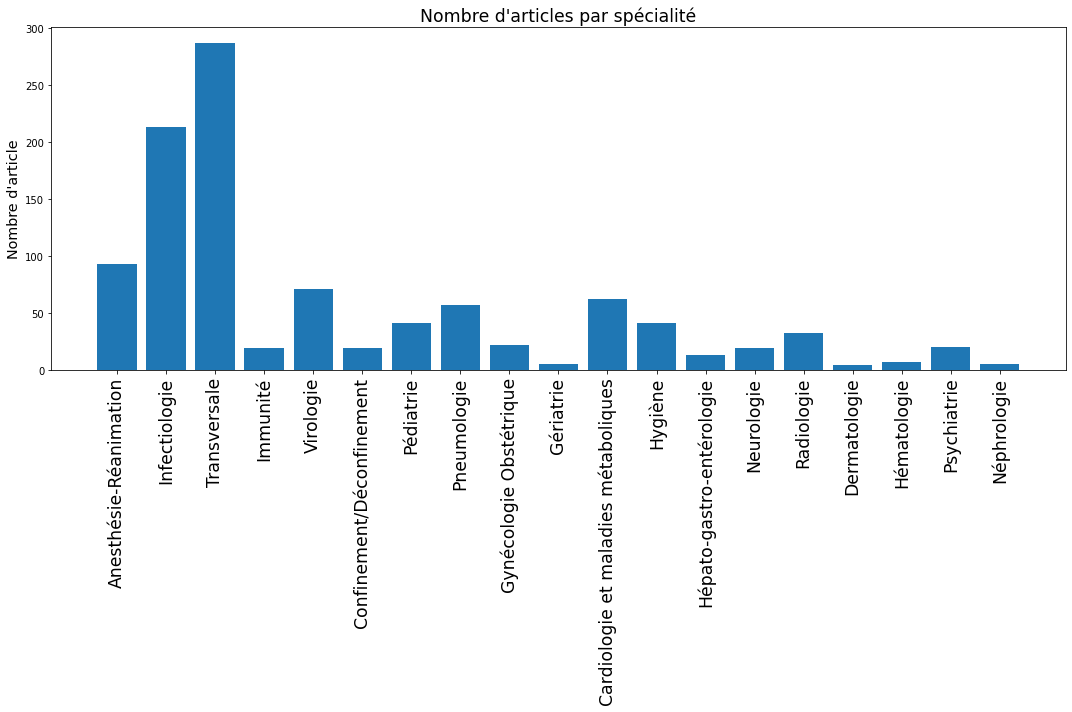

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(15,10))
plt.bar(np.arange(19), nb_per_spe.values())
plt.title('Nombre d\'articles par spécialité',size='xx-large')
plt.ylabel('Nombre d\'article',size='x-large')
plt.xticks(np.arange(19), nb_per_spe.keys(), rotation='vertical',size='xx-large')
plt.tight_layout()
fig.savefig('nbre_par_spe.png')
plt.show()

On remarque que certaines spécialités sont très peu représentés (Dermatologie, Gériatrie, Néphrologie), ce qui risque de poser problèmes pour des modèles entrainés depuis 0.

Au contraire, nous avons beaucoup d'exemples pour la spécialité "Transversale", et ce n'est sûrement pas très pertinent car cette spécialité va finalement en englober plusieurs et cela risque de "brouiller" nos classifieurs. On pourrait par exemple mettre la spécialité Transversale si on a déjà prédit 2 spécialité pour l'article.

# Préparation des données

On va récupérer les données qui nous intéresse.

In [ ]:
import utils
texts, Y = utils.get_data(data_dict, get_abstract = False)

In [ ]:
print("y shape:",Y.shape)

y shape: (682, 19)


Sur les 682 articles que l'on a, on en a 207 qui n'ont pas d'abstract. On va tenter dans un premier temps de prédire la classe seulement avec le titre afin que toutes les données fassent à peu près la même longueur.

Nous allons utiliser les représentations CountVectorizer et TfidVectorizer.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer(stop_words="english", max_features=2000, min_df=1)  #max_df
vect.fit(texts)
vect2 = TfidfVectorizer(stop_words="english", max_features=2000, min_df=1)  #max_df
vect2.fit(texts)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=2000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
print("TfidVectorizer")
print("Vocabulary size: {}".format(len(vect2.vocabulary_)))
print("Vocabulary content:\n {}".format(vect2.vocabulary_))

TfidVectorizer
Vocabulary size: 1792
Vocabulary content:
 {'body': 220, 'mass': 978, 'index': 809, 'risk': 1411, 'intubation': 868, 'death': 420, 'sars': 1429, 'cov': 391, 'infection': 821, 'retrospective': 1399, 'cohort': 307, 'study': 1566, 'optimal': 1120, 'covid': 393, '19': 21, 'epidemic': 559, 'control': 359, 'vaccine': 1725, 'deployment': 439, 'contact': 348, 'rate': 1319, 'equilibrium': 565, 'view': 1750, 'hydroxychloroquine': 744, 'treatment': 1673, 'prophylaxis': 1278, 'non': 1092, 'human': 739, 'primates': 1254, 'infectivity': 824, 'profile': 1266, 'correction': 378, 'mrna': 1039, 'preliminary': 1241, 'report': 1376, 'pathophysiology': 1155, 'transmission': 1665, 'diagnosis': 463, 'coronavirus': 376, 'disease': 483, '2019': 25, 'review': 1404, 'introductions': 866, 'early': 520, 'spread': 1529, 'france': 671, '24': 32, 'january': 888, '23': 31, 'march': 972, '2020': 27, 'opensafely': 1118, 'factors': 623, 'associated': 178, '17': 20, 'million': 1014, 'patients': 1157, 'model

In [ ]:
bag_of_words = vect.transform(texts)
bag_of_words2 = vect2.transform(texts)


## Séparation test / train

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bag_of_words2, Y, test_size=0.2, random_state=42)#, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(490, 1000) (490, 19)
(55, 1000) (55, 19)
(137, 1000) (137, 19)


# Multi-Label Classifiers

### Knn
On va d'abord tester avec les modèles sk-learn qui nous permettent de traiter les problèmes multi-label. Ci-dessous les modèles sont entrainés seulement avec les titres des articles avec une représentation TFid. Nous avons tester aussi avec les abstract et/ ou la représentation CountVectorizer mais c'était moins bon (voir résultats dans rapport).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
k_range = list(range(1,15))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 3, scoring = 'f1_micro')
grid.fit(X_train,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.4530529128535257
{'n_neighbors': 4, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')


In [ ]:
from sklearn.metrics import f1_score
import pandas as pd

best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)
score = f1_score(y_test,y_pred , average='micro',zero_division=0)
score

0.47230320699708456

In [ ]:
KNN = {'f1-micro':score, 'f1-macro':f1_score(y_test,y_pred , average='macro',zero_division=0),'f1-weighted': f1_score(y_test,y_pred , average='weighted',zero_division=0),'f1-samples':f1_score(y_test,y_pred , average='samples',zero_division=0)}
KNN

{'f1-macro': 0.3651784324114907,
 'f1-micro': 0.47230320699708456,
 'f1-samples': 0.4233576642335766,
 'f1-weighted': 0.460829595665916}

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forestClf = RandomForestClassifier()
forestClf.fit(X_train,y_train)
forestPredictions = forestClf.predict(X_test)
print(f1_score(y_test,forestPredictions , average='samples',zero_division=0))
# forestClf.score( X_test, y_test)

0.3581508515815085


In [ ]:
RandomForest= {'f1-micro':score, 'f1-macro':f1_score(y_test,y_pred , average='macro',zero_division=0),'f1-weighted': f1_score(y_test,y_pred , average='weighted',zero_division=0),'f1-samples':f1_score(y_test,y_pred , average='samples',zero_division=0)}
RandomForest

{'f1-macro': 0.17046623714922368,
 'f1-micro': 0.4153284671532846,
 'f1-samples': 0.4153284671532846,
 'f1-weighted': 0.34355182231069625}

In [ ]:
scores_tfid = pd.DataFrame(index=['KNN', 'Random Forest'], columns=['f1-micro', 'f1-macro','f1-weighted','f1-samples'])
scores_tfid.loc['KNN'] = pd.Series(KNN)
scores_tfid.loc['Random Forest'] = pd.Series(RandomForest)
scores_tfid

,f1-micro,f1-macro,f1-weighted,f1-samples
KNN,0.472303,0.365178,0.46083,0.423358
Random Forest,0.415328,0.170466,0.343552,0.415328


#### GridSearch MLP, Random Forest, Knn

In [ ]:
pip install scikit-multilearn --upgrade

Requirement already up-to-date: scikit-multilearn in /usr/local/lib/python3.6/dist-packages (0.2.0)


In [ ]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from skmultilearn.adapt import MLkNN
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from IPython.display import display

In [ ]:
#grid
names = ["Arbre de décision", "Forêt", "Knn", "MLP", "Bagging", "boosting", "Lin SVC"]#, "MLknn"]
classifiers = [
DecisionTreeClassifier(),
RandomForestClassifier(),
KNeighborsClassifier( metric='minkowski'),
MLPClassifier(max_iter=10000),
OneVsRestClassifier(BaggingClassifier(n_jobs=-1)),
OneVsRestClassifier(GradientBoostingClassifier()),
OneVsRestClassifier(LinearSVC(), n_jobs=-1),
# MLkNN()
]
parameters = [{"criterion":("gini", "entropy")},
              {"criterion":("gini", "entropy"), "n_estimators":(100, 150, 200)}, 
              {"n_neighbors":(1, 5), "p":(1,2), "weights":("uniform", "distance")},
              {"alpha":(0.00001, 0.0001, 0.001)},
              {}, 
              {},
              {}
          # {"k":(1, 10, 20)},
          ]
#boucle
bparam = []
bscore_train = []
bscore_test = []
auc_score = []

for name, clf, param in zip(names, classifiers, parameters):
    classif = GridSearchCV(clf, param, cv = 3,
                       scoring=make_scorer(f1_score, average='micro'))

    #score
    classif.fit(X_train, y_train)
    bparam.append(classif.best_params_)
    bscore_train.append(classif.best_score_) 
    bscore_test.append(classif.score(X_test, y_test)) 

#dataframe
classifier_names = pd.Series(names)
best_param = pd.Series(bparam)
best_score_train = pd.Series(bscore_train)
best_score_test = pd.Series(bscore_test)
df = pd.DataFrame({ 'Classifieurs': classifier_names, 
                 'Meilleur paramètre': best_param, 
                 'Meilleur score': best_score_train,
                 'F1-score (généralisation)': best_score_test,
                 })
display(df)

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 15 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 15 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 15 is present in all training examples.
  str(classes[c]))


,Classifieurs,Meilleur paramètre,Meilleur score,F1-score (généralisation)
0,Arbre de décision,{'criterion': 'gini'},0.401894,0.422392
1,Forêt,"{'criterion': 'gini', 'n_estimators': 200}",0.362304,0.391304
2,Knn,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.418332,0.444444
3,MLP,{'alpha': 0.0001},0.431186,0.408408
4,Bagging,{},0.395103,0.376238
5,boosting,{},0.422717,0.357827
6,MNB,{},0.172625,0.179592
7,Lin SVC,{},0.396065,0.380952


#### Prédictions des classes une par une : stratégie one vs rest

On fait une régréssion logistique binaire pour tous les labels pour prédire si oui ou non on aura ce label pour ce texte. (inspiré de https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff)

On suppose donc ici qu'il n'y a pas de corrélation entre les labels.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

In [ ]:
for label in range(len(LABELS)):
    print('**Label {} **'.format(LABELS[label]))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train, y_train[:,label])
    print("Entrainé avec ",np.shape(np.where(y_train[:,label]==1))[1],"exemples avec ce label")
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Accuracy: {}'.format(accuracy_score(y_test[:,label], prediction)))
    print("Testé sur ",np.shape(np.where(y_test[:,label]==1))[1],"exemples")
    print("\n")

**Label Anesthésie-Réanimation **
Entrainé avec  77 exemples avec ce label
Accuracy: 0.8832116788321168
Testé sur  16 exemples


**Label Infectiologie **
Entrainé avec  172 exemples avec ce label
Accuracy: 0.7372262773722628
Testé sur  41 exemples


**Label Transversale **
Entrainé avec  227 exemples avec ce label
Accuracy: 0.6204379562043796
Testé sur  60 exemples


**Label Immunité **
Entrainé avec  18 exemples avec ce label
Accuracy: 0.9927007299270073
Testé sur  1 exemples


**Label Virologie **
Entrainé avec  63 exemples avec ce label
Accuracy: 0.9416058394160584
Testé sur  8 exemples


**Label Confinement/Déconfinement **
Entrainé avec  16 exemples avec ce label
Accuracy: 0.9781021897810219
Testé sur  3 exemples


**Label Pédiatrie **
Entrainé avec  31 exemples avec ce label
Accuracy: 0.927007299270073
Testé sur  10 exemples


**Label Pneumologie **
Entrainé avec  47 exemples avec ce label
Accuracy: 0.927007299270073
Testé sur  10 exemples


**Label Gynécologie Obstétrique **
Ent

In [ ]:
SVC_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

for label in range(len(LABELS)):
    print('**Label {} **'.format(LABELS[label]))
    
    # Training logistic regression model on train data
    SVC_pipeline.fit(X_train, y_train[:,label])
    print("Entrainé avec ",np.shape(np.where(y_train[:,label]==1))[1],"exemples avec ce label")
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Accuracy: {}'.format(accuracy_score(y_test[:,label], prediction)))
    print("Testé sur ",np.shape(np.where(y_test[:,label]==1))[1],"exemples")
    print("\n")

**Label Anesthésie-Réanimation **
Entrainé avec  77 exemples avec ce label
Accuracy: 0.8832116788321168
Testé sur  16 exemples


**Label Infectiologie **
Entrainé avec  172 exemples avec ce label
Accuracy: 0.7007299270072993
Testé sur  41 exemples


**Label Transversale **
Entrainé avec  227 exemples avec ce label
Accuracy: 0.5620437956204379
Testé sur  60 exemples


**Label Immunité **
Entrainé avec  18 exemples avec ce label
Accuracy: 0.9927007299270073
Testé sur  1 exemples


**Label Virologie **
Entrainé avec  63 exemples avec ce label
Accuracy: 0.9416058394160584
Testé sur  8 exemples


**Label Confinement/Déconfinement **
Entrainé avec  16 exemples avec ce label
Accuracy: 0.9781021897810219
Testé sur  3 exemples


**Label Pédiatrie **
Entrainé avec  31 exemples avec ce label
Accuracy: 0.927007299270073
Testé sur  10 exemples


**Label Pneumologie **
Entrainé avec  47 exemples avec ce label
Accuracy: 0.927007299270073
Testé sur  10 exemples


**Label Gynécologie Obstétrique **
Ent

In [ ]:
NB_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

for label in range(len(LABELS)):
    print('**Label {} **'.format(LABELS[label]))
    
    # Training logistic regression model on train data
    NB_pipeline.fit(X_train, y_train[:,label])
    print("Entrainé avec ",np.shape(np.where(y_train[:,label]==1))[1],"exemples avec ce label")
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Accuracy: {}'.format(accuracy_score(y_test[:,label], prediction)))
    print("Testé sur ",np.shape(np.where(y_test[:,label]==1))[1],"exemples")
    print("\n")

**Label Anesthésie-Réanimation **
Entrainé avec  77 exemples avec ce label
Accuracy: 0.8832116788321168
Testé sur  16 exemples


**Label Infectiologie **
Entrainé avec  172 exemples avec ce label
Accuracy: 0.7007299270072993
Testé sur  41 exemples


**Label Transversale **
Entrainé avec  227 exemples avec ce label
Accuracy: 0.5620437956204379
Testé sur  60 exemples


**Label Immunité **
Entrainé avec  18 exemples avec ce label
Accuracy: 0.9927007299270073
Testé sur  1 exemples


**Label Virologie **
Entrainé avec  63 exemples avec ce label
Accuracy: 0.9416058394160584
Testé sur  8 exemples


**Label Confinement/Déconfinement **
Entrainé avec  16 exemples avec ce label
Accuracy: 0.9781021897810219
Testé sur  3 exemples


**Label Pédiatrie **
Entrainé avec  31 exemples avec ce label
Accuracy: 0.927007299270073
Testé sur  10 exemples


**Label Pneumologie **
Entrainé avec  47 exemples avec ce label
Accuracy: 0.927007299270073
Testé sur  10 exemples


**Label Gynécologie Obstétrique **
Ent

Nous obtenons donc 19 classifieurs (1 pour chaque spécialité) expert sur sa spécialité, mais finalement ça ne parait pas pertinent car il y a des spécialités où il y a trop peu de données, le classifieur ne peut pas apprendre grand chose de cette manière. Nous n'irons donc pas plus loin pour cette approche.

## Conclusion

Les classifieurs "classiques" multilabels ne nous permettent pas d'avoir de bons résultats au vu du manque de certaines données. Nous allons maintenant tester et nous concentrer sur des méthodes deep, comme par exemple le modèle BioBert déjà pré-entrainé sur des données médicales qui permet (il parait), de bons résultats même avec très peu de données.

#  Construction des Data loaders

In [11]:
import numpy as np
import keras

titre_abstract, spe = [],[] 

for article in data_dict:
    t = article['title'] 
    if 'abstract' in article.keys():
        t += ' '
        t += str(article['abstract'])
    titre_abstract.append(t[:512])
    temp = []
    for s in article['specialties']:
      temp.append(s['name'])
    spe.append(temp)
  
print(len(titre_abstract))
print(len(spe))
print(spe[:5])

682
682
[['Anesthésie-Réanimation', 'Infectiologie'], ['Infectiologie'], ['Infectiologie'], ['Transversale', 'Infectiologie'], ['Infectiologie']]


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y_bin = mlb.fit_transform(spe)
classes = mlb.classes_
classes

train_texts, test_texts, y_train, y_test, train_labels, test_labels = train_test_split(titre_abstract, spe, y_bin, test_size=0.25, random_state=42)
train_texts, valid_texts, y_train, y_valid, train_labels, valid_labels = train_test_split(train_texts, y_train, train_labels, test_size=0.2, random_state=42)

In [13]:
!pip -q install transformers
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.1')

def bert_text_to_ids(sentence):
  return torch.tensor(tokenizer.encode(sentence, add_special_tokens=True))


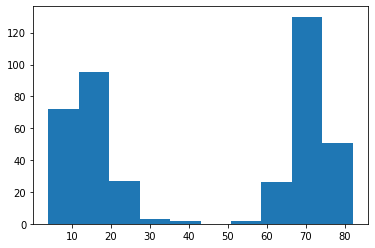

In [14]:
from matplotlib import pyplot as plt
plt.hist([len(text.split()) for text in train_texts])
plt.show()

In [15]:
import collections
import torch
label_vocab = collections.defaultdict(lambda: len(label_vocab))
MAXLEN = 80
batch_size = 32
hidden_size = 128
embed_size = 128
DEVICE = torch.device('cuda')

def prepare_texts(texts, labels):
  X = torch.LongTensor(len(texts), MAXLEN).fill_(tokenizer.pad_token_id)
  for i, text in enumerate(texts):
    indexed_tokens = bert_text_to_ids(text)
    length = min([MAXLEN, len(indexed_tokens)])
    X[i,:length] = indexed_tokens[:length]
  
  Y = torch.tensor(labels).long()
  return X.to(DEVICE), Y.to(DEVICE)

X_train, y_train = prepare_texts(train_texts, train_labels)
X_valid, y_valid = prepare_texts(valid_texts, valid_labels)
X_test, y_test = prepare_texts(test_texts, test_labels)

In [16]:
print(X_train.shape, X_test.shape, X_valid.shape)
print(y_train.shape, y_test.shape, y_valid.shape)

torch.Size([408, 80]) torch.Size([171, 80]) torch.Size([103, 80])
torch.Size([408, 19]) torch.Size([171, 19]) torch.Size([103, 19])


In [17]:
from torch.utils.data import TensorDataset, DataLoader

train_set = TensorDataset(X_train, y_train)
valid_set = TensorDataset(X_valid, y_valid)
test_set = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size)
test_loader = DataLoader(test_set, batch_size=batch_size)

# RNN Classifier

## class RNN classifier 

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [19]:
class RNNClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.embed = nn.Embedding(tokenizer.vocab_size, embed_size, padding_idx=tokenizer.pad_token_id)
    self.rnn = nn.GRU(embed_size, hidden_size, num_layers=1, bidirectional=True, batch_first=True)
    self.dropout = nn.Dropout(0.3)
    self.decision = nn.Linear(1 * 2 * hidden_size, len(LABELS))
    self.to(DEVICE)
  
  def forward(self, x):
    embed = self.embed(x)
    output, hidden = self.rnn(embed) 
    drop = self.dropout(hidden.transpose(0, 1).reshape(x.shape[0], -1))
    return torch.softmax(self.decision(drop),1)

rnn_model = RNNClassifier()
with torch.no_grad():
  print(rnn_model(X_train[:3]).shape)

torch.Size([3, 19])


## Performance et entraînement RNN classifier 

Reprise du notebook sur litcovid pour les fonctions de performances et de fit en multi label

In [20]:
def CrossEntropyLossOneHot(y_score=None, y=None):
    """CrossEntropy pour la multi classification
    """
    log_y_score = torch.log(y_score)
    cost = -torch.sum(y * log_y_score)
    return cost

def perf(model, loader, seuil:float=2e-1):
    """Evaluation en multi-label, le seuil désigne le niveau a partir duquel on considère une classe comme 'prédite'
    """
    criterion = CrossEntropyLossOneHot
    model.eval()
    total_loss = num = num_comp = correct = 0
    total_pred = true_y = None # concaténation des batchs
    for x, y in loader:
        with torch.no_grad():
            y_scores = model(x)
            loss = criterion(y_scores, y)
            y_pred = multi_hot(y_scores, seuil)
            if total_pred == None: # concat
                total_pred = y_pred
                true_y = y
            else:
                total_pred = torch.cat((total_pred,y_pred), dim=0)
                true_y = torch.cat((true_y,y), dim=0)
            correct += torch.sum(y_pred == y).item()
            total_loss += loss.item()
            num_comp += len(y) * len(LABELS)
            num += len(y)

    f_score = f1_score(true_y.cpu(), total_pred.cpu(), average='micro')
    accu_score = accuracy_score(true_y.cpu(), total_pred.cpu())
    return total_loss / num, correct / num_comp, accu_score, f_score

In [21]:
def multi_hot(y_pred, seuil=2e-1):
    """binarize prediction using threshold
    """
    res = torch.zeros(y_pred.shape[0], y_pred.shape[1])#.int()
    res[torch.arange(y_pred.shape[0]), torch.argmax(y_pred, dim=1)] = 1
    for i in range(y_pred.shape[0]):
        for j in range(y_pred.shape[1]):
            if y_pred[i,j] > seuil:
                res[i,j] = 1
    return res.to(DEVICE)

In [22]:
def fit_rnn(model, train_loader, epochs, lr=1e-3, seuil=2e-1): 
    criterion = CrossEntropyLossOneHot
    optimizer = optim.Adam(model.parameters(), lr=lr)

    history  = {
        'train_losses' : [],
        'val_losses' : [],
        'preci' : [],
        'all_good_preci' : [],
        'f_micro' : [],
    }

    for epoch in range(epochs):
        model.train()
        total_loss = num = 0
        for x, y in tqdm(train_loader):
            optimizer.zero_grad()
            y_scores = model(x)
            loss = criterion(y_scores, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            num += len(y)

        valloss, preci, accu_score, f_mesure = perf(model, valid_loader, seuil)
        history['train_losses'].append(total_loss / num)
        history['val_losses'].append(valloss)
        history['preci'].append(preci)
        history['all_good_preci'].append(accu_score)
        history['f_micro'].append(f_mesure)

        print(f'\nepoch : {epoch}\t - train loss : {total_loss / num}\t - val loss : {valloss}\t - precision :{preci}\t - all good precision : {accu_score}\t - f-score micro : {f_mesure}')

    return history

In [ ]:
history_rnnclassif = fit_rnn(rnn_model, train_loader, 10)

## Tests pour la paramétrisation

In [ ]:
def print_history_test(hist:dict, losses:bool=True, preci:bool=True, all_good_preci:bool=True, f_micro:bool=True):
    
    nb_epoch = len(hist['train_losses'])
    x = np.arange(0,nb_epoch)
    plt.figure()
    if losses:
      plt.subplot(131)
      plt.plot(x,hist['train_losses'], label='train')
      plt.plot(x,hist['val_losses'], label='val')
      plt.xlabel('Epoch')
      plt.ylabel('Losses')
      plt.legend()
    
    if [f_micro]:
      plt.subplot(133)
      plt.plot(x,hist['f_micro'])
      plt.xlabel('Epoch')
      plt.ylabel('f_score mean')
      plt.show()


100%|██████████| 13/13 [00:00<00:00, 100.61it/s]


epoch : 0	 - train loss : 3.0760636797138288	 - val loss : 3.7630390426487597	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 100.43it/s]


epoch : 1	 - train loss : 3.080973980473537	 - val loss : 3.763143076480014	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 112.09it/s]


epoch : 2	 - train loss : 3.0804339764164945	 - val loss : 3.7631736310940345	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 112.50it/s]


epoch : 0	 - train loss : 3.0805733437631644	 - val loss : 3.7631540020692698	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 111.56it/s]


epoch : 1	 - train loss : 3.0673852995330213	 - val loss : 3.763120354957951	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 111.65it/s]


epoch : 2	 - train loss : 3.079103114558201	 - val loss : 3.7631170217273304	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 105.02it/s]


epoch : 0	 - train loss : 3.080460828893325	 - val loss : 3.763120836424596	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 113.84it/s]


epoch : 1	 - train loss : 3.082565887301576	 - val loss : 3.763115947686353	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 108.37it/s]


epoch : 2	 - train loss : 3.0789010478001013	 - val loss : 3.763113818122345	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 112.98it/s]


epoch : 0	 - train loss : 3.085347661785051	 - val loss : 3.7631137625685014	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 112.70it/s]


epoch : 1	 - train loss : 3.0799122978659237	 - val loss : 3.763113707014658	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 110.60it/s]


epoch : 2	 - train loss : 3.0729730643478095	 - val loss : 3.7631137440505538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 111.95it/s]


epoch : 0	 - train loss : 3.0666898652619006	 - val loss : 3.763113818122345	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 112.87it/s]


epoch : 1	 - train loss : 3.081204713559618	 - val loss : 3.7631137440505538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 109.47it/s]


epoch : 2	 - train loss : 3.0751985662123738	 - val loss : 3.7631137440505538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 110.38it/s]


epoch : 0	 - train loss : 3.0807272967170265	 - val loss : 3.763113818122345	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 113.50it/s]


epoch : 1	 - train loss : 3.0693789930904614	 - val loss : 3.7631137440505538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 112.75it/s]


epoch : 2	 - train loss : 3.0769934373743393	 - val loss : 3.763113818122345	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 114.03it/s]


epoch : 0	 - train loss : 3.087833516737994	 - val loss : 3.7631137440505538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 112.89it/s]


epoch : 1	 - train loss : 3.082494530023313	 - val loss : 3.7631137440505538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 106.33it/s]


epoch : 2	 - train loss : 3.087845390918208	 - val loss : 3.7631137440505538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 112.41it/s]


epoch : 0	 - train loss : 3.0868415458529603	 - val loss : 3.7631137440505538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 115.00it/s]


epoch : 1	 - train loss : 3.0736022089041914	 - val loss : 3.7631137440505538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 114.08it/s]


epoch : 2	 - train loss : 3.0778486962411917	 - val loss : 3.7631137440505538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 113.11it/s]


epoch : 0	 - train loss : 3.0849020340863396	 - val loss : 3.7631137440505538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 109.24it/s]


epoch : 1	 - train loss : 3.077949037738875	 - val loss : 3.7631137440505538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303



100%|██████████| 13/13 [00:00<00:00, 113.21it/s]


epoch : 2	 - train loss : 3.081500820085114	 - val loss : 3.7631137440505538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 113.56it/s]


epoch : 0	 - train loss : 3.0732712652169023	 - val loss : 3.762630907077234	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 109.87it/s]


epoch : 1	 - train loss : 3.0805373098336015	 - val loss : 3.762499892595902	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 113.35it/s]


epoch : 2	 - train loss : 3.072534635955212	 - val loss : 3.762550724362864	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111
seuil : 0.01 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 115.39it/s]


epoch : 0	 - train loss : 3.0770917219274185	 - val loss : 3.7625260954921687	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 109.13it/s]


epoch : 1	 - train loss : 3.0773801803588867	 - val loss : 3.7625153921182872	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 111.97it/s]


epoch : 2	 - train loss : 3.0735709433462106	 - val loss : 3.762521058610342	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111
seuil : 0.01 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 106.49it/s]


epoch : 0	 - train loss : 3.071531164879892	 - val loss : 3.762521743774414	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 114.12it/s]


epoch : 1	 - train loss : 3.075640771903244	 - val loss : 3.762524132589692	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 113.99it/s]


epoch : 2	 - train loss : 3.0817621642468023	 - val loss : 3.7625235770512555	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111
seuil : 0.01 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 112.62it/s]


epoch : 0	 - train loss : 3.071658826341816	 - val loss : 3.762524132589692	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 104.54it/s]


epoch : 1	 - train loss : 3.075066042881386	 - val loss : 3.7625238733384214	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 113.88it/s]


epoch : 2	 - train loss : 3.07950356427361	 - val loss : 3.7625238733384214	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111
seuil : 0.01 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 112.37it/s]


epoch : 0	 - train loss : 3.06599770340265	 - val loss : 3.76252379926663	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 113.19it/s]


epoch : 1	 - train loss : 3.0769838071336935	 - val loss : 3.7625238733384214	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 108.57it/s]


epoch : 2	 - train loss : 3.0683328965130974	 - val loss : 3.76252379926663	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111
seuil : 0.01 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 111.22it/s]


epoch : 0	 - train loss : 3.0632014929079543	 - val loss : 3.7625238733384214	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 113.16it/s]


epoch : 1	 - train loss : 3.0821721320058786	 - val loss : 3.76252379926663	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 113.77it/s]


epoch : 2	 - train loss : 3.0724300216226017	 - val loss : 3.76252379926663	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111
seuil : 0.01 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 101.23it/s]


epoch : 0	 - train loss : 3.0830898097917143	 - val loss : 3.76252379926663	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 114.72it/s]


epoch : 1	 - train loss : 3.0672509623508826	 - val loss : 3.76252379926663	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 113.43it/s]


epoch : 2	 - train loss : 3.058881179959166	 - val loss : 3.76252379926663	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111
seuil : 0.01 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 111.28it/s]


epoch : 0	 - train loss : 3.069584659501618	 - val loss : 3.76252379926663	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 112.19it/s]


epoch : 1	 - train loss : 3.0571770574532304	 - val loss : 3.76252379926663	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 114.02it/s]


epoch : 2	 - train loss : 3.070283141790652	 - val loss : 3.76252379926663	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111
seuil : 0.01 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 114.49it/s]


epoch : 0	 - train loss : 3.054318297143076	 - val loss : 3.76252379926663	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 114.95it/s]


epoch : 1	 - train loss : 3.068579636368097	 - val loss : 3.76252379926663	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111



100%|██████████| 13/13 [00:00<00:00, 111.44it/s]


epoch : 2	 - train loss : 3.0841001622817097	 - val loss : 3.76252379926663	 - precision :0.2703117015840572	 - all good precision : 0.0	 - f-score micro : 0.1736111111111111
seuil : 0.01 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 110.91it/s]


epoch : 0	 - train loss : 3.066282646328795	 - val loss : 3.762625240585179	 - precision :0.4966785896780787	 - all good precision : 0.0	 - f-score micro : 0.211369095276221



100%|██████████| 13/13 [00:00<00:00, 108.69it/s]


epoch : 1	 - train loss : 3.0733949997845817	 - val loss : 3.7626011302170244	 - precision :0.4966785896780787	 - all good precision : 0.0	 - f-score micro : 0.211369095276221



100%|██████████| 13/13 [00:00<00:00, 113.12it/s]


epoch : 2	 - train loss : 3.0630490920122933	 - val loss : 3.762467708402467	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112
seuil : 0.02 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 102.84it/s]


epoch : 0	 - train loss : 3.0782294366873946	 - val loss : 3.7624446165214462	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 102.18it/s]


epoch : 1	 - train loss : 3.061674005845014	 - val loss : 3.7624381167217367	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 99.97it/s] 


epoch : 2	 - train loss : 3.070805213030647	 - val loss : 3.762413858209999	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112
seuil : 0.02 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 99.35it/s] 


epoch : 0	 - train loss : 3.0673526502123067	 - val loss : 3.762416876635505	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 108.23it/s]


epoch : 1	 - train loss : 3.061218392615225	 - val loss : 3.7624132100818226	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 107.33it/s]


epoch : 2	 - train loss : 3.0819751515108	 - val loss : 3.7624145804099665	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112
seuil : 0.02 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 107.24it/s]


epoch : 0	 - train loss : 3.0727465386484183	 - val loss : 3.7624144137484357	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 109.54it/s]


epoch : 1	 - train loss : 3.0856639263676664	 - val loss : 3.7624143211586962	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 111.57it/s]


epoch : 2	 - train loss : 3.0659206427779853	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112
seuil : 0.02 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 110.74it/s]


epoch : 0	 - train loss : 3.0678219514734604	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 102.43it/s]


epoch : 1	 - train loss : 3.071975679958568	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 110.20it/s]


epoch : 2	 - train loss : 3.07853214413512	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112
seuil : 0.02 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 110.72it/s]


epoch : 0	 - train loss : 3.056651657702876	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 109.87it/s]


epoch : 1	 - train loss : 3.070041114208745	 - val loss : 3.762414173015113	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 105.16it/s]


epoch : 2	 - train loss : 3.068197437361175	 - val loss : 3.762414173015113	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112
seuil : 0.02 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 110.51it/s]


epoch : 0	 - train loss : 3.076171314015108	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 106.94it/s]


epoch : 1	 - train loss : 3.082931574653177	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 110.16it/s]


epoch : 2	 - train loss : 3.066559024885589	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112
seuil : 0.02 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 108.09it/s]


epoch : 0	 - train loss : 3.0783737407011142	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 102.84it/s]


epoch : 1	 - train loss : 3.0772959578271006	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 109.11it/s]


epoch : 2	 - train loss : 3.068053208145441	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112
seuil : 0.02 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 110.59it/s]


epoch : 0	 - train loss : 3.055017415214987	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 108.06it/s]


epoch : 1	 - train loss : 3.0626570009717753	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112



100%|██████████| 13/13 [00:00<00:00, 109.00it/s]


epoch : 2	 - train loss : 3.0773867625816194	 - val loss : 3.7624140989433212	 - precision :0.4961676034747062	 - all good precision : 0.0	 - f-score micro : 0.2112
seuil : 0.02 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 109.22it/s]


epoch : 0	 - train loss : 3.0623916551178576	 - val loss : 3.7626155742163796	 - precision :0.604496678589678	 - all good precision : 0.0	 - f-score micro : 0.244140625



100%|██████████| 13/13 [00:00<00:00, 110.26it/s]


epoch : 1	 - train loss : 3.068089017681047	 - val loss : 3.762589075032947	 - precision :0.604496678589678	 - all good precision : 0.0	 - f-score micro : 0.244140625



100%|██████████| 13/13 [00:00<00:00, 103.27it/s]


epoch : 2	 - train loss : 3.0696095111323336	 - val loss : 3.7623296015470933	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113
seuil : 0.03 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 110.06it/s]


epoch : 0	 - train loss : 3.050407933253868	 - val loss : 3.7623280275215225	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 110.49it/s]


epoch : 1	 - train loss : 3.0485059139775297	 - val loss : 3.7623154908707996	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 110.77it/s]


epoch : 2	 - train loss : 3.072207665910908	 - val loss : 3.762332990331557	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113
seuil : 0.03 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 98.44it/s]


epoch : 0	 - train loss : 3.054483768986721	 - val loss : 3.762339693828694	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 112.35it/s]


epoch : 1	 - train loss : 3.057181395736395	 - val loss : 3.7623385457159246	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 111.48it/s]


epoch : 2	 - train loss : 3.0614256578333237	 - val loss : 3.7623355087724706	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113
seuil : 0.03 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 107.41it/s]


epoch : 0	 - train loss : 3.0575715981277765	 - val loss : 3.7623353606288874	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 110.90it/s]


epoch : 1	 - train loss : 3.070894054338044	 - val loss : 3.7623354717365745	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 111.19it/s]


epoch : 2	 - train loss : 3.0523517459046605	 - val loss : 3.762335379146835	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113
seuil : 0.03 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 107.88it/s]


epoch : 0	 - train loss : 3.0591000575645295	 - val loss : 3.762335527290418	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 106.90it/s]


epoch : 1	 - train loss : 3.0604491233825684	 - val loss : 3.762335453218627	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 108.92it/s]


epoch : 2	 - train loss : 3.0589202058081533	 - val loss : 3.762335527290418	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113
seuil : 0.03 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 111.57it/s]


epoch : 0	 - train loss : 3.0698836270500633	 - val loss : 3.762335527290418	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 110.05it/s]


epoch : 1	 - train loss : 3.06147502450382	 - val loss : 3.762335527290418	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 105.90it/s]


epoch : 2	 - train loss : 3.061779863694135	 - val loss : 3.762335527290418	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113
seuil : 0.03 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 110.37it/s]


epoch : 0	 - train loss : 3.054345317915374	 - val loss : 3.762335453218627	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 102.75it/s]


epoch : 1	 - train loss : 3.0661426992977368	 - val loss : 3.762335453218627	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 108.54it/s]


epoch : 2	 - train loss : 3.0595860948749616	 - val loss : 3.762335527290418	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113
seuil : 0.03 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 114.18it/s]


epoch : 0	 - train loss : 3.051071746676576	 - val loss : 3.762335527290418	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 106.05it/s]


epoch : 1	 - train loss : 3.0541002610150505	 - val loss : 3.762335527290418	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 114.31it/s]


epoch : 2	 - train loss : 3.0570092481725357	 - val loss : 3.762335527290418	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113
seuil : 0.03 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 109.17it/s]


epoch : 0	 - train loss : 3.0680760028315524	 - val loss : 3.762335527290418	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 110.77it/s]


epoch : 1	 - train loss : 3.067469465966318	 - val loss : 3.762335527290418	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113



100%|██████████| 13/13 [00:00<00:00, 111.09it/s]


epoch : 2	 - train loss : 3.065122323877671	 - val loss : 3.762335527290418	 - precision :0.6050076647930506	 - all good precision : 0.0	 - f-score micro : 0.24437927663734113
seuil : 0.03 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 114.23it/s]


epoch : 0	 - train loss : 3.0606425790225757	 - val loss : 3.762140774032445	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 112.45it/s]


epoch : 1	 - train loss : 3.0528755374983247	 - val loss : 3.762085109081083	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 112.15it/s]


epoch : 2	 - train loss : 3.0564231872558594	 - val loss : 3.7621524403396163	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175
seuil : 0.04 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 111.66it/s]


epoch : 0	 - train loss : 3.066616226645077	 - val loss : 3.762199364819573	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 108.35it/s]


epoch : 1	 - train loss : 3.0472762350942575	 - val loss : 3.762198698173449	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 112.86it/s]


epoch : 2	 - train loss : 3.0509629717060163	 - val loss : 3.7621660880672123	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175
seuil : 0.04 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 113.03it/s]


epoch : 0	 - train loss : 3.057748663659189	 - val loss : 3.7621625881750607	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 110.45it/s]


epoch : 1	 - train loss : 3.0572212443632236	 - val loss : 3.7621590142111176	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 111.51it/s]


epoch : 2	 - train loss : 3.056023766012753	 - val loss : 3.762160291949522	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175
seuil : 0.04 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 115.08it/s]


epoch : 0	 - train loss : 3.049723868276559	 - val loss : 3.7621607363802716	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 112.47it/s]


epoch : 1	 - train loss : 3.0534479664821252	 - val loss : 3.7621605882366884	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 114.49it/s]


epoch : 2	 - train loss : 3.054532359628116	 - val loss : 3.7621604030572096	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175
seuil : 0.04 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 111.11it/s]


epoch : 0	 - train loss : 3.057773702284869	 - val loss : 3.7621605512007927	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 114.31it/s]


epoch : 1	 - train loss : 3.0510938494813207	 - val loss : 3.7621605512007927	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 110.63it/s]


epoch : 2	 - train loss : 3.043371593250948	 - val loss : 3.7621605512007927	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175
seuil : 0.04 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 113.88it/s]


epoch : 0	 - train loss : 3.0631440106560204	 - val loss : 3.7621604030572096	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 111.84it/s]


epoch : 1	 - train loss : 3.05826847226012	 - val loss : 3.7621604030572096	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 108.87it/s]


epoch : 2	 - train loss : 3.0465293398090436	 - val loss : 3.7621605512007927	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175
seuil : 0.04 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 109.11it/s]


epoch : 0	 - train loss : 3.060086960886039	 - val loss : 3.7621605512007927	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 114.98it/s]


epoch : 1	 - train loss : 3.055658172158634	 - val loss : 3.7621605512007927	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 109.77it/s]


epoch : 2	 - train loss : 3.049667788486855	 - val loss : 3.7621605512007927	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175
seuil : 0.04 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 111.25it/s]


epoch : 0	 - train loss : 3.049108075160606	 - val loss : 3.7621605512007927	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 113.96it/s]


epoch : 1	 - train loss : 3.0582449856926415	 - val loss : 3.7621605512007927	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 112.78it/s]


epoch : 2	 - train loss : 3.0465803146362305	 - val loss : 3.7621605512007927	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175
seuil : 0.04 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 109.39it/s]


epoch : 0	 - train loss : 3.046514024921492	 - val loss : 3.7621605512007927	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 107.09it/s]


epoch : 1	 - train loss : 3.032529961829092	 - val loss : 3.7621605512007927	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175



100%|██████████| 13/13 [00:00<00:00, 112.47it/s]


epoch : 2	 - train loss : 3.0597738004198263	 - val loss : 3.7621605512007927	 - precision :0.6765457332652018	 - all good precision : 0.0	 - f-score micro : 0.2596491228070175
seuil : 0.04 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 112.76it/s]


epoch : 0	 - train loss : 3.0492151671764898	 - val loss : 3.762153847703656	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 105.08it/s]


epoch : 1	 - train loss : 3.0513040318208584	 - val loss : 3.7621945501531213	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 110.63it/s]


epoch : 2	 - train loss : 3.0467908148672067	 - val loss : 3.761889263264184	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978
seuil : 0.05 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 114.83it/s]


epoch : 0	 - train loss : 3.054664144328996	 - val loss : 3.76186980090095	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 109.79it/s]


epoch : 1	 - train loss : 3.0575682883169137	 - val loss : 3.761872189716228	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 113.12it/s]


epoch : 2	 - train loss : 3.054049809773763	 - val loss : 3.7618482645275524	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978
seuil : 0.05 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 112.78it/s]


epoch : 0	 - train loss : 3.043142879710478	 - val loss : 3.7618482460096043	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 114.14it/s]


epoch : 1	 - train loss : 3.0613468020570043	 - val loss : 3.761847708989116	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 108.59it/s]


epoch : 2	 - train loss : 3.04630090676102	 - val loss : 3.7618470053070956	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978
seuil : 0.05 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 115.70it/s]


epoch : 0	 - train loss : 3.0516018773995195	 - val loss : 3.761846449768659	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 109.48it/s]


epoch : 1	 - train loss : 3.0547844194898417	 - val loss : 3.76184626458918	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 114.52it/s]


epoch : 2	 - train loss : 3.0513058643715056	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978
seuil : 0.05 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 113.46it/s]


epoch : 0	 - train loss : 3.053140864652746	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 107.99it/s]


epoch : 1	 - train loss : 3.049034735735725	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 110.91it/s]


epoch : 2	 - train loss : 3.0444439906699983	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978
seuil : 0.05 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 112.70it/s]


epoch : 0	 - train loss : 3.0534730051078047	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 109.72it/s]


epoch : 1	 - train loss : 3.047753651936849	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 111.38it/s]


epoch : 2	 - train loss : 3.033568307465198	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978
seuil : 0.05 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 114.44it/s]


epoch : 0	 - train loss : 3.047409637301576	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 111.97it/s]


epoch : 1	 - train loss : 3.0461849324843464	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 115.90it/s]


epoch : 2	 - train loss : 3.0481301662968656	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978
seuil : 0.05 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 112.24it/s]


epoch : 0	 - train loss : 3.0482588188320983	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 114.96it/s]


epoch : 1	 - train loss : 3.046007605159984	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 100.98it/s]


epoch : 2	 - train loss : 3.067057628257602	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978
seuil : 0.05 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 114.09it/s]


epoch : 0	 - train loss : 3.0512493357938877	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 111.94it/s]


epoch : 1	 - train loss : 3.040185199064367	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978



100%|██████████| 13/13 [00:00<00:00, 112.87it/s]


epoch : 2	 - train loss : 3.0695212121103324	 - val loss : 3.761846320143024	 - precision :0.7342871742462953	 - all good precision : 0.0	 - f-score micro : 0.2896174863387978
seuil : 0.05 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 107.73it/s]


epoch : 0	 - train loss : 3.052617203955557	 - val loss : 3.7617178611385014	 - precision :0.7915176290240163	 - all good precision : 0.0	 - f-score micro : 0.32225913621262453



100%|██████████| 13/13 [00:00<00:00, 111.41it/s]


epoch : 1	 - train loss : 3.0556439044428805	 - val loss : 3.76162838241429	 - precision :0.7915176290240163	 - all good precision : 0.0	 - f-score micro : 0.32225913621262453



100%|██████████| 13/13 [00:00<00:00, 109.50it/s]


epoch : 2	 - train loss : 3.040497480654249	 - val loss : 3.761579791319023	 - precision :0.7915176290240163	 - all good precision : 0.0	 - f-score micro : 0.32225913621262453
seuil : 0.06 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 113.25it/s]


epoch : 0	 - train loss : 3.039537598105038	 - val loss : 3.761592753882547	 - precision :0.7915176290240163	 - all good precision : 0.0	 - f-score micro : 0.32225913621262453



100%|██████████| 13/13 [00:00<00:00, 110.95it/s]


epoch : 1	 - train loss : 3.0380350561702953	 - val loss : 3.761605420158905	 - precision :0.7915176290240163	 - all good precision : 0.0	 - f-score micro : 0.32225913621262453



100%|██████████| 13/13 [00:00<00:00, 110.64it/s]


epoch : 2	 - train loss : 3.0452729954439053	 - val loss : 3.7615878836622514	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113
seuil : 0.06 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 114.22it/s]


epoch : 0	 - train loss : 3.049790700276693	 - val loss : 3.7615894206519265	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 111.68it/s]


epoch : 1	 - train loss : 3.034174087000828	 - val loss : 3.7615890873288644	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 112.11it/s]


epoch : 2	 - train loss : 3.045970374462651	 - val loss : 3.7615898280467803	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113
seuil : 0.06 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 108.13it/s]


epoch : 0	 - train loss : 3.0553861505845012	 - val loss : 3.7615894391698745	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 114.51it/s]


epoch : 1	 - train loss : 3.041293331221038	 - val loss : 3.7615892169545	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 111.17it/s]


epoch : 2	 - train loss : 3.038959203981886	 - val loss : 3.7615891614006562	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113
seuil : 0.06 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 107.43it/s]


epoch : 0	 - train loss : 3.0354668299357095	 - val loss : 3.7615892910262914	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 112.18it/s]


epoch : 1	 - train loss : 3.034321766273648	 - val loss : 3.7615892910262914	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 111.00it/s]


epoch : 2	 - train loss : 3.034361016516592	 - val loss : 3.7615892910262914	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113
seuil : 0.06 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 113.25it/s]


epoch : 0	 - train loss : 3.0489536734188305	 - val loss : 3.7615894391698745	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 113.94it/s]


epoch : 1	 - train loss : 3.0416875914031385	 - val loss : 3.7615892910262914	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 109.46it/s]


epoch : 2	 - train loss : 3.0308214729907466	 - val loss : 3.7615894391698745	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113
seuil : 0.06 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 111.12it/s]


epoch : 0	 - train loss : 3.0313958747714174	 - val loss : 3.7615894391698745	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 111.50it/s]


epoch : 1	 - train loss : 3.0458348124634984	 - val loss : 3.7615893650980827	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 111.27it/s]


epoch : 2	 - train loss : 3.0456014146991803	 - val loss : 3.7615893650980827	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113
seuil : 0.06 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 110.33it/s]


epoch : 0	 - train loss : 3.0444135665893555	 - val loss : 3.7615893650980827	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 104.94it/s]


epoch : 1	 - train loss : 3.043498020546109	 - val loss : 3.7615893650980827	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 111.35it/s]


epoch : 2	 - train loss : 3.0478158464618756	 - val loss : 3.7615893650980827	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113
seuil : 0.06 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 113.97it/s]


epoch : 0	 - train loss : 3.0512944202797088	 - val loss : 3.7615893650980827	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 114.62it/s]


epoch : 1	 - train loss : 3.0459646898157455	 - val loss : 3.7615893650980827	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113



100%|██████████| 13/13 [00:00<00:00, 114.69it/s]


epoch : 2	 - train loss : 3.043178315256156	 - val loss : 3.7615893650980827	 - precision :0.7910066428206438	 - all good precision : 0.0	 - f-score micro : 0.3217247097844113
seuil : 0.06 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 114.39it/s]


epoch : 0	 - train loss : 3.0475983339197494	 - val loss : 3.76162434550165	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32567049808429116



100%|██████████| 13/13 [00:00<00:00, 106.32it/s]


epoch : 1	 - train loss : 3.0514258309906603	 - val loss : 3.761492164389601	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 111.71it/s]


epoch : 2	 - train loss : 3.0458305022295784	 - val loss : 3.7612966889316595	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024
seuil : 0.07 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 112.93it/s]


epoch : 0	 - train loss : 3.035164421679927	 - val loss : 3.7612525606618346	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 111.68it/s]


epoch : 1	 - train loss : 3.0364535836612476	 - val loss : 3.7612598567333038	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 109.35it/s]


epoch : 2	 - train loss : 3.0256531472299613	 - val loss : 3.7612452460724173	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024
seuil : 0.07 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 111.25it/s]


epoch : 0	 - train loss : 3.0449471380196367	 - val loss : 3.761246690472353	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 109.66it/s]


epoch : 1	 - train loss : 3.0244767619114294	 - val loss : 3.7612455979134274	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 104.04it/s]


epoch : 2	 - train loss : 3.02175375994514	 - val loss : 3.7612431350263575	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024
seuil : 0.07 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 112.67it/s]


epoch : 0	 - train loss : 3.036688991621429	 - val loss : 3.7612429683648267	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 110.23it/s]


epoch : 1	 - train loss : 3.0297668681425205	 - val loss : 3.761243060954566	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 112.65it/s]


epoch : 2	 - train loss : 3.0342046139287016	 - val loss : 3.761242783185348	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024
seuil : 0.07 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 110.27it/s]


epoch : 0	 - train loss : 3.0413351993934783	 - val loss : 3.7612427646674	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 114.13it/s]


epoch : 1	 - train loss : 3.0497167063694373	 - val loss : 3.7612428387391916	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 111.13it/s]


epoch : 2	 - train loss : 3.026657029694202	 - val loss : 3.761242912810983	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024
seuil : 0.07 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 113.03it/s]


epoch : 0	 - train loss : 3.0423032349231196	 - val loss : 3.7612428387391916	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 111.21it/s]


epoch : 1	 - train loss : 3.0562329198799882	 - val loss : 3.761242912810983	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 111.31it/s]


epoch : 2	 - train loss : 3.0253479153502223	 - val loss : 3.761242912810983	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024
seuil : 0.07 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 112.02it/s]


epoch : 0	 - train loss : 3.0309135025622798	 - val loss : 3.761242912810983	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 113.79it/s]


epoch : 1	 - train loss : 3.034900048199822	 - val loss : 3.761242912810983	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 110.40it/s]


epoch : 2	 - train loss : 3.029647752350452	 - val loss : 3.761242912810983	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024
seuil : 0.07 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 105.56it/s]


epoch : 0	 - train loss : 3.0375196232515225	 - val loss : 3.761242912810983	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 112.17it/s]


epoch : 1	 - train loss : 3.025682150148878	 - val loss : 3.761242912810983	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 112.54it/s]


epoch : 2	 - train loss : 3.042994330911075	 - val loss : 3.761242912810983	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024
seuil : 0.07 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 114.67it/s]


epoch : 0	 - train loss : 3.0462560466691557	 - val loss : 3.761242912810983	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 112.37it/s]


epoch : 1	 - train loss : 3.049455025616814	 - val loss : 3.761242912810983	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024



100%|██████████| 13/13 [00:00<00:00, 113.16it/s]


epoch : 2	 - train loss : 3.045215083103554	 - val loss : 3.761242912810983	 - precision :0.8201328564128768	 - all good precision : 0.0	 - f-score micro : 0.32824427480916024
seuil : 0.07 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 106.83it/s]


epoch : 0	 - train loss : 3.0344736248839137	 - val loss : 3.761811302703561	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 114.15it/s]


epoch : 1	 - train loss : 3.024456342061361	 - val loss : 3.761760193167381	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 109.99it/s]


epoch : 2	 - train loss : 3.0351272096820905	 - val loss : 3.7617598228084232	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814
seuil : 0.08 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 111.24it/s]


epoch : 0	 - train loss : 3.0263382780785655	 - val loss : 3.7617423603835616	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 110.13it/s]


epoch : 1	 - train loss : 3.044614174786736	 - val loss : 3.7617546748189095	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 109.96it/s]


epoch : 2	 - train loss : 3.0439830106847428	 - val loss : 3.7617466009936287	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814
seuil : 0.08 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 110.32it/s]


epoch : 0	 - train loss : 3.023345909866632	 - val loss : 3.7617498601524577	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 107.85it/s]


epoch : 1	 - train loss : 3.0372218337713504	 - val loss : 3.7617495638652914	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 101.44it/s]


epoch : 2	 - train loss : 3.0309470868578146	 - val loss : 3.7617498971883534	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814
seuil : 0.08 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 110.48it/s]


epoch : 0	 - train loss : 3.0246242074405445	 - val loss : 3.761750267547311	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 110.14it/s]


epoch : 1	 - train loss : 3.0221270579917756	 - val loss : 3.7617504156908943	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 108.12it/s]


epoch : 2	 - train loss : 3.026422762403301	 - val loss : 3.7617502119934674	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814
seuil : 0.08 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 111.98it/s]


epoch : 0	 - train loss : 3.0295559004241346	 - val loss : 3.7617501749575717	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 111.29it/s]


epoch : 1	 - train loss : 3.032967539394603	 - val loss : 3.7617501934755198	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 113.46it/s]


epoch : 2	 - train loss : 3.0312523187375535	 - val loss : 3.7617501008857803	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814
seuil : 0.08 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 112.56it/s]


epoch : 0	 - train loss : 3.0257444755703795	 - val loss : 3.761750119403728	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 111.21it/s]


epoch : 1	 - train loss : 3.0379034304151347	 - val loss : 3.7617501008857803	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 108.95it/s]


epoch : 2	 - train loss : 3.0212799334058573	 - val loss : 3.7617501008857803	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814
seuil : 0.08 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 114.10it/s]


epoch : 0	 - train loss : 3.0293101329429475	 - val loss : 3.761750249029363	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 109.65it/s]


epoch : 1	 - train loss : 3.0313310249179017	 - val loss : 3.7617501749575717	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 109.39it/s]


epoch : 2	 - train loss : 3.040158140893076	 - val loss : 3.7617501008857803	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814
seuil : 0.08 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 113.07it/s]


epoch : 0	 - train loss : 3.034574359071021	 - val loss : 3.7617501008857803	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 112.82it/s]


epoch : 1	 - train loss : 3.028069253061332	 - val loss : 3.7617501008857803	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 107.86it/s]


epoch : 2	 - train loss : 3.0252841687669942	 - val loss : 3.7617501008857803	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814
seuil : 0.08 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 113.79it/s]


epoch : 0	 - train loss : 3.02774388182397	 - val loss : 3.7617501008857803	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 110.20it/s]


epoch : 1	 - train loss : 3.0290049571616975	 - val loss : 3.7617501008857803	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814



100%|██████████| 13/13 [00:00<00:00, 113.33it/s]


epoch : 2	 - train loss : 3.031284163979923	 - val loss : 3.7617501008857803	 - precision :0.8395503321410321	 - all good precision : 0.0	 - f-score micro : 0.3403361344537814
seuil : 0.08 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 111.68it/s]


epoch : 0	 - train loss : 3.0375554514866248	 - val loss : 3.7617428974040505	 - precision :0.8569238630556975	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3488372093023256



100%|██████████| 13/13 [00:00<00:00, 111.11it/s]


epoch : 1	 - train loss : 3.0210377749274757	 - val loss : 3.7615721989603874	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 111.51it/s]


epoch : 2	 - train loss : 3.0372185613594804	 - val loss : 3.7615202375986043	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497
seuil : 0.09 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 108.96it/s]


epoch : 0	 - train loss : 3.0332679935530122	 - val loss : 3.761552458827935	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 112.54it/s]


epoch : 1	 - train loss : 3.0142060728634106	 - val loss : 3.761509163865765	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 105.27it/s]


epoch : 2	 - train loss : 3.030666893603755	 - val loss : 3.7615324964801085	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497
seuil : 0.09 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 96.46it/s]


epoch : 0	 - train loss : 3.041850725809733	 - val loss : 3.7615364593209573	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 112.52it/s]


epoch : 1	 - train loss : 3.0240158567241595	 - val loss : 3.7615343667928456	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 111.92it/s]


epoch : 2	 - train loss : 3.0278522360558604	 - val loss : 3.7615359223004683	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497
seuil : 0.09 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 114.10it/s]


epoch : 0	 - train loss : 3.027442632936964	 - val loss : 3.761535311208188	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 110.76it/s]


epoch : 1	 - train loss : 3.0165524669722017	 - val loss : 3.761535311208188	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 110.41it/s]


epoch : 2	 - train loss : 3.022696233263203	 - val loss : 3.761535163064605	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497
seuil : 0.09 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 107.80it/s]


epoch : 0	 - train loss : 3.029388100493188	 - val loss : 3.7615350889928134	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 112.12it/s]


epoch : 1	 - train loss : 3.0206944147745767	 - val loss : 3.7615352371363966	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 97.55it/s]


epoch : 2	 - train loss : 3.020880848753686	 - val loss : 3.7615353852799793	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497
seuil : 0.09 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 112.53it/s]


epoch : 0	 - train loss : 3.016884541979023	 - val loss : 3.761535163064605	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 112.72it/s]


epoch : 1	 - train loss : 3.0102115892896464	 - val loss : 3.7615353852799793	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 112.38it/s]


epoch : 2	 - train loss : 3.0212303984398936	 - val loss : 3.7615352371363966	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497
seuil : 0.09 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 111.38it/s]


epoch : 0	 - train loss : 3.001714818617877	 - val loss : 3.7615353852799793	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 108.86it/s]


epoch : 1	 - train loss : 3.025373701955758	 - val loss : 3.7615352371363966	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 113.10it/s]


epoch : 2	 - train loss : 3.0244258992812214	 - val loss : 3.761535163064605	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497
seuil : 0.09 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 112.65it/s]


epoch : 0	 - train loss : 3.0294331943287567	 - val loss : 3.7615352371363966	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 110.75it/s]


epoch : 1	 - train loss : 3.0320077596926223	 - val loss : 3.7615352371363966	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 103.77it/s]


epoch : 2	 - train loss : 3.0233934065874886	 - val loss : 3.7615352371363966	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497
seuil : 0.09 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 111.45it/s]


epoch : 0	 - train loss : 3.0242970036525354	 - val loss : 3.7615352371363966	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 109.62it/s]


epoch : 1	 - train loss : 3.0215369766833735	 - val loss : 3.7615352371363966	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497



100%|██████████| 13/13 [00:00<00:00, 111.06it/s]


epoch : 2	 - train loss : 3.021010024874818	 - val loss : 3.7615352371363966	 - precision :0.85743484925907	 - all good precision : 0.019417475728155338	 - f-score micro : 0.3496503496503497
seuil : 0.09 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 112.18it/s]


epoch : 0	 - train loss : 3.0311713125191484	 - val loss : 3.761265208420244	 - precision :0.8707204905467553	 - all good precision : 0.04854368932038835	 - f-score micro : 0.359493670886076



100%|██████████| 13/13 [00:00<00:00, 111.99it/s]


epoch : 1	 - train loss : 3.025976442823223	 - val loss : 3.7610414375379246	 - precision :0.8707204905467553	 - all good precision : 0.04854368932038835	 - f-score micro : 0.359493670886076



100%|██████████| 13/13 [00:00<00:00, 110.96it/s]


epoch : 2	 - train loss : 3.0359182638280533	 - val loss : 3.760625357766753	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856
seuil : 0.1 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 112.13it/s]


epoch : 0	 - train loss : 3.0105055453730563	 - val loss : 3.760598266008988	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 114.57it/s]


epoch : 1	 - train loss : 3.026224603839949	 - val loss : 3.7605999511422463	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 107.84it/s]


epoch : 2	 - train loss : 3.018966263415767	 - val loss : 3.7606245985308897	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856
seuil : 0.1 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 111.16it/s]


epoch : 0	 - train loss : 3.0123720730052277	 - val loss : 3.76062354300786	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 109.53it/s]


epoch : 1	 - train loss : 3.029372589260924	 - val loss : 3.760623839295026	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 110.10it/s]


epoch : 2	 - train loss : 3.0219203350590726	 - val loss : 3.760624005956557	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856
seuil : 0.1 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 106.78it/s]


epoch : 0	 - train loss : 3.012084540198831	 - val loss : 3.7606237652232344	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 112.57it/s]


epoch : 1	 - train loss : 3.02108871235567	 - val loss : 3.7606235985617036	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 111.06it/s]


epoch : 2	 - train loss : 3.0097848480822993	 - val loss : 3.760623820777078	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856
seuil : 0.1 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 115.54it/s]


epoch : 0	 - train loss : 3.019028140049355	 - val loss : 3.760623820777078	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 112.76it/s]


epoch : 1	 - train loss : 3.0186113843730853	 - val loss : 3.760623820777078	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 110.45it/s]


epoch : 2	 - train loss : 3.0241458743226293	 - val loss : 3.760623839295026	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856
seuil : 0.1 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 114.33it/s]


epoch : 0	 - train loss : 3.028251984540154	 - val loss : 3.760623820777078	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 111.67it/s]


epoch : 1	 - train loss : 3.0098014532351027	 - val loss : 3.760623839295026	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 112.50it/s]


epoch : 2	 - train loss : 3.0121737274469114	 - val loss : 3.76062389484887	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856
seuil : 0.1 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 106.47it/s]


epoch : 0	 - train loss : 3.022189346014285	 - val loss : 3.760623820777078	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 109.53it/s]


epoch : 1	 - train loss : 3.011478031382841	 - val loss : 3.760623820777078	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 112.72it/s]


epoch : 2	 - train loss : 3.0215050940420114	 - val loss : 3.76062389484887	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856
seuil : 0.1 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 111.83it/s]


epoch : 0	 - train loss : 3.019033712499282	 - val loss : 3.76062389484887	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 101.89it/s]


epoch : 1	 - train loss : 3.0169392380059934	 - val loss : 3.76062389484887	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 108.62it/s]


epoch : 2	 - train loss : 3.0257531334372127	 - val loss : 3.76062389484887	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856
seuil : 0.1 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 111.04it/s]


epoch : 0	 - train loss : 3.019177380730124	 - val loss : 3.76062389484887	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 110.80it/s]


epoch : 1	 - train loss : 3.017860300400678	 - val loss : 3.76062389484887	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856



100%|██████████| 13/13 [00:00<00:00, 111.53it/s]


epoch : 2	 - train loss : 3.0159749610751283	 - val loss : 3.76062389484887	 - precision :0.8702095043433827	 - all good precision : 0.04854368932038835	 - f-score micro : 0.35858585858585856
seuil : 0.1 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 109.82it/s]


epoch : 0	 - train loss : 3.0140069886749865	 - val loss : 3.7610051793959536	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 111.71it/s]


epoch : 1	 - train loss : 3.0264683891745174	 - val loss : 3.760490510070208	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 111.79it/s]


epoch : 2	 - train loss : 3.0137865777109183	 - val loss : 3.76083633274708	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687
seuil : 0.11 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 111.52it/s]


epoch : 0	 - train loss : 3.0032736179875394	 - val loss : 3.760856591382073	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 104.20it/s]


epoch : 1	 - train loss : 3.0035508660709156	 - val loss : 3.7608662577508722	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 111.87it/s]


epoch : 2	 - train loss : 3.004324464236989	 - val loss : 3.7608778129503566	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687
seuil : 0.11 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 113.32it/s]


epoch : 0	 - train loss : 3.0170973048490635	 - val loss : 3.7608737390018203	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 113.03it/s]


epoch : 1	 - train loss : 3.0138261645447972	 - val loss : 3.7608717020275524	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 111.38it/s]


epoch : 2	 - train loss : 3.015673786986108	 - val loss : 3.7608725353352073	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687
seuil : 0.11 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 111.89it/s]


epoch : 0	 - train loss : 3.010941318437165	 - val loss : 3.7608723501557284	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 115.14it/s]


epoch : 1	 - train loss : 3.014797061097388	 - val loss : 3.7608721834941976	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 111.03it/s]


epoch : 2	 - train loss : 3.0024281483070525	 - val loss : 3.760872109422406	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687
seuil : 0.11 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 115.00it/s]


epoch : 0	 - train loss : 3.0222397037580904	 - val loss : 3.760872127940354	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 101.85it/s]


epoch : 1	 - train loss : 3.0081525316425397	 - val loss : 3.7608720353506144	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 114.91it/s]


epoch : 2	 - train loss : 3.0125687356088675	 - val loss : 3.7608720353506144	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687
seuil : 0.11 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 114.42it/s]


epoch : 0	 - train loss : 3.015446148666681	 - val loss : 3.7608720353506144	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 106.83it/s]


epoch : 1	 - train loss : 3.0091014749863567	 - val loss : 3.760872109422406	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 105.35it/s]


epoch : 2	 - train loss : 2.999546331517837	 - val loss : 3.7608720353506144	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687
seuil : 0.11 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 108.84it/s]


epoch : 0	 - train loss : 3.0014059029373468	 - val loss : 3.760872109422406	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 112.11it/s]


epoch : 1	 - train loss : 3.003314775579116	 - val loss : 3.760872109422406	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 110.73it/s]


epoch : 2	 - train loss : 3.0171645856371114	 - val loss : 3.760872109422406	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687
seuil : 0.11 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 108.25it/s]


epoch : 0	 - train loss : 3.0113668067782533	 - val loss : 3.760872109422406	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 112.56it/s]


epoch : 1	 - train loss : 3.0034223070331647	 - val loss : 3.760872109422406	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 112.44it/s]


epoch : 2	 - train loss : 3.012756515951718	 - val loss : 3.760872109422406	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687
seuil : 0.11 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 107.01it/s]


epoch : 0	 - train loss : 3.0173897649727617	 - val loss : 3.760872109422406	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 110.50it/s]


epoch : 1	 - train loss : 3.008498191833496	 - val loss : 3.760872109422406	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687



100%|██████████| 13/13 [00:00<00:00, 100.04it/s]


epoch : 2	 - train loss : 3.0116092083500883	 - val loss : 3.760872109422406	 - precision :0.8799182422074604	 - all good precision : 0.04854368932038835	 - f-score micro : 0.376657824933687
seuil : 0.11 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 111.18it/s]


epoch : 0	 - train loss : 3.015831797730689	 - val loss : 3.7619489836461337	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 105.89it/s]


epoch : 1	 - train loss : 3.0152041678335153	 - val loss : 3.76171471308736	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 108.01it/s]


epoch : 2	 - train loss : 3.014584840512743	 - val loss : 3.761313947659094	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066
seuil : 0.12 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 104.11it/s]


epoch : 0	 - train loss : 3.0156453637515797	 - val loss : 3.761310373695151	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 111.92it/s]


epoch : 1	 - train loss : 3.012680969986261	 - val loss : 3.761301244346841	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 108.41it/s]


epoch : 2	 - train loss : 3.0050474428663065	 - val loss : 3.761280911640056	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066
seuil : 0.12 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 111.60it/s]


epoch : 0	 - train loss : 3.0101699642106596	 - val loss : 3.7612855781629246	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 110.45it/s]


epoch : 1	 - train loss : 2.9975349201875576	 - val loss : 3.761286522578267	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 110.88it/s]


epoch : 2	 - train loss : 3.019168591966816	 - val loss : 3.7612846522655303	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066
seuil : 0.12 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 107.19it/s]


epoch : 0	 - train loss : 2.9919617409799613	 - val loss : 3.7612854300193415	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 111.24it/s]


epoch : 1	 - train loss : 3.0001231548832914	 - val loss : 3.7612851707680712	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 106.65it/s]


epoch : 2	 - train loss : 3.0101105559105967	 - val loss : 3.7612852448398626	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066
seuil : 0.12 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 109.15it/s]


epoch : 0	 - train loss : 3.020423047682818	 - val loss : 3.761285207803967	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 113.09it/s]


epoch : 1	 - train loss : 3.0077028274536133	 - val loss : 3.7612852448398626	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 112.31it/s]


epoch : 2	 - train loss : 3.006619603026147	 - val loss : 3.761285226321915	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066
seuil : 0.12 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 110.78it/s]


epoch : 0	 - train loss : 3.0084754158468807	 - val loss : 3.761285207803967	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 106.37it/s]


epoch : 1	 - train loss : 3.0043298309924555	 - val loss : 3.7612851337321755	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 107.27it/s]


epoch : 2	 - train loss : 3.001718203226725	 - val loss : 3.761285078178332	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066
seuil : 0.12 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 108.16it/s]


epoch : 0	 - train loss : 3.0226610782099703	 - val loss : 3.7612851337321755	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 108.49it/s]


epoch : 1	 - train loss : 2.9992461672016217	 - val loss : 3.7612851337321755	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 107.23it/s]


epoch : 2	 - train loss : 3.0129933637731217	 - val loss : 3.761285207803967	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066
seuil : 0.12 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 109.64it/s]


epoch : 0	 - train loss : 3.0020006217208564	 - val loss : 3.761285207803967	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 113.33it/s]


epoch : 1	 - train loss : 3.008668581644694	 - val loss : 3.761285207803967	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 113.61it/s]


epoch : 2	 - train loss : 2.9874294879389742	 - val loss : 3.761285207803967	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066
seuil : 0.12 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 102.45it/s]


epoch : 0	 - train loss : 3.0039756251316443	 - val loss : 3.761285207803967	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 113.04it/s]


epoch : 1	 - train loss : 3.017981155245912	 - val loss : 3.761285207803967	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066



100%|██████████| 13/13 [00:00<00:00, 109.04it/s]


epoch : 2	 - train loss : 3.0110190148447074	 - val loss : 3.761285207803967	 - precision :0.884517118037813	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3756906077348066
seuil : 0.12 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 107.22it/s]


epoch : 0	 - train loss : 3.000738256117877	 - val loss : 3.761008845949636	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 111.57it/s]


epoch : 1	 - train loss : 2.9968842525108186	 - val loss : 3.760677226538797	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 106.51it/s]


epoch : 2	 - train loss : 3.0066583670821845	 - val loss : 3.7606648935855014	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296
seuil : 0.13 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 111.76it/s]


epoch : 0	 - train loss : 3.008335880204743	 - val loss : 3.7606210801207904	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 103.18it/s]


epoch : 1	 - train loss : 3.0039696038938035	 - val loss : 3.76060369176772	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 111.95it/s]


epoch : 2	 - train loss : 3.009820713716395	 - val loss : 3.760580544332856	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296
seuil : 0.13 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 97.94it/s] 


epoch : 0	 - train loss : 3.0125856960521027	 - val loss : 3.7605768962971213	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 113.58it/s]


epoch : 1	 - train loss : 3.0059052448646697	 - val loss : 3.7605765814920074	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 113.29it/s]


epoch : 2	 - train loss : 3.005147616068522	 - val loss : 3.760572600133211	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296
seuil : 0.13 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 114.31it/s]


epoch : 0	 - train loss : 2.988949177311916	 - val loss : 3.7605729704921687	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 111.38it/s]


epoch : 1	 - train loss : 3.0149238623824774	 - val loss : 3.7605726186511585	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 114.80it/s]


epoch : 2	 - train loss : 3.008534674550973	 - val loss : 3.7605721557024614	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296
seuil : 0.13 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 115.78it/s]


epoch : 0	 - train loss : 3.0006203744925704	 - val loss : 3.7605723038460446	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 112.61it/s]


epoch : 1	 - train loss : 2.9990632861268285	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 111.45it/s]


epoch : 2	 - train loss : 3.0011331333833584	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296
seuil : 0.13 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 109.21it/s]


epoch : 0	 - train loss : 3.019956944035549	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 112.27it/s]


epoch : 1	 - train loss : 2.993547046885771	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 113.48it/s]


epoch : 2	 - train loss : 2.9891885682648303	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296
seuil : 0.13 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 115.16it/s]


epoch : 0	 - train loss : 2.9986192104863187	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 110.44it/s]


epoch : 1	 - train loss : 2.9891254013659907	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 113.94it/s]


epoch : 2	 - train loss : 2.9907899744370403	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296
seuil : 0.13 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 113.55it/s]


epoch : 0	 - train loss : 3.015503116682464	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 111.51it/s]


epoch : 1	 - train loss : 2.9973882226382984	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 107.76it/s]


epoch : 2	 - train loss : 3.0030845380296896	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296
seuil : 0.13 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 105.75it/s]


epoch : 0	 - train loss : 3.0059393153471103	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 111.27it/s]


epoch : 1	 - train loss : 3.0030112173043046	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296



100%|██████████| 13/13 [00:00<00:00, 109.60it/s]


epoch : 2	 - train loss : 2.999156577914369	 - val loss : 3.7605722297742528	 - precision :0.8860500766479305	 - all good precision : 0.05825242718446602	 - f-score micro : 0.37183098591549296
seuil : 0.13 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 111.68it/s]


epoch : 0	 - train loss : 2.9929451848946367	 - val loss : 3.7603586067273778	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 108.52it/s]


epoch : 1	 - train loss : 3.008900193607106	 - val loss : 3.7600699119197514	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 107.64it/s]


epoch : 2	 - train loss : 2.9894472009995403	 - val loss : 3.76017240876133	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375
seuil : 0.14 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 115.21it/s]


epoch : 0	 - train loss : 2.9868711957744525	 - val loss : 3.7601319100092914	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 113.31it/s]


epoch : 1	 - train loss : 2.976158609577254	 - val loss : 3.7601604091310965	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 113.33it/s]


epoch : 2	 - train loss : 2.9910236620435526	 - val loss : 3.7601699273563125	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375
seuil : 0.14 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 113.63it/s]


epoch : 0	 - train loss : 2.983260659610524	 - val loss : 3.7601635942181337	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 114.16it/s]


epoch : 1	 - train loss : 2.9923239315257355	 - val loss : 3.7601633164489154	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 113.46it/s]


epoch : 2	 - train loss : 3.00268180697572	 - val loss : 3.7601622794438336	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375
seuil : 0.14 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 106.05it/s]


epoch : 0	 - train loss : 2.99817034777473	 - val loss : 3.7601621127823024	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 108.25it/s]


epoch : 1	 - train loss : 3.011544900781968	 - val loss : 3.7601621313002505	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 115.10it/s]


epoch : 2	 - train loss : 2.988681774513394	 - val loss : 3.7601621313002505	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375
seuil : 0.14 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 115.04it/s]


epoch : 0	 - train loss : 3.008200383653828	 - val loss : 3.760162168336146	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 111.58it/s]


epoch : 1	 - train loss : 2.9846938451131186	 - val loss : 3.760162168336146	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 111.78it/s]


epoch : 2	 - train loss : 2.995142001731723	 - val loss : 3.7601621313002505	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375
seuil : 0.14 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 113.03it/s]


epoch : 0	 - train loss : 2.9739754059735466	 - val loss : 3.760162168336146	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 111.54it/s]


epoch : 1	 - train loss : 3.005941110498765	 - val loss : 3.7601621313002505	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 111.85it/s]


epoch : 2	 - train loss : 2.9941233092663335	 - val loss : 3.7601621313002505	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375
seuil : 0.14 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 111.91it/s]


epoch : 0	 - train loss : 2.988854950549556	 - val loss : 3.7601621313002505	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 109.68it/s]


epoch : 1	 - train loss : 2.990533436045927	 - val loss : 3.760162168336146	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 111.27it/s]


epoch : 2	 - train loss : 3.0010881049960267	 - val loss : 3.760162168336146	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375
seuil : 0.14 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 111.27it/s]


epoch : 0	 - train loss : 2.97891035266951	 - val loss : 3.760162168336146	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 109.08it/s]


epoch : 1	 - train loss : 3.002189093945073	 - val loss : 3.760162168336146	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 109.99it/s]


epoch : 2	 - train loss : 2.9819134730918733	 - val loss : 3.760162168336146	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375
seuil : 0.14 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 103.16it/s]


epoch : 0	 - train loss : 2.9984075134875727	 - val loss : 3.760162168336146	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 112.10it/s]


epoch : 1	 - train loss : 2.993200358222513	 - val loss : 3.760162168336146	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375



100%|██████████| 13/13 [00:00<00:00, 106.92it/s]


epoch : 2	 - train loss : 2.995119207045611	 - val loss : 3.760162168336146	 - precision :0.887583035258048	 - all good precision : 0.06796116504854369	 - f-score micro : 0.375
seuil : 0.14 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 110.21it/s]


epoch : 0	 - train loss : 3.002531276029699	 - val loss : 3.760091411257253	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 109.30it/s]


epoch : 1	 - train loss : 2.991129276799221	 - val loss : 3.7599293051414118	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 111.67it/s]


epoch : 2	 - train loss : 2.9992330214556526	 - val loss : 3.759757773390094	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857
seuil : 0.15 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 112.69it/s]


epoch : 0	 - train loss : 2.989414177688898	 - val loss : 3.7597016269720873	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 105.45it/s]


epoch : 1	 - train loss : 2.9903223561305627	 - val loss : 3.759700886254172	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 107.09it/s]


epoch : 2	 - train loss : 2.987309137980143	 - val loss : 3.75969571974671	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857
seuil : 0.15 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 113.91it/s]


epoch : 0	 - train loss : 2.969775536481072	 - val loss : 3.7596969604492188	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 112.33it/s]


epoch : 1	 - train loss : 2.9818583095774933	 - val loss : 3.759696441946678	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 110.70it/s]


epoch : 2	 - train loss : 2.9931615567674825	 - val loss : 3.7596973308081765	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857
seuil : 0.15 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 113.22it/s]


epoch : 0	 - train loss : 2.9974393657609526	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 111.55it/s]


epoch : 1	 - train loss : 3.000264840967515	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 109.17it/s]


epoch : 2	 - train loss : 2.998136557784735	 - val loss : 3.7596966271261567	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857
seuil : 0.15 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 112.51it/s]


epoch : 0	 - train loss : 2.9887691198610793	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 113.01it/s]


epoch : 1	 - train loss : 2.982719028697294	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 111.60it/s]


epoch : 2	 - train loss : 2.9871876847510244	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857
seuil : 0.15 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 108.11it/s]


epoch : 0	 - train loss : 2.983427795709348	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 112.79it/s]


epoch : 1	 - train loss : 2.9718373990526388	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 110.38it/s]


epoch : 2	 - train loss : 3.0015680088716397	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857
seuil : 0.15 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 101.88it/s]


epoch : 0	 - train loss : 2.9844657673555264	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 110.93it/s]


epoch : 1	 - train loss : 2.9890875909842696	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 113.06it/s]


epoch : 2	 - train loss : 3.0033732582541073	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857
seuil : 0.15 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 111.20it/s]


epoch : 0	 - train loss : 2.9881795808380724	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 113.00it/s]


epoch : 1	 - train loss : 2.9867020214305207	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 112.60it/s]


epoch : 2	 - train loss : 2.9936343361349667	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857
seuil : 0.15 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 109.28it/s]


epoch : 0	 - train loss : 2.9834391276041665	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 110.80it/s]


epoch : 1	 - train loss : 2.9834627637676165	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857



100%|██████████| 13/13 [00:00<00:00, 112.97it/s]


epoch : 2	 - train loss : 2.9846927044438383	 - val loss : 3.75969677526974	 - precision :0.886561062851303	 - all good precision : 0.06796116504854369	 - f-score micro : 0.3657142857142857
seuil : 0.15 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 107.32it/s]


epoch : 0	 - train loss : 2.99186289544199	 - val loss : 3.759677516603933	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 113.72it/s]


epoch : 1	 - train loss : 2.985392589195102	 - val loss : 3.759471171110579	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 112.15it/s]


epoch : 2	 - train loss : 2.9778523351631914	 - val loss : 3.75943252415333	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184
seuil : 0.16 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 112.64it/s]


epoch : 0	 - train loss : 2.9938240799249387	 - val loss : 3.7594432645631066	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 107.74it/s]


epoch : 1	 - train loss : 2.987418249541638	 - val loss : 3.759426894697171	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 114.94it/s]


epoch : 2	 - train loss : 2.9759215186623966	 - val loss : 3.759413709918272	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184
seuil : 0.16 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 110.91it/s]


epoch : 0	 - train loss : 2.982220874113195	 - val loss : 3.759411839605535	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 112.48it/s]


epoch : 1	 - train loss : 2.9908189025579714	 - val loss : 3.759412932164461	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 111.06it/s]


epoch : 2	 - train loss : 2.9887766183591356	 - val loss : 3.7594120247850142	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184
seuil : 0.16 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 111.92it/s]


epoch : 0	 - train loss : 2.9875777188469383	 - val loss : 3.759412339590128	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 111.61it/s]


epoch : 1	 - train loss : 2.9888202255847407	 - val loss : 3.7594121544106494	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 112.78it/s]


epoch : 2	 - train loss : 2.9851922801896635	 - val loss : 3.75941206182091	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184
seuil : 0.16 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 111.97it/s]


epoch : 0	 - train loss : 2.986690240747788	 - val loss : 3.7594120803388575	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 108.94it/s]


epoch : 1	 - train loss : 2.9845159194048714	 - val loss : 3.7594121358927013	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 112.12it/s]


epoch : 2	 - train loss : 2.980174139434216	 - val loss : 3.75941206182091	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184
seuil : 0.16 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 112.26it/s]


epoch : 0	 - train loss : 2.9834208020976947	 - val loss : 3.759411987749118	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 112.75it/s]


epoch : 1	 - train loss : 2.990094970254337	 - val loss : 3.75941206182091	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 110.89it/s]


epoch : 2	 - train loss : 2.977078232110715	 - val loss : 3.75941206182091	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184
seuil : 0.16 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 113.81it/s]


epoch : 0	 - train loss : 2.989694726233389	 - val loss : 3.759412006267066	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 112.18it/s]


epoch : 1	 - train loss : 2.965794282801011	 - val loss : 3.759411987749118	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 113.24it/s]


epoch : 2	 - train loss : 2.9769941217759075	 - val loss : 3.759411987749118	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184
seuil : 0.16 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 114.45it/s]


epoch : 0	 - train loss : 2.975743106767243	 - val loss : 3.759411987749118	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 104.67it/s]


epoch : 1	 - train loss : 2.9838293673945406	 - val loss : 3.759411987749118	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 111.18it/s]


epoch : 2	 - train loss : 2.9782963734047088	 - val loss : 3.759411987749118	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184
seuil : 0.16 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 110.21it/s]


epoch : 0	 - train loss : 2.98371343051686	 - val loss : 3.759411987749118	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 112.59it/s]


epoch : 1	 - train loss : 2.9791799994076	 - val loss : 3.759411987749118	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184



100%|██████████| 13/13 [00:00<00:00, 111.80it/s]


epoch : 2	 - train loss : 2.982711492800245	 - val loss : 3.759411987749118	 - precision :0.888605007664793	 - all good precision : 0.06796116504854369	 - f-score micro : 0.36627906976744184
seuil : 0.16 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 110.51it/s]


epoch : 0	 - train loss : 2.98604305117738	 - val loss : 3.7599045466450813	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 109.96it/s]


epoch : 1	 - train loss : 2.9748527302461514	 - val loss : 3.7597940500500133	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 113.30it/s]


epoch : 2	 - train loss : 2.9613719267003678	 - val loss : 3.7597064786744347	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485
seuil : 0.17 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 113.92it/s]


epoch : 0	 - train loss : 2.973648894066904	 - val loss : 3.7597538105492454	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 113.46it/s]


epoch : 1	 - train loss : 2.9770574943692076	 - val loss : 3.7597476255546494	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 111.73it/s]


epoch : 2	 - train loss : 2.986976530037674	 - val loss : 3.7597656990717914	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485
seuil : 0.17 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 112.26it/s]


epoch : 0	 - train loss : 2.977275474398744	 - val loss : 3.75976668052303	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 110.99it/s]


epoch : 1	 - train loss : 2.9836934968536974	 - val loss : 3.7597669212563525	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 109.17it/s]


epoch : 2	 - train loss : 2.971042408662684	 - val loss : 3.75976325470267	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485
seuil : 0.17 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 113.06it/s]


epoch : 0	 - train loss : 2.9724024230358648	 - val loss : 3.7597631991488263	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 111.22it/s]


epoch : 1	 - train loss : 2.9611736746395336	 - val loss : 3.759763180630878	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 108.08it/s]


epoch : 2	 - train loss : 2.975790397793639	 - val loss : 3.759762921379608	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485
seuil : 0.17 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 112.42it/s]


epoch : 0	 - train loss : 2.9651704863005994	 - val loss : 3.759763088041139	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 111.74it/s]


epoch : 1	 - train loss : 2.977333012749167	 - val loss : 3.759763106559087	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 111.27it/s]


epoch : 2	 - train loss : 2.969913968852922	 - val loss : 3.759763106559087	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485
seuil : 0.17 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 112.73it/s]


epoch : 0	 - train loss : 2.9760720963571585	 - val loss : 3.759763106559087	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 113.43it/s]


epoch : 1	 - train loss : 2.977559005512911	 - val loss : 3.759763106559087	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 107.92it/s]


epoch : 2	 - train loss : 2.986428036409266	 - val loss : 3.7597629584155037	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485
seuil : 0.17 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 111.40it/s]


epoch : 0	 - train loss : 2.9622719334621057	 - val loss : 3.759763106559087	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 104.83it/s]


epoch : 1	 - train loss : 2.9734031265857173	 - val loss : 3.759763106559087	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 111.44it/s]


epoch : 2	 - train loss : 2.974608215631223	 - val loss : 3.759763106559087	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485
seuil : 0.17 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 114.83it/s]


epoch : 0	 - train loss : 2.9777994529873717	 - val loss : 3.759763106559087	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 112.26it/s]


epoch : 1	 - train loss : 2.969717867234174	 - val loss : 3.759763106559087	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 111.86it/s]


epoch : 2	 - train loss : 2.9764202716303805	 - val loss : 3.759763106559087	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485
seuil : 0.17 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 109.69it/s]


epoch : 0	 - train loss : 2.9841192469877353	 - val loss : 3.759763106559087	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 113.15it/s]


epoch : 1	 - train loss : 2.9642242917827533	 - val loss : 3.759763106559087	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485



100%|██████████| 13/13 [00:00<00:00, 112.82it/s]


epoch : 2	 - train loss : 2.9761186113544538	 - val loss : 3.759763106559087	 - precision :0.8906489524782831	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3592814371257485
seuil : 0.17 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 109.71it/s]


epoch : 0	 - train loss : 2.9733846701827704	 - val loss : 3.7600710970684164	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 111.44it/s]


epoch : 1	 - train loss : 2.9868570776546703	 - val loss : 3.759525595359432	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 113.13it/s]


epoch : 2	 - train loss : 2.9743555480358648	 - val loss : 3.759574667921344	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659
seuil : 0.18 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 107.49it/s]


epoch : 0	 - train loss : 2.9740165074666343	 - val loss : 3.7595193733289403	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 115.06it/s]


epoch : 1	 - train loss : 2.9729131156323003	 - val loss : 3.7595238176364343	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 109.54it/s]


epoch : 2	 - train loss : 2.9647529265459847	 - val loss : 3.7595105958216397	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659
seuil : 0.18 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 107.21it/s]


epoch : 0	 - train loss : 2.9578331031051337	 - val loss : 3.759511614308774	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 111.62it/s]


epoch : 1	 - train loss : 2.9798152399998084	 - val loss : 3.759511632826722	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 111.68it/s]


epoch : 2	 - train loss : 2.9760692914326987	 - val loss : 3.7595095958524536	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659
seuil : 0.18 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 103.76it/s]


epoch : 0	 - train loss : 2.969463666280111	 - val loss : 3.759509021796069	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 112.49it/s]


epoch : 1	 - train loss : 2.9540216782513786	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 113.44it/s]


epoch : 2	 - train loss : 2.95658831502877	 - val loss : 3.7595090773499127	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659
seuil : 0.18 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 113.57it/s]


epoch : 0	 - train loss : 2.9698817870196175	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 107.77it/s]


epoch : 1	 - train loss : 2.9744725133858476	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 113.12it/s]


epoch : 2	 - train loss : 2.970547489091462	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659
seuil : 0.18 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 114.07it/s]


epoch : 0	 - train loss : 2.9628825281180586	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 107.91it/s]


epoch : 1	 - train loss : 2.9643179201612284	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 109.76it/s]


epoch : 2	 - train loss : 2.9720267314536897	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659
seuil : 0.18 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 116.22it/s]


epoch : 0	 - train loss : 2.9887866132399616	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 113.96it/s]


epoch : 1	 - train loss : 2.9726244421566235	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 112.54it/s]


epoch : 2	 - train loss : 2.9695152207916857	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659
seuil : 0.18 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 109.62it/s]


epoch : 0	 - train loss : 2.973447818382114	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 110.44it/s]


epoch : 1	 - train loss : 2.9658410221922633	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 108.89it/s]


epoch : 2	 - train loss : 2.980641243504543	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659
seuil : 0.18 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 114.06it/s]


epoch : 0	 - train loss : 2.990419911403282	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 103.40it/s]


epoch : 1	 - train loss : 2.98015302770278	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659



100%|██████████| 13/13 [00:00<00:00, 109.43it/s]


epoch : 2	 - train loss : 2.978189318787818	 - val loss : 3.7595091514217045	 - precision :0.8916709248850281	 - all good precision : 0.05825242718446602	 - f-score micro : 0.3536585365853659
seuil : 0.18 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 112.63it/s]


epoch : 0	 - train loss : 2.9740352256625306	 - val loss : 3.7594114877645253	 - precision :0.8957588145120082	 - all good precision : 0.08737864077669903	 - f-score micro : 0.3503184713375796



100%|██████████| 13/13 [00:00<00:00, 113.32it/s]


epoch : 1	 - train loss : 2.9819663365681968	 - val loss : 3.759235067274964	 - precision :0.8962698007153806	 - all good precision : 0.08737864077669903	 - f-score micro : 0.3514376996805112



100%|██████████| 13/13 [00:00<00:00, 114.59it/s]


epoch : 2	 - train loss : 2.954191105038512	 - val loss : 3.759055313554782	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253
seuil : 0.19 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 108.94it/s]


epoch : 0	 - train loss : 2.968738238016764	 - val loss : 3.759044313893735	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 112.17it/s]


epoch : 1	 - train loss : 2.968009873932483	 - val loss : 3.759027703294476	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 110.12it/s]


epoch : 2	 - train loss : 2.969836814730775	 - val loss : 3.759016333274471	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253
seuil : 0.19 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 108.90it/s]


epoch : 0	 - train loss : 2.9697880090451707	 - val loss : 3.7590229256639205	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 110.76it/s]


epoch : 1	 - train loss : 2.9616236780204024	 - val loss : 3.7590223145716397	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 109.72it/s]


epoch : 2	 - train loss : 2.958816135630888	 - val loss : 3.759019907238414	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253
seuil : 0.19 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 111.51it/s]


epoch : 0	 - train loss : 2.9635932959762274	 - val loss : 3.7590200553819972	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 111.64it/s]


epoch : 1	 - train loss : 2.971843495088465	 - val loss : 3.7590199442743097	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 104.82it/s]


epoch : 2	 - train loss : 2.9572440035202923	 - val loss : 3.7590198702025184	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253
seuil : 0.19 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 112.51it/s]


epoch : 0	 - train loss : 2.9794949176264742	 - val loss : 3.7590198516845703	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 112.79it/s]


epoch : 1	 - train loss : 2.9658280727910062	 - val loss : 3.7590198702025184	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 110.72it/s]


epoch : 2	 - train loss : 2.952382910485361	 - val loss : 3.7590198702025184	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253
seuil : 0.19 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 112.51it/s]


epoch : 0	 - train loss : 2.948243496464748	 - val loss : 3.7590198702025184	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 105.85it/s]


epoch : 1	 - train loss : 2.985694586061964	 - val loss : 3.7590198702025184	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 112.38it/s]


epoch : 2	 - train loss : 2.9693607629514207	 - val loss : 3.7590198702025184	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253
seuil : 0.19 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 112.40it/s]


epoch : 0	 - train loss : 2.95616974550135	 - val loss : 3.7590198702025184	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 114.32it/s]


epoch : 1	 - train loss : 2.9578718765109193	 - val loss : 3.7590198702025184	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 107.05it/s]


epoch : 2	 - train loss : 2.9667790824291753	 - val loss : 3.7590198516845703	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253
seuil : 0.19 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 113.28it/s]


epoch : 0	 - train loss : 2.960336068097283	 - val loss : 3.7590198516845703	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 105.54it/s]


epoch : 1	 - train loss : 2.960308879029517	 - val loss : 3.7590198516845703	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 108.96it/s]


epoch : 2	 - train loss : 2.962909081402947	 - val loss : 3.7590198516845703	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253
seuil : 0.19 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 109.06it/s]


epoch : 0	 - train loss : 2.962366730559106	 - val loss : 3.7590198516845703	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 112.48it/s]


epoch : 1	 - train loss : 2.9480097340602502	 - val loss : 3.7590198516845703	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253



100%|██████████| 13/13 [00:00<00:00, 114.51it/s]


epoch : 2	 - train loss : 2.9580368715174057	 - val loss : 3.7590198516845703	 - precision :0.8967807869187532	 - all good precision : 0.08737864077669903	 - f-score micro : 0.35256410256410253
seuil : 0.19 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 111.08it/s]


epoch : 0	 - train loss : 2.9872076371136833	 - val loss : 3.758590438990917	 - precision :0.9013796627491057	 - all good precision : 0.10679611650485436	 - f-score micro : 0.363036303630363



100%|██████████| 13/13 [00:00<00:00, 113.40it/s]


epoch : 1	 - train loss : 2.9627928266338275	 - val loss : 3.7586312895839655	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 113.97it/s]


epoch : 2	 - train loss : 2.9630259158564547	 - val loss : 3.758664955213232	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351
seuil : 0.2 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 108.03it/s]


epoch : 0	 - train loss : 2.9528285755830654	 - val loss : 3.75863019702504	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 111.40it/s]


epoch : 1	 - train loss : 2.9573366314757106	 - val loss : 3.7586203639947096	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 113.83it/s]


epoch : 2	 - train loss : 2.9605518228867473	 - val loss : 3.7586459743166434	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351
seuil : 0.2 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 108.42it/s]


epoch : 0	 - train loss : 2.9596995372398225	 - val loss : 3.7586514000753755	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 109.41it/s]


epoch : 1	 - train loss : 2.9520020765416763	 - val loss : 3.758649770495961	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 113.10it/s]


epoch : 2	 - train loss : 2.9385844959932217	 - val loss : 3.7586466224448194	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351
seuil : 0.2 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 114.34it/s]


epoch : 0	 - train loss : 2.948867779152066	 - val loss : 3.75864688169609	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 115.73it/s]


epoch : 1	 - train loss : 2.962509604061351	 - val loss : 3.758646659480715	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 110.89it/s]


epoch : 2	 - train loss : 2.9663425894344555	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351
seuil : 0.2 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 113.94it/s]


epoch : 0	 - train loss : 2.958685874938965	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 115.08it/s]


epoch : 1	 - train loss : 2.9663917130114985	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 114.29it/s]


epoch : 2	 - train loss : 2.952635166691799	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351
seuil : 0.2 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 105.72it/s]


epoch : 0	 - train loss : 2.939501724991144	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 111.83it/s]


epoch : 1	 - train loss : 2.958534801707548	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 111.67it/s]


epoch : 2	 - train loss : 2.9580767575432274	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351
seuil : 0.2 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 108.87it/s]


epoch : 0	 - train loss : 2.9614150103400734	 - val loss : 3.7586467705884026	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 110.64it/s]


epoch : 1	 - train loss : 2.9598484600291535	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 105.18it/s]


epoch : 2	 - train loss : 2.955348538417442	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351
seuil : 0.2 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 115.41it/s]


epoch : 0	 - train loss : 2.9549203666986203	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 113.93it/s]


epoch : 1	 - train loss : 2.96452101539163	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 113.18it/s]


epoch : 2	 - train loss : 2.965323055491728	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351
seuil : 0.2 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 114.38it/s]


epoch : 0	 - train loss : 2.9546661750943053	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 112.80it/s]


epoch : 1	 - train loss : 2.947737497441909	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351



100%|██████████| 13/13 [00:00<00:00, 113.33it/s]


epoch : 2	 - train loss : 2.954499132492963	 - val loss : 3.7586469187319858	 - precision :0.9008686765457332	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3576158940397351
seuil : 0.2 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 114.27it/s]


epoch : 0	 - train loss : 2.9559531866335402	 - val loss : 3.758403463271058	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 104.18it/s]


epoch : 1	 - train loss : 2.953748207466275	 - val loss : 3.7580512333842155	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 110.56it/s]


epoch : 2	 - train loss : 2.9605385088453104	 - val loss : 3.758206321197806	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797
seuil : 0.21 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 111.49it/s]


epoch : 0	 - train loss : 2.9484171960868086	 - val loss : 3.7582246354482707	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 112.20it/s]


epoch : 1	 - train loss : 2.9431136636173023	 - val loss : 3.7582147653820446	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 113.92it/s]


epoch : 2	 - train loss : 2.954577969569786	 - val loss : 3.7582029879671857	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797
seuil : 0.21 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 111.99it/s]


epoch : 0	 - train loss : 2.950176070718204	 - val loss : 3.7581979325674113	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 114.74it/s]


epoch : 1	 - train loss : 2.9541455624150297	 - val loss : 3.75819917326992	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 113.98it/s]


epoch : 2	 - train loss : 2.9661064334944185	 - val loss : 3.7581997473263047	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797
seuil : 0.21 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 113.15it/s]


epoch : 0	 - train loss : 2.9469378041286096	 - val loss : 3.7582003028647413	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 108.81it/s]


epoch : 1	 - train loss : 2.956844385932474	 - val loss : 3.7581995806647734	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 116.66it/s]


epoch : 2	 - train loss : 2.956221393510407	 - val loss : 3.758199710290409	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797
seuil : 0.21 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 110.89it/s]


epoch : 0	 - train loss : 2.9531314700257543	 - val loss : 3.758199710290409	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 114.18it/s]


epoch : 1	 - train loss : 2.9413587906781364	 - val loss : 3.758199710290409	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 110.56it/s]


epoch : 2	 - train loss : 2.94001439038445	 - val loss : 3.758199673254513	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797
seuil : 0.21 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 112.28it/s]


epoch : 0	 - train loss : 2.957163754631491	 - val loss : 3.758199673254513	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 113.99it/s]


epoch : 1	 - train loss : 2.94032351175944	 - val loss : 3.758199710290409	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 111.26it/s]


epoch : 2	 - train loss : 2.9496513441497205	 - val loss : 3.758199673254513	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797
seuil : 0.21 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 111.55it/s]


epoch : 0	 - train loss : 2.938479180429496	 - val loss : 3.758199673254513	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 109.13it/s]


epoch : 1	 - train loss : 2.9362463670618393	 - val loss : 3.758199673254513	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 108.96it/s]


epoch : 2	 - train loss : 2.948545156740675	 - val loss : 3.758199673254513	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797
seuil : 0.21 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 113.11it/s]


epoch : 0	 - train loss : 2.9400879542032876	 - val loss : 3.758199673254513	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 112.67it/s]


epoch : 1	 - train loss : 2.956707430820839	 - val loss : 3.758199673254513	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 111.11it/s]


epoch : 2	 - train loss : 2.9455794166116154	 - val loss : 3.758199673254513	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797
seuil : 0.21 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 110.74it/s]


epoch : 0	 - train loss : 2.9542873980952242	 - val loss : 3.758199673254513	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 112.46it/s]


epoch : 1	 - train loss : 2.9579490586823107	 - val loss : 3.758199673254513	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797



100%|██████████| 13/13 [00:00<00:00, 112.05it/s]


epoch : 2	 - train loss : 2.9536902296776866	 - val loss : 3.758199673254513	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.34812286689419797
seuil : 0.21 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 109.39it/s]


epoch : 0	 - train loss : 2.939051291521858	 - val loss : 3.757822888568767	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 107.64it/s]


epoch : 1	 - train loss : 2.9539189058191635	 - val loss : 3.758016234462701	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 104.58it/s]


epoch : 2	 - train loss : 2.95487912495931	 - val loss : 3.7580139012012665	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773
seuil : 0.22 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 111.12it/s]


epoch : 0	 - train loss : 2.9325931399476293	 - val loss : 3.7580474927587417	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 113.81it/s]


epoch : 1	 - train loss : 2.9320216272391524	 - val loss : 3.7580359375592574	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 106.95it/s]


epoch : 2	 - train loss : 2.9467810088512945	 - val loss : 3.758059344245392	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773
seuil : 0.22 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 112.26it/s]


epoch : 0	 - train loss : 2.945584914263557	 - val loss : 3.7580533073943796	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 111.20it/s]


epoch : 1	 - train loss : 2.9538605633903954	 - val loss : 3.758050863025258	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 113.97it/s]


epoch : 2	 - train loss : 2.9369741140627394	 - val loss : 3.758050863025258	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773
seuil : 0.22 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 112.40it/s]


epoch : 0	 - train loss : 2.95123805251776	 - val loss : 3.7580514555995905	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 114.61it/s]


epoch : 1	 - train loss : 2.9398915066438565	 - val loss : 3.7580514555995905	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 112.78it/s]


epoch : 2	 - train loss : 2.9494406569237803	 - val loss : 3.758051418563695	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773
seuil : 0.22 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 115.19it/s]


epoch : 0	 - train loss : 2.946626251819087	 - val loss : 3.758051344491903	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 113.96it/s]


epoch : 1	 - train loss : 2.9406925276214	 - val loss : 3.758051418563695	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 102.28it/s]


epoch : 2	 - train loss : 2.957743485768636	 - val loss : 3.758051344491903	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773
seuil : 0.22 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 114.08it/s]


epoch : 0	 - train loss : 2.9406960431267235	 - val loss : 3.758051344491903	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 113.55it/s]


epoch : 1	 - train loss : 2.9322052375943053	 - val loss : 3.758051418563695	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 113.08it/s]


epoch : 2	 - train loss : 2.9510323206583657	 - val loss : 3.758051344491903	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773
seuil : 0.22 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 111.72it/s]


epoch : 0	 - train loss : 2.9394623064527323	 - val loss : 3.758051344491903	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 113.68it/s]


epoch : 1	 - train loss : 2.932779817020192	 - val loss : 3.758051344491903	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 109.29it/s]


epoch : 2	 - train loss : 2.94269313064276	 - val loss : 3.758051344491903	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773
seuil : 0.22 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 114.02it/s]


epoch : 0	 - train loss : 2.9483067007625805	 - val loss : 3.758051344491903	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 111.23it/s]


epoch : 1	 - train loss : 2.9437819649191463	 - val loss : 3.758051344491903	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 110.08it/s]


epoch : 2	 - train loss : 2.9469664704565908	 - val loss : 3.758051344491903	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773
seuil : 0.22 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 112.10it/s]


epoch : 0	 - train loss : 2.943373680114746	 - val loss : 3.758051344491903	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 112.03it/s]


epoch : 1	 - train loss : 2.9421336323607203	 - val loss : 3.758051344491903	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773



100%|██████████| 13/13 [00:00<00:00, 112.76it/s]


epoch : 2	 - train loss : 2.9503287334068147	 - val loss : 3.758051344491903	 - precision :0.9029126213592233	 - all good precision : 0.14563106796116504	 - f-score micro : 0.34027777777777773
seuil : 0.22 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 109.28it/s]


epoch : 0	 - train loss : 2.939817419239119	 - val loss : 3.7581903772446714	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 114.88it/s]


epoch : 1	 - train loss : 2.9274766772401097	 - val loss : 3.7581883402704035	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 111.69it/s]


epoch : 2	 - train loss : 2.941591879900764	 - val loss : 3.7582467273601052	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857
seuil : 0.23 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 112.81it/s]


epoch : 0	 - train loss : 2.926284528246113	 - val loss : 3.7582122284231834	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 111.57it/s]


epoch : 1	 - train loss : 2.941072987575157	 - val loss : 3.7582001176852624	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 109.73it/s]


epoch : 2	 - train loss : 2.943125706092984	 - val loss : 3.7581977103520368	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857
seuil : 0.23 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 109.78it/s]


epoch : 0	 - train loss : 2.942545404621199	 - val loss : 3.7581953030188107	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 112.27it/s]


epoch : 1	 - train loss : 2.9398240388608445	 - val loss : 3.7581920808958778	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 105.02it/s]


epoch : 2	 - train loss : 2.9487372192682004	 - val loss : 3.7581921179317734	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857
seuil : 0.23 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 108.05it/s]


epoch : 0	 - train loss : 2.9185819251864564	 - val loss : 3.7581920994138254	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 112.34it/s]


epoch : 1	 - train loss : 2.939980955684886	 - val loss : 3.7581923031112523	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 113.08it/s]


epoch : 2	 - train loss : 2.940222983266793	 - val loss : 3.758192210521513	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857
seuil : 0.23 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 110.16it/s]


epoch : 0	 - train loss : 2.9357719608381685	 - val loss : 3.758192154967669	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 111.58it/s]


epoch : 1	 - train loss : 2.938002586364746	 - val loss : 3.7581923031112523	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 113.60it/s]


epoch : 2	 - train loss : 2.933945150936351	 - val loss : 3.7581922660753566	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857
seuil : 0.23 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 110.11it/s]


epoch : 0	 - train loss : 2.936483065287272	 - val loss : 3.758192154967669	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 112.90it/s]


epoch : 1	 - train loss : 2.936372738258511	 - val loss : 3.7581920808958778	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 111.42it/s]


epoch : 2	 - train loss : 2.9452145333383597	 - val loss : 3.758192154967669	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857
seuil : 0.23 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 102.19it/s]


epoch : 0	 - train loss : 2.9446525012745575	 - val loss : 3.758192154967669	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 105.05it/s]


epoch : 1	 - train loss : 2.9264154247209135	 - val loss : 3.758192154967669	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 112.35it/s]


epoch : 2	 - train loss : 2.936464964174757	 - val loss : 3.758192154967669	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857
seuil : 0.23 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 111.06it/s]


epoch : 0	 - train loss : 2.934289950950473	 - val loss : 3.758192154967669	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 107.79it/s]


epoch : 1	 - train loss : 2.9362352408614814	 - val loss : 3.758192154967669	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 112.76it/s]


epoch : 2	 - train loss : 2.9506910361495673	 - val loss : 3.758192154967669	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857
seuil : 0.23 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 112.39it/s]


epoch : 0	 - train loss : 2.9422329547358492	 - val loss : 3.758192154967669	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 109.83it/s]


epoch : 1	 - train loss : 2.921201892927581	 - val loss : 3.758192154967669	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857



100%|██████████| 13/13 [00:00<00:00, 106.56it/s]


epoch : 2	 - train loss : 2.927446907641841	 - val loss : 3.758192154967669	 - precision :0.9039345937659683	 - all good precision : 0.1553398058252427	 - f-score micro : 0.32857142857142857
seuil : 0.23 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 110.88it/s]


epoch : 0	 - train loss : 2.928966344571581	 - val loss : 3.758207858187481	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 112.47it/s]


epoch : 1	 - train loss : 2.9415920107972386	 - val loss : 3.7581578412102266	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 111.97it/s]


epoch : 2	 - train loss : 2.9270478790881587	 - val loss : 3.7580862323057302	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883
seuil : 0.24 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 109.94it/s]


epoch : 0	 - train loss : 2.9304843416400983	 - val loss : 3.7580752881985267	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 109.12it/s]


epoch : 1	 - train loss : 2.933492492226993	 - val loss : 3.758090417361954	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 110.91it/s]


epoch : 2	 - train loss : 2.929547328574985	 - val loss : 3.758051085240633	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883
seuil : 0.24 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 112.31it/s]


epoch : 0	 - train loss : 2.913359473733341	 - val loss : 3.758052418532881	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 110.62it/s]


epoch : 1	 - train loss : 2.9340347215241076	 - val loss : 3.758047289061315	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 111.99it/s]


epoch : 2	 - train loss : 2.928743792515175	 - val loss : 3.7580480112612826	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883
seuil : 0.24 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 113.80it/s]


epoch : 0	 - train loss : 2.923360637589997	 - val loss : 3.7580486038356153	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 114.61it/s]


epoch : 1	 - train loss : 2.9332987093457987	 - val loss : 3.7580483260663966	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 109.22it/s]


epoch : 2	 - train loss : 2.913913278018727	 - val loss : 3.758048085333074	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883
seuil : 0.24 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 111.59it/s]


epoch : 0	 - train loss : 2.938510969573376	 - val loss : 3.758048085333074	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 113.71it/s]


epoch : 1	 - train loss : 2.9383944717108035	 - val loss : 3.758048085333074	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 107.39it/s]


epoch : 2	 - train loss : 2.919784059711531	 - val loss : 3.758048085333074	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883
seuil : 0.24 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 113.30it/s]


epoch : 0	 - train loss : 2.93340783960679	 - val loss : 3.7580480668151264	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 110.31it/s]


epoch : 1	 - train loss : 2.9350891861261106	 - val loss : 3.758048159404866	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 103.33it/s]


epoch : 2	 - train loss : 2.931520275041169	 - val loss : 3.758048085333074	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883
seuil : 0.24 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 107.30it/s]


epoch : 0	 - train loss : 2.931579720740225	 - val loss : 3.7580480668151264	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 113.31it/s]


epoch : 1	 - train loss : 2.9352664573519838	 - val loss : 3.758048085333074	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 110.83it/s]


epoch : 2	 - train loss : 2.9355516059725892	 - val loss : 3.758048085333074	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883
seuil : 0.24 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 109.98it/s]


epoch : 0	 - train loss : 2.9257269466624543	 - val loss : 3.758048085333074	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 109.83it/s]


epoch : 1	 - train loss : 2.933596143535539	 - val loss : 3.758048085333074	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 100.72it/s]


epoch : 2	 - train loss : 2.928305055580887	 - val loss : 3.758048085333074	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883
seuil : 0.24 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 110.56it/s]


epoch : 0	 - train loss : 2.943507007524079	 - val loss : 3.758048085333074	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 110.90it/s]


epoch : 1	 - train loss : 2.9186992458268706	 - val loss : 3.758048085333074	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883



100%|██████████| 13/13 [00:00<00:00, 106.03it/s]


epoch : 2	 - train loss : 2.9323792738073013	 - val loss : 3.758048085333074	 - precision :0.9049565661727134	 - all good precision : 0.14563106796116504	 - f-score micro : 0.32116788321167883
seuil : 0.24 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 110.07it/s]


epoch : 0	 - train loss : 2.9313125423356596	 - val loss : 3.758626919348263	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 111.51it/s]


epoch : 1	 - train loss : 2.9234546960568895	 - val loss : 3.758411777829661	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 112.56it/s]


epoch : 2	 - train loss : 2.9242999880921605	 - val loss : 3.7579353851022073	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535
seuil : 0.25 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 106.45it/s]


epoch : 0	 - train loss : 2.931338160645728	 - val loss : 3.75793623692781	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 112.06it/s]


epoch : 1	 - train loss : 2.9288412542904125	 - val loss : 3.757909534046951	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 113.81it/s]


epoch : 2	 - train loss : 2.93338727016075	 - val loss : 3.757913607995487	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535
seuil : 0.25 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 111.30it/s]


epoch : 0	 - train loss : 2.9313241173239315	 - val loss : 3.757913959836497	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 113.68it/s]


epoch : 1	 - train loss : 2.9279122633092545	 - val loss : 3.757910867339199	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 109.80it/s]


epoch : 2	 - train loss : 2.9337569218055877	 - val loss : 3.7579109784468865	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535
seuil : 0.25 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 112.23it/s]


epoch : 0	 - train loss : 2.9274112103032133	 - val loss : 3.7579105710520326	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 114.58it/s]


epoch : 1	 - train loss : 2.9056262595980775	 - val loss : 3.757910552534085	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 113.84it/s]


epoch : 2	 - train loss : 2.9210717070336436	 - val loss : 3.7579108117853552	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535
seuil : 0.25 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 108.45it/s]


epoch : 0	 - train loss : 2.9180216321758197	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 113.75it/s]


epoch : 1	 - train loss : 2.9247964036230947	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 114.22it/s]


epoch : 2	 - train loss : 2.928027620502547	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535
seuil : 0.25 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 112.18it/s]


epoch : 0	 - train loss : 2.920699026070389	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 112.84it/s]


epoch : 1	 - train loss : 2.9232579399557674	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 108.10it/s]


epoch : 2	 - train loss : 2.9148707109339096	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535
seuil : 0.25 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 113.48it/s]


epoch : 0	 - train loss : 2.921993274314731	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 113.77it/s]


epoch : 1	 - train loss : 2.9229148228963218	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 113.41it/s]


epoch : 2	 - train loss : 2.9212243510227576	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535
seuil : 0.25 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 109.50it/s]


epoch : 0	 - train loss : 2.9280261245428347	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 113.71it/s]


epoch : 1	 - train loss : 2.9221637482736624	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 111.83it/s]


epoch : 2	 - train loss : 2.9285263173720417	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535
seuil : 0.25 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 111.54it/s]


epoch : 0	 - train loss : 2.932230164023007	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 109.81it/s]


epoch : 1	 - train loss : 2.9192330416511085	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535



100%|██████████| 13/13 [00:00<00:00, 113.98it/s]


epoch : 2	 - train loss : 2.9283550206352684	 - val loss : 3.757910719195616	 - precision :0.9075114971895759	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3220973782771535
seuil : 0.25 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 116.84it/s]


epoch : 0	 - train loss : 2.906646560220157	 - val loss : 3.758417703572986	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 111.33it/s]


epoch : 1	 - train loss : 2.9237329352135752	 - val loss : 3.7580121049603212	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 112.96it/s]


epoch : 2	 - train loss : 2.924145268458946	 - val loss : 3.7580774733163778	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717
seuil : 0.26 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 108.62it/s]


epoch : 0	 - train loss : 2.9237719143138214	 - val loss : 3.758153285795045	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 114.34it/s]


epoch : 1	 - train loss : 2.9197981591318167	 - val loss : 3.7581087130944706	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 110.35it/s]


epoch : 2	 - train loss : 2.9120793062097885	 - val loss : 3.7581218052836296	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717
seuil : 0.26 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 109.69it/s]


epoch : 0	 - train loss : 2.9049231678831813	 - val loss : 3.7581195090580914	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 109.03it/s]


epoch : 1	 - train loss : 2.9442134557985793	 - val loss : 3.758118712786332	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 111.43it/s]


epoch : 2	 - train loss : 2.9155628914926566	 - val loss : 3.7581175646735625	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717
seuil : 0.26 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 113.03it/s]


epoch : 0	 - train loss : 2.92094965542064	 - val loss : 3.7581171017248653	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 109.75it/s]


epoch : 1	 - train loss : 2.918452767764821	 - val loss : 3.7581172313505005	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 113.52it/s]


epoch : 2	 - train loss : 2.9095473195992265	 - val loss : 3.7581169165453865	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717
seuil : 0.26 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 112.71it/s]


epoch : 0	 - train loss : 2.925380463693656	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 111.51it/s]


epoch : 1	 - train loss : 2.9052864897484874	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 98.86it/s]


epoch : 2	 - train loss : 2.9192082835178748	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717
seuil : 0.26 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 115.28it/s]


epoch : 0	 - train loss : 2.9216827504775105	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 106.18it/s]


epoch : 1	 - train loss : 2.914350004757152	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 110.03it/s]


epoch : 2	 - train loss : 2.9214124866560396	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717
seuil : 0.26 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 107.60it/s]


epoch : 0	 - train loss : 2.9149421243106617	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 112.28it/s]


epoch : 1	 - train loss : 2.921334752849504	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 109.80it/s]


epoch : 2	 - train loss : 2.9146176693486234	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717
seuil : 0.26 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 103.27it/s]


epoch : 0	 - train loss : 2.923868927301145	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 106.68it/s]


epoch : 1	 - train loss : 2.911756010616527	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 113.15it/s]


epoch : 2	 - train loss : 2.9208316428988588	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717
seuil : 0.26 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 115.31it/s]


epoch : 0	 - train loss : 2.9282333336624444	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 111.74it/s]


epoch : 1	 - train loss : 2.9107724545048734	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717



100%|██████████| 13/13 [00:00<00:00, 113.50it/s]


epoch : 2	 - train loss : 2.9279048396091834	 - val loss : 3.758116990617178	 - precision :0.9075114971895759	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3169811320754717
seuil : 0.26 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 111.51it/s]


epoch : 0	 - train loss : 2.9099540897444185	 - val loss : 3.758123231165617	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 109.70it/s]


epoch : 1	 - train loss : 2.9218360302495023	 - val loss : 3.758291040809409	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 104.18it/s]


epoch : 2	 - train loss : 2.914361710641898	 - val loss : 3.7581571190102587	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823
seuil : 0.27 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 110.18it/s]


epoch : 0	 - train loss : 2.907690123015759	 - val loss : 3.758228487181432	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 112.15it/s]


epoch : 1	 - train loss : 2.9207594628427542	 - val loss : 3.7581724889070083	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 112.97it/s]


epoch : 2	 - train loss : 2.9064281781514487	 - val loss : 3.75816439656378	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823
seuil : 0.27 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 111.33it/s]


epoch : 0	 - train loss : 2.915197073244581	 - val loss : 3.758163044753584	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 110.83it/s]


epoch : 1	 - train loss : 2.90892058727788	 - val loss : 3.7581636373279164	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 109.62it/s]


epoch : 2	 - train loss : 2.909661377177519	 - val loss : 3.758162859574105	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823
seuil : 0.27 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 105.14it/s]


epoch : 0	 - train loss : 2.9052333083807254	 - val loss : 3.7581627855023134	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 110.71it/s]


epoch : 1	 - train loss : 2.9127963664484957	 - val loss : 3.758162563286939	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 110.11it/s]


epoch : 2	 - train loss : 2.9157933721355365	 - val loss : 3.758162489215147	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823
seuil : 0.27 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 114.69it/s]


epoch : 0	 - train loss : 2.918656218285654	 - val loss : 3.7581622669997725	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 112.79it/s]


epoch : 1	 - train loss : 2.9065794851265703	 - val loss : 3.7581622669997725	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 112.86it/s]


epoch : 2	 - train loss : 2.9120196548162722	 - val loss : 3.758162341071564	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823
seuil : 0.27 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 105.17it/s]


epoch : 0	 - train loss : 2.91002342747707	 - val loss : 3.758162341071564	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 113.71it/s]


epoch : 1	 - train loss : 2.914485987494974	 - val loss : 3.7581622669997725	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 111.27it/s]


epoch : 2	 - train loss : 2.9133077696257947	 - val loss : 3.758162341071564	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823
seuil : 0.27 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 110.47it/s]


epoch : 0	 - train loss : 2.916437036850873	 - val loss : 3.758162341071564	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 113.58it/s]


epoch : 1	 - train loss : 2.914370387208228	 - val loss : 3.758162341071564	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 111.80it/s]


epoch : 2	 - train loss : 2.9092018090042413	 - val loss : 3.758162341071564	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823
seuil : 0.27 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 113.72it/s]


epoch : 0	 - train loss : 2.911573204339719	 - val loss : 3.758162341071564	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 112.11it/s]


epoch : 1	 - train loss : 2.9028463550642427	 - val loss : 3.758162341071564	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 111.90it/s]


epoch : 2	 - train loss : 2.907673424365474	 - val loss : 3.758162341071564	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823
seuil : 0.27 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 107.16it/s]


epoch : 0	 - train loss : 2.9158924701167086	 - val loss : 3.758162341071564	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 113.85it/s]


epoch : 1	 - train loss : 2.9076142030603744	 - val loss : 3.758162341071564	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823



100%|██████████| 13/13 [00:00<00:00, 109.09it/s]


epoch : 2	 - train loss : 2.9073347671359193	 - val loss : 3.758162341071564	 - precision :0.9080224833929484	 - all good precision : 0.18446601941747573	 - f-score micro : 0.31818181818181823
seuil : 0.27 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 106.25it/s]


epoch : 0	 - train loss : 2.9116547341440238	 - val loss : 3.7588196541499164	 - precision :0.9090444557996934	 - all good precision : 0.18446601941747573	 - f-score micro : 0.32061068702290074



100%|██████████| 13/13 [00:00<00:00, 110.43it/s]


epoch : 1	 - train loss : 2.903606003406001	 - val loss : 3.758633548773608	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 109.47it/s]


epoch : 2	 - train loss : 2.891738274518181	 - val loss : 3.758216228299928	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728
seuil : 0.28 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 104.90it/s]


epoch : 0	 - train loss : 2.901131274653416	 - val loss : 3.7582356721452137	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 107.61it/s]


epoch : 1	 - train loss : 2.9042649736591413	 - val loss : 3.758227635355829	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 105.48it/s]


epoch : 2	 - train loss : 2.9062304403267656	 - val loss : 3.7582033583261434	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728
seuil : 0.28 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 111.87it/s]


epoch : 0	 - train loss : 2.897220705069748	 - val loss : 3.7581999695416792	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 111.27it/s]


epoch : 1	 - train loss : 2.903505661908318	 - val loss : 3.7581992658596595	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 110.94it/s]


epoch : 2	 - train loss : 2.894524985668706	 - val loss : 3.758199302895555	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728
seuil : 0.28 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 112.00it/s]


epoch : 0	 - train loss : 2.8848753442951276	 - val loss : 3.7581990806801806	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 106.98it/s]


epoch : 1	 - train loss : 2.9078230577356674	 - val loss : 3.758199006608389	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 113.50it/s]


epoch : 2	 - train loss : 2.8921647539325788	 - val loss : 3.758199006608389	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728
seuil : 0.28 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 109.91it/s]


epoch : 0	 - train loss : 2.9068811267030004	 - val loss : 3.758199154751972	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 109.07it/s]


epoch : 1	 - train loss : 2.903768913418639	 - val loss : 3.7581990806801806	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 108.55it/s]


epoch : 2	 - train loss : 2.9059290979422774	 - val loss : 3.758199154751972	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728
seuil : 0.28 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 114.24it/s]


epoch : 0	 - train loss : 2.9006628148696003	 - val loss : 3.7581990806801806	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 108.60it/s]


epoch : 1	 - train loss : 2.9039742899876013	 - val loss : 3.758199154751972	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 106.30it/s]


epoch : 2	 - train loss : 2.9005850810630647	 - val loss : 3.758199154751972	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728
seuil : 0.28 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 108.06it/s]


epoch : 0	 - train loss : 2.899489533667471	 - val loss : 3.758199154751972	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 110.83it/s]


epoch : 1	 - train loss : 2.908554469837862	 - val loss : 3.758199154751972	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 102.88it/s]


epoch : 2	 - train loss : 2.903234425713034	 - val loss : 3.758199154751972	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728
seuil : 0.28 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 111.02it/s]


epoch : 0	 - train loss : 2.9123352649165133	 - val loss : 3.758199154751972	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 111.89it/s]


epoch : 1	 - train loss : 2.9199604707605697	 - val loss : 3.758199154751972	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 106.20it/s]


epoch : 2	 - train loss : 2.905341858957328	 - val loss : 3.758199154751972	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728
seuil : 0.28 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 112.47it/s]


epoch : 0	 - train loss : 2.914300002303778	 - val loss : 3.758199154751972	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 110.75it/s]


epoch : 1	 - train loss : 2.9059268353032133	 - val loss : 3.758199154751972	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728



100%|██████████| 13/13 [00:00<00:00, 112.11it/s]


epoch : 2	 - train loss : 2.9017809512568453	 - val loss : 3.758199154751972	 - precision :0.9085334695963209	 - all good precision : 0.17475728155339806	 - f-score micro : 0.314176245210728
seuil : 0.28 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 104.20it/s]


epoch : 0	 - train loss : 2.9022701300826728	 - val loss : 3.7585289408859697	 - precision :0.9095554420030659	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3166023166023166



100%|██████████| 13/13 [00:00<00:00, 107.86it/s]


epoch : 1	 - train loss : 2.884044329325358	 - val loss : 3.758424925572664	 - precision :0.9095554420030659	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3166023166023166



100%|██████████| 13/13 [00:00<00:00, 101.76it/s]


epoch : 2	 - train loss : 2.8978176864923215	 - val loss : 3.758146267492794	 - precision :0.9095554420030659	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3166023166023166
seuil : 0.29 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 109.89it/s]


epoch : 0	 - train loss : 2.9060923445458506	 - val loss : 3.7580415855333644	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 109.20it/s]


epoch : 1	 - train loss : 2.8924899194754805	 - val loss : 3.758062140455524	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 111.76it/s]


epoch : 2	 - train loss : 2.8922197865504846	 - val loss : 3.758054770312263	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.29 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 112.02it/s]


epoch : 0	 - train loss : 2.8864736089519427	 - val loss : 3.7580594553530795	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 114.44it/s]


epoch : 1	 - train loss : 2.8949925478766945	 - val loss : 3.7580558628711884	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 114.48it/s]


epoch : 2	 - train loss : 2.891930954129088	 - val loss : 3.7580562332301466	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.29 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 109.64it/s]


epoch : 0	 - train loss : 2.888512368295707	 - val loss : 3.758056307301938	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 111.76it/s]


epoch : 1	 - train loss : 2.8933633729523303	 - val loss : 3.7580562332301466	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 111.08it/s]


epoch : 2	 - train loss : 2.8952311721502566	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.29 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 113.40it/s]


epoch : 0	 - train loss : 2.8855576608695235	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 111.82it/s]


epoch : 1	 - train loss : 2.895345332575779	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 112.03it/s]


epoch : 2	 - train loss : 2.902712709763471	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.29 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 113.10it/s]


epoch : 0	 - train loss : 2.9021637860466454	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 111.82it/s]


epoch : 1	 - train loss : 2.9005376778396905	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 112.29it/s]


epoch : 2	 - train loss : 2.895315301184561	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.29 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 108.21it/s]


epoch : 0	 - train loss : 2.8959694002188887	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 114.11it/s]


epoch : 1	 - train loss : 2.898720292484059	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 111.12it/s]


epoch : 2	 - train loss : 2.9095826429479263	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.29 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 113.72it/s]


epoch : 0	 - train loss : 2.8878618128159466	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 101.93it/s]


epoch : 1	 - train loss : 2.8908792757520487	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 114.54it/s]


epoch : 2	 - train loss : 2.889074119867063	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.29 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 113.24it/s]


epoch : 0	 - train loss : 2.9003448392830644	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 114.34it/s]


epoch : 1	 - train loss : 2.888303102231493	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 104.99it/s]


epoch : 2	 - train loss : 2.907928971683278	 - val loss : 3.7580558073173447	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.29 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 112.24it/s]


epoch : 0	 - train loss : 2.885382652282715	 - val loss : 3.7579517549681434	 - precision :0.9095554420030659	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3166023166023166



100%|██████████| 13/13 [00:00<00:00, 109.25it/s]


epoch : 1	 - train loss : 2.885930210936303	 - val loss : 3.757779426945066	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 109.65it/s]


epoch : 2	 - train loss : 2.89510394077675	 - val loss : 3.7579581621781135	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.3 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 111.76it/s]


epoch : 0	 - train loss : 2.890292186363071	 - val loss : 3.7579404590199297	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 108.35it/s]


epoch : 1	 - train loss : 2.897110060149548	 - val loss : 3.757936625804716	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 113.90it/s]


epoch : 2	 - train loss : 2.901539409861845	 - val loss : 3.7579281260666337	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.3 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 114.69it/s]


epoch : 0	 - train loss : 2.8924307916678633	 - val loss : 3.7579256446616163	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 113.46it/s]


epoch : 1	 - train loss : 2.8941019282621494	 - val loss : 3.7579262002000533	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 112.04it/s]


epoch : 2	 - train loss : 2.880235223209157	 - val loss : 3.7579279964409986	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.3 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 110.80it/s]


epoch : 0	 - train loss : 2.890430254094741	 - val loss : 3.757928607533279	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 111.77it/s]


epoch : 1	 - train loss : 2.886887382058536	 - val loss : 3.7579280149589462	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 112.10it/s]


epoch : 2	 - train loss : 2.887485653746362	 - val loss : 3.7579281260666337	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.3 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 110.92it/s]


epoch : 0	 - train loss : 2.88130044002159	 - val loss : 3.7579281260666337	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 101.80it/s]


epoch : 1	 - train loss : 2.8971785190058688	 - val loss : 3.7579279779230506	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 110.85it/s]


epoch : 2	 - train loss : 2.881447380664302	 - val loss : 3.757928089030738	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.3 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 114.31it/s]


epoch : 0	 - train loss : 2.898465493146111	 - val loss : 3.7579281260666337	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 112.72it/s]


epoch : 1	 - train loss : 2.896553918427112	 - val loss : 3.757928089030738	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 114.35it/s]


epoch : 2	 - train loss : 2.8952971626730526	 - val loss : 3.757928089030738	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.3 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 114.36it/s]


epoch : 0	 - train loss : 2.8924273509605256	 - val loss : 3.757928089030738	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 110.26it/s]


epoch : 1	 - train loss : 2.8960072012508618	 - val loss : 3.757927940887155	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 110.14it/s]


epoch : 2	 - train loss : 2.9025052762499044	 - val loss : 3.757928089030738	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.3 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 110.79it/s]


epoch : 0	 - train loss : 2.890744676776961	 - val loss : 3.757928089030738	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 108.17it/s]


epoch : 1	 - train loss : 2.8997003891888786	 - val loss : 3.757928089030738	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 110.79it/s]


epoch : 2	 - train loss : 2.876329814686495	 - val loss : 3.757928089030738	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.3 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 113.32it/s]


epoch : 0	 - train loss : 2.8920047236423865	 - val loss : 3.757928089030738	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 111.39it/s]


epoch : 1	 - train loss : 2.885476205863205	 - val loss : 3.757928089030738	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 102.67it/s]


epoch : 2	 - train loss : 2.900166773328594	 - val loss : 3.757928089030738	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.3 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 113.97it/s]


epoch : 0	 - train loss : 2.8971222896201936	 - val loss : 3.7581252681398856	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 112.28it/s]


epoch : 1	 - train loss : 2.882346602047191	 - val loss : 3.757841980573043	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 111.72it/s]


epoch : 2	 - train loss : 2.8831706327550553	 - val loss : 3.7574663625180142	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.31 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 113.13it/s]


epoch : 0	 - train loss : 2.883340143689922	 - val loss : 3.7574733252664214	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 111.63it/s]


epoch : 1	 - train loss : 2.892697203393076	 - val loss : 3.757447881606019	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 110.57it/s]


epoch : 2	 - train loss : 2.891638896044563	 - val loss : 3.757445289093314	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.31 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 111.91it/s]


epoch : 0	 - train loss : 2.8774634529562557	 - val loss : 3.757449677846964	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 107.51it/s]


epoch : 1	 - train loss : 2.8868011586806355	 - val loss : 3.7574492889700584	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 104.55it/s]


epoch : 2	 - train loss : 2.8760339138554594	 - val loss : 3.757449548221329	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.31 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 109.80it/s]


epoch : 0	 - train loss : 2.884019870384067	 - val loss : 3.75744936304185	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 112.81it/s]


epoch : 1	 - train loss : 2.877550517811495	 - val loss : 3.757449029718788	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 112.12it/s]


epoch : 2	 - train loss : 2.885234664468204	 - val loss : 3.7574492519341627	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.31 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 113.63it/s]


epoch : 0	 - train loss : 2.8964844310984894	 - val loss : 3.7574492334162146	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 99.67it/s]


epoch : 1	 - train loss : 2.8758978750191484	 - val loss : 3.7574492334162146	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 113.38it/s]


epoch : 2	 - train loss : 2.8956004685046626	 - val loss : 3.7574492519341627	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.31 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 110.72it/s]


epoch : 0	 - train loss : 2.884069050059599	 - val loss : 3.7574492334162146	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 110.40it/s]


epoch : 1	 - train loss : 2.8813201492907954	 - val loss : 3.7574492519341627	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 105.15it/s]


epoch : 2	 - train loss : 2.8926564384909237	 - val loss : 3.7574492334162146	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.31 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 110.28it/s]


epoch : 0	 - train loss : 2.891370380626005	 - val loss : 3.7574492519341627	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 114.19it/s]


epoch : 1	 - train loss : 2.875663850821701	 - val loss : 3.7574492519341627	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 111.74it/s]


epoch : 2	 - train loss : 2.8948968812531115	 - val loss : 3.7574492519341627	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.31 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 113.89it/s]


epoch : 0	 - train loss : 2.882472898445877	 - val loss : 3.7574492519341627	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 110.60it/s]


epoch : 1	 - train loss : 2.8936220056870403	 - val loss : 3.7574492519341627	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 111.85it/s]


epoch : 2	 - train loss : 2.889935399971756	 - val loss : 3.7574492519341627	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.31 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 109.07it/s]


epoch : 0	 - train loss : 2.884545737621831	 - val loss : 3.7574492519341627	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 115.24it/s]


epoch : 1	 - train loss : 2.8916078455307903	 - val loss : 3.7574492519341627	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893



100%|██████████| 13/13 [00:00<00:00, 107.49it/s]


epoch : 2	 - train loss : 2.8801348256129846	 - val loss : 3.7574492519341627	 - precision :0.9085334695963209	 - all good precision : 0.18446601941747573	 - f-score micro : 0.30888030888030893
seuil : 0.31 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 113.29it/s]


epoch : 0	 - train loss : 2.87869836769852	 - val loss : 3.756937156603174	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 111.75it/s]


epoch : 1	 - train loss : 2.8773359410903034	 - val loss : 3.7568148455573516	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.40it/s]


epoch : 2	 - train loss : 2.8772388907039868	 - val loss : 3.756774032000199	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.32 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 106.45it/s]


epoch : 0	 - train loss : 2.8863608790378943	 - val loss : 3.756857418319554	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.02it/s]


epoch : 1	 - train loss : 2.871529373468137	 - val loss : 3.7568448631508837	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 114.52it/s]


epoch : 2	 - train loss : 2.880338855818206	 - val loss : 3.756841566956159	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.32 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 112.85it/s]


epoch : 0	 - train loss : 2.8715684554156136	 - val loss : 3.7568428632125115	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 114.04it/s]


epoch : 1	 - train loss : 2.883788725909065	 - val loss : 3.756840048484432	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 111.16it/s]


epoch : 2	 - train loss : 2.8822260650933957	 - val loss : 3.756840492915181	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.32 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 115.72it/s]


epoch : 0	 - train loss : 2.8736571704640106	 - val loss : 3.7568396225716305	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 111.50it/s]


epoch : 1	 - train loss : 2.879718630921607	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.85it/s]


epoch : 2	 - train loss : 2.8867269964779125	 - val loss : 3.7568396040536824	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.32 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 108.67it/s]


epoch : 0	 - train loss : 2.8750050114650354	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 111.84it/s]


epoch : 1	 - train loss : 2.87710464701933	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 114.01it/s]


epoch : 2	 - train loss : 2.885660339804257	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.32 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 110.99it/s]


epoch : 0	 - train loss : 2.886538412056717	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.75it/s]


epoch : 1	 - train loss : 2.8761529174505496	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 109.68it/s]


epoch : 2	 - train loss : 2.881990956325157	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.32 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 112.11it/s]


epoch : 0	 - train loss : 2.8794062184352502	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 111.24it/s]


epoch : 1	 - train loss : 2.873286920435288	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.39it/s]


epoch : 2	 - train loss : 2.8823502671484853	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.32 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 108.45it/s]


epoch : 0	 - train loss : 2.8920065374935375	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.48it/s]


epoch : 1	 - train loss : 2.8791634054744946	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 114.16it/s]


epoch : 2	 - train loss : 2.8827859280156156	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.32 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 111.86it/s]


epoch : 0	 - train loss : 2.877124113195083	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.94it/s]


epoch : 1	 - train loss : 2.8798540433247886	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 107.51it/s]


epoch : 2	 - train loss : 2.8734334309895835	 - val loss : 3.7568396781254743	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.32 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 111.45it/s]


epoch : 0	 - train loss : 2.877004455117618	 - val loss : 3.7573790133578107	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.59it/s]


epoch : 1	 - train loss : 2.8718103895000384	 - val loss : 3.757265442783393	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.57it/s]


epoch : 2	 - train loss : 2.8749758589501475	 - val loss : 3.757424993422425	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.33 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 109.66it/s]


epoch : 0	 - train loss : 2.867320977005304	 - val loss : 3.757398216469774	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.43it/s]


epoch : 1	 - train loss : 2.868568364311667	 - val loss : 3.75745384438524	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 105.34it/s]


epoch : 2	 - train loss : 2.8605008031807695	 - val loss : 3.757401734879873	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.33 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 109.41it/s]


epoch : 0	 - train loss : 2.8714744156482173	 - val loss : 3.7574019385773	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 106.39it/s]


epoch : 1	 - train loss : 2.8947860119389555	 - val loss : 3.7574015497003943	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.59it/s]


epoch : 2	 - train loss : 2.867037773132324	 - val loss : 3.757400234926094	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.33 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 110.31it/s]


epoch : 0	 - train loss : 2.872706226274079	 - val loss : 3.7573999941927716	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 106.31it/s]


epoch : 1	 - train loss : 2.864672062443752	 - val loss : 3.7573996608697096	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 114.07it/s]


epoch : 2	 - train loss : 2.8780919617297602	 - val loss : 3.7573994942081783	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.33 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 110.64it/s]


epoch : 0	 - train loss : 2.874940273808498	 - val loss : 3.7573994942081783	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.75it/s]


epoch : 1	 - train loss : 2.8735619993770825	 - val loss : 3.7573994942081783	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 108.06it/s]


epoch : 2	 - train loss : 2.861722329083611	 - val loss : 3.7573994756902307	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.33 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 112.22it/s]


epoch : 0	 - train loss : 2.867609697229722	 - val loss : 3.7573994756902307	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 108.26it/s]


epoch : 1	 - train loss : 2.862252300860835	 - val loss : 3.7573994756902307	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 111.80it/s]


epoch : 2	 - train loss : 2.8830256368599687	 - val loss : 3.7573995127261264	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.33 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 111.02it/s]


epoch : 0	 - train loss : 2.86285213395661	 - val loss : 3.7573994942081783	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 111.98it/s]


epoch : 1	 - train loss : 2.8565383050955977	 - val loss : 3.7573994756902307	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 108.09it/s]


epoch : 2	 - train loss : 2.876574161005955	 - val loss : 3.7573994756902307	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.33 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 114.38it/s]


epoch : 0	 - train loss : 2.876136471243466	 - val loss : 3.7573994756902307	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 114.44it/s]


epoch : 1	 - train loss : 2.878252777398801	 - val loss : 3.7573994756902307	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 107.12it/s]


epoch : 2	 - train loss : 2.8789320740045286	 - val loss : 3.7573994756902307	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.33 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 111.50it/s]


epoch : 0	 - train loss : 2.8786421289630963	 - val loss : 3.7573994756902307	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 114.58it/s]


epoch : 1	 - train loss : 2.8690823199702242	 - val loss : 3.7573994756902307	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.72it/s]


epoch : 2	 - train loss : 2.8711041469199983	 - val loss : 3.7573994756902307	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.33 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 109.97it/s]


epoch : 0	 - train loss : 2.88061149447572	 - val loss : 3.757666208211658	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.11it/s]


epoch : 1	 - train loss : 2.8625564388200346	 - val loss : 3.757473584517692	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 103.18it/s]


epoch : 2	 - train loss : 2.865855796664369	 - val loss : 3.757365124896892	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.34 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 112.66it/s]


epoch : 0	 - train loss : 2.866395267785764	 - val loss : 3.7573776615476144	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 114.47it/s]


epoch : 1	 - train loss : 2.857039619894589	 - val loss : 3.7573765504707413	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.94it/s]


epoch : 2	 - train loss : 2.872289395799824	 - val loss : 3.7573664396711925	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.34 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 111.15it/s]


epoch : 0	 - train loss : 2.862226074817134	 - val loss : 3.7573682914659816	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 111.19it/s]


epoch : 1	 - train loss : 2.846775672015022	 - val loss : 3.7573672174250037	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.10it/s]


epoch : 2	 - train loss : 2.8862573212268305	 - val loss : 3.757364476768716	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.34 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 112.36it/s]


epoch : 0	 - train loss : 2.863345688464595	 - val loss : 3.7573643471430804	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 111.35it/s]


epoch : 1	 - train loss : 2.8771905151067996	 - val loss : 3.7573642175174453	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 102.02it/s]


epoch : 2	 - train loss : 2.8541511460846545	 - val loss : 3.757364587876403	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.34 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 112.98it/s]


epoch : 0	 - train loss : 2.849500581329944	 - val loss : 3.757364587876403	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.39it/s]


epoch : 1	 - train loss : 2.8644857593611177	 - val loss : 3.757364587876403	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.49it/s]


epoch : 2	 - train loss : 2.864964634764428	 - val loss : 3.7573645508405074	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.34 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 108.01it/s]


epoch : 0	 - train loss : 2.8712291156544403	 - val loss : 3.757364587876403	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.91it/s]


epoch : 1	 - train loss : 2.872250556945801	 - val loss : 3.7573645508405074	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 105.76it/s]


epoch : 2	 - train loss : 2.8583367291618798	 - val loss : 3.7573645508405074	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.34 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 114.69it/s]


epoch : 0	 - train loss : 2.8547831142649933	 - val loss : 3.757364587876403	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 111.26it/s]


epoch : 1	 - train loss : 2.8568878547818053	 - val loss : 3.757364587876403	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.92it/s]


epoch : 2	 - train loss : 2.853646240982355	 - val loss : 3.757364587876403	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.34 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 106.65it/s]


epoch : 0	 - train loss : 2.858419511832443	 - val loss : 3.757364587876403	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.05it/s]


epoch : 1	 - train loss : 2.8564260333192113	 - val loss : 3.757364587876403	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.93it/s]


epoch : 2	 - train loss : 2.8675871456370636	 - val loss : 3.757364587876403	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.34 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 107.17it/s]


epoch : 0	 - train loss : 2.8608916413550283	 - val loss : 3.757364587876403	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.88it/s]


epoch : 1	 - train loss : 2.8703240787281707	 - val loss : 3.757364587876403	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 106.81it/s]


epoch : 2	 - train loss : 2.8619569516649435	 - val loss : 3.757364587876403	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.34 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 113.19it/s]


epoch : 0	 - train loss : 2.8700777689615884	 - val loss : 3.7573305889240745	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.44it/s]


epoch : 1	 - train loss : 2.852854336009306	 - val loss : 3.757211703698612	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 114.07it/s]


epoch : 2	 - train loss : 2.8565518996294808	 - val loss : 3.7572459989381066	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.35000000000000003 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 112.18it/s]


epoch : 0	 - train loss : 2.852574498045678	 - val loss : 3.7572460544919504	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.18it/s]


epoch : 1	 - train loss : 2.8513337490605375	 - val loss : 3.7572265550928208	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 109.58it/s]


epoch : 2	 - train loss : 2.857609599244361	 - val loss : 3.757211685180664	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.35000000000000003 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 104.91it/s]


epoch : 0	 - train loss : 2.8509249406702377	 - val loss : 3.7572049076117358	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 109.48it/s]


epoch : 1	 - train loss : 2.8513563380521885	 - val loss : 3.7572030743348948	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.35it/s]


epoch : 2	 - train loss : 2.8631227063197717	 - val loss : 3.7572034446938525	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.35000000000000003 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 115.36it/s]


epoch : 0	 - train loss : 2.8547852834065757	 - val loss : 3.7572039261604977	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 106.88it/s]


epoch : 1	 - train loss : 2.8577636550454533	 - val loss : 3.757203518765644	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.35it/s]


epoch : 2	 - train loss : 2.857055626663507	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.35000000000000003 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 109.96it/s]


epoch : 0	 - train loss : 2.8606670791027593	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 109.89it/s]


epoch : 1	 - train loss : 2.8615026006511615	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 109.63it/s]


epoch : 2	 - train loss : 2.851679951536889	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.35000000000000003 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 111.94it/s]


epoch : 0	 - train loss : 2.8581376730227004	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.96it/s]


epoch : 1	 - train loss : 2.864348897746965	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 114.77it/s]


epoch : 2	 - train loss : 2.843751907348633	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.35000000000000003 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 113.54it/s]


epoch : 0	 - train loss : 2.8498692793004654	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 107.62it/s]


epoch : 1	 - train loss : 2.857762804218367	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.16it/s]


epoch : 2	 - train loss : 2.8500012603460574	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.35000000000000003 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 107.00it/s]


epoch : 0	 - train loss : 2.8738981134751262	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 109.77it/s]


epoch : 1	 - train loss : 2.8502783214344696	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 108.53it/s]


epoch : 2	 - train loss : 2.8521404827342316	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.35000000000000003 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 110.26it/s]


epoch : 0	 - train loss : 2.858655910865933	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.52it/s]


epoch : 1	 - train loss : 2.866121273414761	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.10it/s]


epoch : 2	 - train loss : 2.8470484976674997	 - val loss : 3.7572035558015395	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.35000000000000003 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 111.47it/s]


epoch : 0	 - train loss : 2.8488618439319087	 - val loss : 3.7574944357270175	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 109.21it/s]


epoch : 1	 - train loss : 2.8523491971633015	 - val loss : 3.7576473939766006	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.20it/s]


epoch : 2	 - train loss : 2.8568128511017443	 - val loss : 3.75749362093731	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.36 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 111.24it/s]


epoch : 0	 - train loss : 2.8440856746598784	 - val loss : 3.757455844323612	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.29it/s]


epoch : 1	 - train loss : 2.8545395159253886	 - val loss : 3.7574942875834343	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.73it/s]


epoch : 2	 - train loss : 2.8473354601392558	 - val loss : 3.757479213973851	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.36 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 112.17it/s]


epoch : 0	 - train loss : 2.8399681857987944	 - val loss : 3.7574763992457716	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 106.05it/s]


epoch : 1	 - train loss : 2.847041597553328	 - val loss : 3.7574766955329375	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 109.78it/s]


epoch : 2	 - train loss : 2.8475605646769204	 - val loss : 3.757475954815022	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.36 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 112.62it/s]


epoch : 0	 - train loss : 2.8571736952837776	 - val loss : 3.7574767325688336	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 108.97it/s]


epoch : 1	 - train loss : 2.8410543740964402	 - val loss : 3.757476288138084	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 114.51it/s]


epoch : 2	 - train loss : 2.8440912471098057	 - val loss : 3.7574765844252505	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.36 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 106.51it/s]


epoch : 0	 - train loss : 2.836079167384727	 - val loss : 3.7574765844252505	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.72it/s]


epoch : 1	 - train loss : 2.8520389818677714	 - val loss : 3.7574765844252505	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 99.76it/s] 


epoch : 2	 - train loss : 2.8376646883347454	 - val loss : 3.7574765844252505	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.36 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 111.78it/s]


epoch : 0	 - train loss : 2.848669631808412	 - val loss : 3.7574765844252505	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 111.38it/s]


epoch : 1	 - train loss : 2.861058104271982	 - val loss : 3.7574765844252505	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 109.54it/s]


epoch : 2	 - train loss : 2.852383856679879	 - val loss : 3.757476658497042	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.36 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 109.46it/s]


epoch : 0	 - train loss : 2.853489782295975	 - val loss : 3.7574766399790938	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.32it/s]


epoch : 1	 - train loss : 2.858993324578977	 - val loss : 3.7574766399790938	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 103.66it/s]


epoch : 2	 - train loss : 2.8563190535003065	 - val loss : 3.757476658497042	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.36 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 109.16it/s]


epoch : 0	 - train loss : 2.849307378133138	 - val loss : 3.757476658497042	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 109.73it/s]


epoch : 1	 - train loss : 2.8507756064919865	 - val loss : 3.757476658497042	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 105.94it/s]


epoch : 2	 - train loss : 2.849696028466318	 - val loss : 3.757476658497042	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.36 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 113.31it/s]


epoch : 0	 - train loss : 2.852621751673081	 - val loss : 3.757476658497042	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 108.35it/s]


epoch : 1	 - train loss : 2.853537279016831	 - val loss : 3.757476658497042	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.86it/s]


epoch : 2	 - train loss : 2.841200304966347	 - val loss : 3.757476658497042	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.36 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 107.07it/s]


epoch : 0	 - train loss : 2.860163127674776	 - val loss : 3.757222407072493	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.71it/s]


epoch : 1	 - train loss : 2.846049327476352	 - val loss : 3.7571807972435813	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 109.79it/s]


epoch : 2	 - train loss : 2.8358841503367707	 - val loss : 3.757091188893735	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.37 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 113.19it/s]


epoch : 0	 - train loss : 2.836525468265309	 - val loss : 3.7570747449560074	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 109.03it/s]


epoch : 1	 - train loss : 2.8593256707284964	 - val loss : 3.757085189078618	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.87it/s]


epoch : 2	 - train loss : 2.8446975221820905	 - val loss : 3.7570845965042854	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.37 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 112.22it/s]


epoch : 0	 - train loss : 2.842022372227089	 - val loss : 3.757090596319402	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 103.34it/s]


epoch : 1	 - train loss : 2.844242395139208	 - val loss : 3.757087096427251	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.60it/s]


epoch : 2	 - train loss : 2.847361639434216	 - val loss : 3.7570868556939283	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.37 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 109.96it/s]


epoch : 0	 - train loss : 2.8400727627324125	 - val loss : 3.757086374227283	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.92it/s]


epoch : 1	 - train loss : 2.846797223184623	 - val loss : 3.7570863001554917	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.00it/s]


epoch : 2	 - train loss : 2.8540870629104913	 - val loss : 3.7570861520119085	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.37 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 110.91it/s]


epoch : 0	 - train loss : 2.839404442731072	 - val loss : 3.757085911278586	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 108.85it/s]


epoch : 1	 - train loss : 2.8444182452033546	 - val loss : 3.7570861334939605	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.53it/s]


epoch : 2	 - train loss : 2.842972400141697	 - val loss : 3.7570859853503773	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.37 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 108.45it/s]


epoch : 0	 - train loss : 2.840915773429123	 - val loss : 3.7570859853503773	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.03it/s]


epoch : 1	 - train loss : 2.8446286332373525	 - val loss : 3.7570859853503773	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 109.61it/s]


epoch : 2	 - train loss : 2.824900608436734	 - val loss : 3.757085911278586	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.37 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 108.05it/s]


epoch : 0	 - train loss : 2.8510364270677755	 - val loss : 3.7570859853503773	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 114.84it/s]


epoch : 1	 - train loss : 2.8407165489944757	 - val loss : 3.7570859853503773	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.92it/s]


epoch : 2	 - train loss : 2.847854221568388	 - val loss : 3.7570859853503773	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.37 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 113.81it/s]


epoch : 0	 - train loss : 2.8391028385536345	 - val loss : 3.7570859853503773	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.16it/s]


epoch : 1	 - train loss : 2.843763987223307	 - val loss : 3.7570859853503773	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 112.07it/s]


epoch : 2	 - train loss : 2.8418102264404297	 - val loss : 3.7570859853503773	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.37 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 112.03it/s]


epoch : 0	 - train loss : 2.8448167969198788	 - val loss : 3.7570859853503773	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 108.41it/s]


epoch : 1	 - train loss : 2.8363969092275583	 - val loss : 3.7570859853503773	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 110.56it/s]


epoch : 2	 - train loss : 2.8443793128518498	 - val loss : 3.7570859853503773	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496
seuil : 0.37 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 109.05it/s]


epoch : 0	 - train loss : 2.826552073160807	 - val loss : 3.7570264501479067	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.44it/s]


epoch : 1	 - train loss : 2.839271489311667	 - val loss : 3.757199444817108	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 111.28it/s]


epoch : 2	 - train loss : 2.8348015055936924	 - val loss : 3.7570559677568456	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.38 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 106.11it/s]


epoch : 0	 - train loss : 2.8400841694252166	 - val loss : 3.7570753375303396	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 108.70it/s]


epoch : 1	 - train loss : 2.826630760641659	 - val loss : 3.7570705784177316	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 105.13it/s]


epoch : 2	 - train loss : 2.8471441549413345	 - val loss : 3.75705689365424	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.38 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 104.00it/s]


epoch : 0	 - train loss : 2.8364125887552896	 - val loss : 3.7570540604082128	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 108.58it/s]


epoch : 1	 - train loss : 2.8363742267384247	 - val loss : 3.757053486351828	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 107.17it/s]


epoch : 2	 - train loss : 2.8460722904579314	 - val loss : 3.7570554307363566	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.38 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 110.84it/s]


epoch : 0	 - train loss : 2.8285825392779183	 - val loss : 3.7570551529671383	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 102.18it/s]


epoch : 1	 - train loss : 2.8403193155924478	 - val loss : 3.757055041859451	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 109.17it/s]


epoch : 2	 - train loss : 2.8399165845384786	 - val loss : 3.757055041859451	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.38 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 109.43it/s]


epoch : 0	 - train loss : 2.8340644088445925	 - val loss : 3.757054986305607	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 106.06it/s]


epoch : 1	 - train loss : 2.844250716415106	 - val loss : 3.7570550233415028	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 104.66it/s]


epoch : 2	 - train loss : 2.8275177525539026	 - val loss : 3.7570550233415028	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.38 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 113.39it/s]


epoch : 0	 - train loss : 2.8533411212995943	 - val loss : 3.757055171485086	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.13it/s]


epoch : 1	 - train loss : 2.8290123659021713	 - val loss : 3.7570551529671383	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 106.19it/s]


epoch : 2	 - train loss : 2.828664069082223	 - val loss : 3.757055190003034	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.38 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 111.68it/s]


epoch : 0	 - train loss : 2.8361319934620575	 - val loss : 3.7570551529671383	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 114.10it/s]


epoch : 1	 - train loss : 2.8385829177557254	 - val loss : 3.7570551529671383	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.83it/s]


epoch : 2	 - train loss : 2.8326611612357344	 - val loss : 3.757054986305607	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.38 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 113.32it/s]


epoch : 0	 - train loss : 2.831679157182282	 - val loss : 3.757054986305607	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.46it/s]


epoch : 1	 - train loss : 2.8431391622505937	 - val loss : 3.757054986305607	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.31it/s]


epoch : 2	 - train loss : 2.8283040663775276	 - val loss : 3.757055060377399	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.38 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 110.47it/s]


epoch : 0	 - train loss : 2.837206307579489	 - val loss : 3.757055060377399	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 115.16it/s]


epoch : 1	 - train loss : 2.821988199271408	 - val loss : 3.757055060377399	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 108.43it/s]


epoch : 2	 - train loss : 2.8410690999498556	 - val loss : 3.757055060377399	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.38 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 113.65it/s]


epoch : 0	 - train loss : 2.835445310555252	 - val loss : 3.7575487303502353	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 109.38it/s]


epoch : 1	 - train loss : 2.8334374708287857	 - val loss : 3.757689244538835	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 105.98it/s]


epoch : 2	 - train loss : 2.8259135975557217	 - val loss : 3.7574427521344527	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.39 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 115.24it/s]


epoch : 0	 - train loss : 2.8256515989116595	 - val loss : 3.757454511031364	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 108.23it/s]


epoch : 1	 - train loss : 2.8220127143111884	 - val loss : 3.757450881513577	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 106.03it/s]


epoch : 2	 - train loss : 2.8371000102922026	 - val loss : 3.7574390300269265	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.39 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 110.69it/s]


epoch : 0	 - train loss : 2.835060867608762	 - val loss : 3.7574392522423015	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 111.65it/s]


epoch : 1	 - train loss : 2.8208684734269682	 - val loss : 3.7574398818525294	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 106.54it/s]


epoch : 2	 - train loss : 2.8240414600746306	 - val loss : 3.7574407707140285	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.39 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 109.72it/s]


epoch : 0	 - train loss : 2.8393543841792086	 - val loss : 3.757440474426862	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 114.15it/s]


epoch : 1	 - train loss : 2.836604398839614	 - val loss : 3.7574405484986535	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.86it/s]


epoch : 2	 - train loss : 2.83969149870031	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.39 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 107.07it/s]


epoch : 0	 - train loss : 2.8361772836423387	 - val loss : 3.7574402522114876	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.22it/s]


epoch : 1	 - train loss : 2.8292660152210907	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.06it/s]


epoch : 2	 - train loss : 2.830549155964571	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.39 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 111.95it/s]


epoch : 0	 - train loss : 2.827670321745031	 - val loss : 3.757440159621748	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.31it/s]


epoch : 1	 - train loss : 2.834241081686581	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 111.31it/s]


epoch : 2	 - train loss : 2.816172337999531	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.39 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 114.25it/s]


epoch : 0	 - train loss : 2.829495766583611	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.30it/s]


epoch : 1	 - train loss : 2.8326750923605526	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.43it/s]


epoch : 2	 - train loss : 2.8188497505935968	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.39 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 109.62it/s]


epoch : 0	 - train loss : 2.8368166942222444	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 109.50it/s]


epoch : 1	 - train loss : 2.836935183581184	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 111.27it/s]


epoch : 2	 - train loss : 2.821351874108408	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.39 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 110.93it/s]


epoch : 0	 - train loss : 2.824866594052782	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.73it/s]


epoch : 1	 - train loss : 2.814356934790518	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 111.78it/s]


epoch : 2	 - train loss : 2.8256993200264726	 - val loss : 3.7574401781396958	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.39 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 103.70it/s]


epoch : 0	 - train loss : 2.840636412302653	 - val loss : 3.7573308111394494	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.69it/s]


epoch : 1	 - train loss : 2.833533062654383	 - val loss : 3.75755545236532	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.98it/s]


epoch : 2	 - train loss : 2.811951992558498	 - val loss : 3.7574552517492794	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.4 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 108.79it/s]


epoch : 0	 - train loss : 2.8233794231040803	 - val loss : 3.7575556930986425	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.76it/s]


epoch : 1	 - train loss : 2.8239998162961473	 - val loss : 3.7575180275926314	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.25it/s]


epoch : 2	 - train loss : 2.8154605042700673	 - val loss : 3.757518434987485	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.4 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 111.45it/s]


epoch : 0	 - train loss : 2.8279137891881607	 - val loss : 3.7575172683567675	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.35it/s]


epoch : 1	 - train loss : 2.8037268414216885	 - val loss : 3.7575157684029885	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 109.83it/s]


epoch : 2	 - train loss : 2.8151837330238494	 - val loss : 3.7575140647517826	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.4 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 111.75it/s]


epoch : 0	 - train loss : 2.813982701769062	 - val loss : 3.7575143610389485	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.52it/s]


epoch : 1	 - train loss : 2.8160848430558745	 - val loss : 3.7575145647363755	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.34it/s]


epoch : 2	 - train loss : 2.816723019469018	 - val loss : 3.757514342521001	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.4 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 109.37it/s]


epoch : 0	 - train loss : 2.827792859544941	 - val loss : 3.757514342521001	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 106.69it/s]


epoch : 1	 - train loss : 2.8111216975193396	 - val loss : 3.7575143610389485	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 108.73it/s]


epoch : 2	 - train loss : 2.8221422831217446	 - val loss : 3.757514268449209	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.4 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 112.23it/s]


epoch : 0	 - train loss : 2.8279051687203203	 - val loss : 3.757514342521001	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.59it/s]


epoch : 1	 - train loss : 2.8143108779308843	 - val loss : 3.757514342521001	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 109.73it/s]


epoch : 2	 - train loss : 2.823062840630026	 - val loss : 3.7575141943774177	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.4 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 105.42it/s]


epoch : 0	 - train loss : 2.8175160838108435	 - val loss : 3.757514342521001	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.87it/s]


epoch : 1	 - train loss : 2.827005760342467	 - val loss : 3.757514342521001	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.42it/s]


epoch : 2	 - train loss : 2.821957204856125	 - val loss : 3.757514342521001	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.4 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 112.21it/s]


epoch : 0	 - train loss : 2.82994343252743	 - val loss : 3.757514342521001	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.54it/s]


epoch : 1	 - train loss : 2.8161114711387483	 - val loss : 3.757514342521001	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 107.66it/s]


epoch : 2	 - train loss : 2.819523287754433	 - val loss : 3.757514342521001	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.4 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 112.36it/s]


epoch : 0	 - train loss : 2.823883337133071	 - val loss : 3.757514342521001	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 105.21it/s]


epoch : 1	 - train loss : 2.8195260926788928	 - val loss : 3.757514342521001	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.47it/s]


epoch : 2	 - train loss : 2.8192327256296195	 - val loss : 3.757514342521001	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.4 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 112.47it/s]


epoch : 0	 - train loss : 2.8288675009035598	 - val loss : 3.7580205491445597	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.22it/s]


epoch : 1	 - train loss : 2.802772372376685	 - val loss : 3.757778019581026	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.42it/s]


epoch : 2	 - train loss : 2.8270632145451566	 - val loss : 3.7576578936530547	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.41000000000000003 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 111.61it/s]


epoch : 0	 - train loss : 2.8048324584960938	 - val loss : 3.757698429440989	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 111.61it/s]


epoch : 1	 - train loss : 2.8221011816286574	 - val loss : 3.7576963554308254	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 111.75it/s]


epoch : 2	 - train loss : 2.801663230447208	 - val loss : 3.7576719858114003	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.41000000000000003 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 111.64it/s]


epoch : 0	 - train loss : 2.789977148467419	 - val loss : 3.757674022785668	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 106.74it/s]


epoch : 1	 - train loss : 2.808265489690444	 - val loss : 3.7576716524883382	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.59it/s]


epoch : 2	 - train loss : 2.823377534454944	 - val loss : 3.7576713932370676	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.41000000000000003 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 110.60it/s]


epoch : 0	 - train loss : 2.821018836077522	 - val loss : 3.7576717821139733	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.43it/s]


epoch : 1	 - train loss : 2.8207343699885348	 - val loss : 3.7576717635960253	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 108.64it/s]


epoch : 2	 - train loss : 2.8126322054395487	 - val loss : 3.7576718747037128	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.41000000000000003 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 108.05it/s]


epoch : 0	 - train loss : 2.8106149224674	 - val loss : 3.757671967293452	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 108.15it/s]


epoch : 1	 - train loss : 2.804963747660319	 - val loss : 3.7576718747037128	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 108.81it/s]


epoch : 2	 - train loss : 2.8019535962273094	 - val loss : 3.7576718006319214	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.41000000000000003 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 110.68it/s]


epoch : 0	 - train loss : 2.8046114397983923	 - val loss : 3.7576718747037128	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.54it/s]


epoch : 1	 - train loss : 2.8074628418567134	 - val loss : 3.757672022847296	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.53it/s]


epoch : 2	 - train loss : 2.8089473761764228	 - val loss : 3.7576719487755046	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.41000000000000003 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 111.03it/s]


epoch : 0	 - train loss : 2.811911283754835	 - val loss : 3.757672022847296	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.56it/s]


epoch : 1	 - train loss : 2.8142007378970875	 - val loss : 3.757672022847296	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 107.34it/s]


epoch : 2	 - train loss : 2.814593595616958	 - val loss : 3.757672022847296	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.41000000000000003 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 112.85it/s]


epoch : 0	 - train loss : 2.8174212399651024	 - val loss : 3.757672022847296	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.86it/s]


epoch : 1	 - train loss : 2.811525447695863	 - val loss : 3.757672022847296	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.81it/s]


epoch : 2	 - train loss : 2.8116747725243663	 - val loss : 3.757672022847296	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.41000000000000003 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 114.77it/s]


epoch : 0	 - train loss : 2.821408552281997	 - val loss : 3.757672022847296	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.41it/s]


epoch : 1	 - train loss : 2.8148837183036055	 - val loss : 3.757672022847296	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.16it/s]


epoch : 2	 - train loss : 2.810553139331294	 - val loss : 3.757672022847296	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.41000000000000003 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 111.72it/s]


epoch : 0	 - train loss : 2.8092396493051566	 - val loss : 3.758620308440866	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 114.74it/s]


epoch : 1	 - train loss : 2.8168823578778435	 - val loss : 3.7582955962245905	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 104.29it/s]


epoch : 2	 - train loss : 2.7998014805363676	 - val loss : 3.758294948096414	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.42 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 110.30it/s]


epoch : 0	 - train loss : 2.800141540228152	 - val loss : 3.7583511685862123	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.06it/s]


epoch : 1	 - train loss : 2.81271068722594	 - val loss : 3.758337094945815	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.69it/s]


epoch : 2	 - train loss : 2.818908373514811	 - val loss : 3.7583065032958984	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.42 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 113.21it/s]


epoch : 0	 - train loss : 2.800529760472915	 - val loss : 3.758306336634367	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.95it/s]


epoch : 1	 - train loss : 2.8109303829716703	 - val loss : 3.7583055033267123	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.22it/s]


epoch : 2	 - train loss : 2.8124484641879213	 - val loss : 3.7583028922960597	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.42 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 112.66it/s]


epoch : 0	 - train loss : 2.819630735060748	 - val loss : 3.7583037996755064	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 114.15it/s]


epoch : 1	 - train loss : 2.794358870562385	 - val loss : 3.7583027441524766	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 105.73it/s]


epoch : 2	 - train loss : 2.802985864527085	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.42 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 114.01it/s]


epoch : 0	 - train loss : 2.812285217584348	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.17it/s]


epoch : 1	 - train loss : 2.8155949723486806	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.80it/s]


epoch : 2	 - train loss : 2.811982510136623	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.42 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 107.84it/s]


epoch : 0	 - train loss : 2.8070009642956304	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.64it/s]


epoch : 1	 - train loss : 2.8008012397616517	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 107.32it/s]


epoch : 2	 - train loss : 2.8068580159953997	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.42 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 114.27it/s]


epoch : 0	 - train loss : 2.802743107664819	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.28it/s]


epoch : 1	 - train loss : 2.809106284496831	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.79it/s]


epoch : 2	 - train loss : 2.804949498644062	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.42 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 112.81it/s]


epoch : 0	 - train loss : 2.8022176611657237	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.32it/s]


epoch : 1	 - train loss : 2.8127940121818993	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.66it/s]


epoch : 2	 - train loss : 2.80562349394256	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.42 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 107.11it/s]


epoch : 0	 - train loss : 2.81493252398921	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.98it/s]


epoch : 1	 - train loss : 2.8001180723601697	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.97it/s]


epoch : 2	 - train loss : 2.811705551895441	 - val loss : 3.758302484901206	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.42 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 113.29it/s]


epoch : 0	 - train loss : 2.803196233861587	 - val loss : 3.7596920717109756	 - precision :0.9090444557996934	 - all good precision : 0.1941747572815534	 - f-score micro : 0.31007751937984496



100%|██████████| 13/13 [00:00<00:00, 113.78it/s]


epoch : 1	 - train loss : 2.799077417336258	 - val loss : 3.75943489445066	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.86it/s]


epoch : 2	 - train loss : 2.788385409934848	 - val loss : 3.758958686902685	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.43 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 110.43it/s]


epoch : 0	 - train loss : 2.788943047616996	 - val loss : 3.7590194813256126	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 102.07it/s]


epoch : 1	 - train loss : 2.7948011884502337	 - val loss : 3.758964834861385	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.15it/s]


epoch : 2	 - train loss : 2.8084335701138365	 - val loss : 3.758936224631893	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.43 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 109.58it/s]


epoch : 0	 - train loss : 2.7982900469910863	 - val loss : 3.758940057847106	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 114.72it/s]


epoch : 1	 - train loss : 2.7986636442296646	 - val loss : 3.7589381690164214	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.61it/s]


epoch : 2	 - train loss : 2.802032751195571	 - val loss : 3.7589336691550836	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.43 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 112.57it/s]


epoch : 0	 - train loss : 2.786778440662459	 - val loss : 3.758933983960198	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.03it/s]


epoch : 1	 - train loss : 2.7882561777152266	 - val loss : 3.7589340580319894	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.34it/s]


epoch : 2	 - train loss : 2.7858896255493164	 - val loss : 3.758933780262771	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.43 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 113.14it/s]


epoch : 0	 - train loss : 2.7872694052901923	 - val loss : 3.7589336876730317	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.35it/s]


epoch : 1	 - train loss : 2.7962694916070676	 - val loss : 3.758933761744823	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.02it/s]


epoch : 2	 - train loss : 2.8008725970399144	 - val loss : 3.7589336876730317	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.43 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 107.50it/s]


epoch : 0	 - train loss : 2.797690054949592	 - val loss : 3.7589336876730317	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.76it/s]


epoch : 1	 - train loss : 2.798968932207893	 - val loss : 3.7589336876730317	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.83it/s]


epoch : 2	 - train loss : 2.8028517330394074	 - val loss : 3.7589336876730317	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.43 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 115.33it/s]


epoch : 0	 - train loss : 2.7917655870026232	 - val loss : 3.7589336876730317	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 109.60it/s]


epoch : 1	 - train loss : 2.79727019515692	 - val loss : 3.7589336876730317	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 105.80it/s]


epoch : 2	 - train loss : 2.8069576469122195	 - val loss : 3.7589337061909798	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.43 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 112.00it/s]


epoch : 0	 - train loss : 2.7984572391884	 - val loss : 3.7589337061909798	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 113.83it/s]


epoch : 1	 - train loss : 2.8030418321198107	 - val loss : 3.7589337061909798	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.63it/s]


epoch : 2	 - train loss : 2.793998531266755	 - val loss : 3.7589337061909798	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.43 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 108.47it/s]


epoch : 0	 - train loss : 2.7953224556118834	 - val loss : 3.7589337061909798	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.65it/s]


epoch : 1	 - train loss : 2.792489996143416	 - val loss : 3.7589337061909798	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 111.51it/s]


epoch : 2	 - train loss : 2.7849936952777936	 - val loss : 3.7589337061909798	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.43 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 114.93it/s]


epoch : 0	 - train loss : 2.802700622408998	 - val loss : 3.7578602763055597	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 111.59it/s]


epoch : 1	 - train loss : 2.7917032896303664	 - val loss : 3.758019975088175	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 114.20it/s]


epoch : 2	 - train loss : 2.7848869772518383	 - val loss : 3.7579855131871494	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.44 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 105.67it/s]


epoch : 0	 - train loss : 2.78731024499033	 - val loss : 3.758007734724619	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 114.39it/s]


epoch : 1	 - train loss : 2.7967137542425418	 - val loss : 3.7579855687409927	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.86it/s]


epoch : 2	 - train loss : 2.7914379905251896	 - val loss : 3.7579948277149384	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.44 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 104.95it/s]


epoch : 0	 - train loss : 2.791075126797545	 - val loss : 3.757996086935395	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 105.71it/s]


epoch : 1	 - train loss : 2.794850742115694	 - val loss : 3.757991716699693	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 111.71it/s]


epoch : 2	 - train loss : 2.796422565684599	 - val loss : 3.757991235233048	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.44 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 114.23it/s]


epoch : 0	 - train loss : 2.777317682902018	 - val loss : 3.7579916055920055	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 108.99it/s]


epoch : 1	 - train loss : 2.782706101735433	 - val loss : 3.7579912722689435	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 114.06it/s]


epoch : 2	 - train loss : 2.789443146948721	 - val loss : 3.757991679663797	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.44 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 112.24it/s]


epoch : 0	 - train loss : 2.778625806172689	 - val loss : 3.757991364858683	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 115.17it/s]


epoch : 1	 - train loss : 2.7907271104700424	 - val loss : 3.757991309304839	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.74it/s]


epoch : 2	 - train loss : 2.7806000803031172	 - val loss : 3.7579914389304743	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.44 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 109.95it/s]


epoch : 0	 - train loss : 2.801078590692258	 - val loss : 3.7579914389304743	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 109.57it/s]


epoch : 1	 - train loss : 2.781600465961531	 - val loss : 3.7579914574484223	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 111.31it/s]


epoch : 2	 - train loss : 2.7867717555924956	 - val loss : 3.7579914389304743	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.44 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 112.46it/s]


epoch : 0	 - train loss : 2.7966176014320525	 - val loss : 3.7579914389304743	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 103.86it/s]


epoch : 1	 - train loss : 2.795053837346096	 - val loss : 3.7579914389304743	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 110.65it/s]


epoch : 2	 - train loss : 2.8079910932802687	 - val loss : 3.7579914574484223	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.44 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 111.32it/s]


epoch : 0	 - train loss : 2.7735848707311295	 - val loss : 3.7579914574484223	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 100.89it/s]


epoch : 1	 - train loss : 2.802347314124014	 - val loss : 3.7579914574484223	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.75it/s]


epoch : 2	 - train loss : 2.7795716454001034	 - val loss : 3.7579914574484223	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.44 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 110.58it/s]


epoch : 0	 - train loss : 2.780948751112994	 - val loss : 3.7579914574484223	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 108.48it/s]


epoch : 1	 - train loss : 2.787556349062452	 - val loss : 3.7579914574484223	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 112.49it/s]


epoch : 2	 - train loss : 2.7783822639315736	 - val loss : 3.7579914574484223	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411
seuil : 0.44 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 109.23it/s]


epoch : 0	 - train loss : 2.789305107266295	 - val loss : 3.7585177375274954	 - precision :0.9100664282064385	 - all good precision : 0.1941747572815534	 - f-score micro : 0.3178294573643411



100%|██████████| 13/13 [00:00<00:00, 105.94it/s]


epoch : 1	 - train loss : 2.7968604143928077	 - val loss : 3.7582540234315744	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 113.03it/s]


epoch : 2	 - train loss : 2.7932572832294538	 - val loss : 3.757902682406231	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723
seuil : 0.45 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 108.32it/s]


epoch : 0	 - train loss : 2.792544551924163	 - val loss : 3.757949532814396	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 111.63it/s]


epoch : 1	 - train loss : 2.7822868309768976	 - val loss : 3.7579450514710064	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 107.41it/s]


epoch : 2	 - train loss : 2.7801960215849033	 - val loss : 3.7579316074408373	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723
seuil : 0.45 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 112.89it/s]


epoch : 0	 - train loss : 2.7852600322050205	 - val loss : 3.757930274148589	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 113.39it/s]


epoch : 1	 - train loss : 2.784127908594468	 - val loss : 3.757931829656212	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 111.55it/s]


epoch : 2	 - train loss : 2.773907680137485	 - val loss : 3.7579311074562445	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723
seuil : 0.45 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 113.17it/s]


epoch : 0	 - train loss : 2.778453265919405	 - val loss : 3.757931163010088	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 112.58it/s]


epoch : 1	 - train loss : 2.784653495339786	 - val loss : 3.757931125974192	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 113.41it/s]


epoch : 2	 - train loss : 2.7770096273983227	 - val loss : 3.7579309222767656	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723
seuil : 0.45 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 110.44it/s]


epoch : 0	 - train loss : 2.79100954766367	 - val loss : 3.7579309037588176	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 111.84it/s]


epoch : 1	 - train loss : 2.787487366620232	 - val loss : 3.757930977830609	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 108.93it/s]


epoch : 2	 - train loss : 2.790570707882152	 - val loss : 3.757930848204974	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723
seuil : 0.45 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 113.59it/s]


epoch : 0	 - train loss : 2.7858877555996764	 - val loss : 3.7579308296870257	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 112.32it/s]


epoch : 1	 - train loss : 2.7798555598539463	 - val loss : 3.7579310519024007	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 114.46it/s]


epoch : 2	 - train loss : 2.7828403921688305	 - val loss : 3.757930977830609	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723
seuil : 0.45 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 108.99it/s]


epoch : 0	 - train loss : 2.8013947430778954	 - val loss : 3.7579309037588176	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 114.76it/s]


epoch : 1	 - train loss : 2.7766107110416187	 - val loss : 3.7579309037588176	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 112.79it/s]


epoch : 2	 - train loss : 2.781723620844822	 - val loss : 3.7579309037588176	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723
seuil : 0.45 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 114.64it/s]


epoch : 0	 - train loss : 2.789301311268526	 - val loss : 3.7579309037588176	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 104.16it/s]


epoch : 1	 - train loss : 2.7874092027252795	 - val loss : 3.7579309037588176	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 107.23it/s]


epoch : 2	 - train loss : 2.7821805056403663	 - val loss : 3.7579309037588176	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723
seuil : 0.45 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 108.60it/s]


epoch : 0	 - train loss : 2.791151327245376	 - val loss : 3.7579309037588176	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 113.51it/s]


epoch : 1	 - train loss : 2.7907580955355775	 - val loss : 3.7579309037588176	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723



100%|██████████| 13/13 [00:00<00:00, 110.93it/s]


epoch : 2	 - train loss : 2.778468973496381	 - val loss : 3.7579309037588176	 - precision :0.9110884006131834	 - all good precision : 0.20388349514563106	 - f-score micro : 0.32558139534883723
seuil : 0.45 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 112.83it/s]


epoch : 0	 - train loss : 2.7817411235734526	 - val loss : 3.757297145510183	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 112.25it/s]


epoch : 1	 - train loss : 2.7803695342120003	 - val loss : 3.7575358788943984	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 102.49it/s]


epoch : 2	 - train loss : 2.7847476286046646	 - val loss : 3.7570104506409283	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.46 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 111.15it/s]


epoch : 0	 - train loss : 2.766039474337709	 - val loss : 3.7569894142521236	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 112.68it/s]


epoch : 1	 - train loss : 2.7723841760672774	 - val loss : 3.7570036360361043	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 109.22it/s]


epoch : 2	 - train loss : 2.790762976104138	 - val loss : 3.757000302805484	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.46 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 109.92it/s]


epoch : 0	 - train loss : 2.7749808255363915	 - val loss : 3.7570068396410896	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 113.78it/s]


epoch : 1	 - train loss : 2.786284558913287	 - val loss : 3.757002154600273	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.79it/s]


epoch : 2	 - train loss : 2.772551125171138	 - val loss : 3.7570007102003373	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.46 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 112.96it/s]


epoch : 0	 - train loss : 2.780417610617245	 - val loss : 3.7570000805901094	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 112.31it/s]


epoch : 1	 - train loss : 2.7735129150689817	 - val loss : 3.7569995250516723	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.24it/s]


epoch : 2	 - train loss : 2.7706850650263766	 - val loss : 3.7569997472670473	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.46 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 112.03it/s]


epoch : 0	 - train loss : 2.7845391853182924	 - val loss : 3.7569997472670473	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 112.57it/s]


epoch : 1	 - train loss : 2.7807534348730947	 - val loss : 3.7569997472670473	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 100.69it/s]


epoch : 2	 - train loss : 2.77921267116771	 - val loss : 3.7569997472670473	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.46 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 115.64it/s]


epoch : 0	 - train loss : 2.7657178243001304	 - val loss : 3.7569997472670473	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 112.60it/s]


epoch : 1	 - train loss : 2.7802015379363416	 - val loss : 3.7569997472670473	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 112.67it/s]


epoch : 2	 - train loss : 2.7759185117833756	 - val loss : 3.7569997472670473	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.46 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 110.25it/s]


epoch : 0	 - train loss : 2.7852630241244447	 - val loss : 3.756999710231151	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 100.00it/s]


epoch : 1	 - train loss : 2.748026025061514	 - val loss : 3.756999710231151	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.55it/s]


epoch : 2	 - train loss : 2.7803458606495575	 - val loss : 3.756999710231151	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.46 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 113.21it/s]


epoch : 0	 - train loss : 2.783819217307895	 - val loss : 3.756999710231151	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 110.04it/s]


epoch : 1	 - train loss : 2.7746772111630906	 - val loss : 3.756999710231151	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 110.01it/s]


epoch : 2	 - train loss : 2.766214557722503	 - val loss : 3.756999710231151	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.46 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 113.59it/s]


epoch : 0	 - train loss : 2.7847480399935853	 - val loss : 3.756999710231151	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 114.45it/s]


epoch : 1	 - train loss : 2.7814169678033567	 - val loss : 3.756999710231151	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.02it/s]


epoch : 2	 - train loss : 2.769438519197352	 - val loss : 3.756999710231151	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.46 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 108.98it/s]


epoch : 0	 - train loss : 2.7650337967218137	 - val loss : 3.758130453165295	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 112.84it/s]


epoch : 1	 - train loss : 2.7797419230143228	 - val loss : 3.757736094947	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 115.27it/s]


epoch : 2	 - train loss : 2.772820977603688	 - val loss : 3.757472843799776	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.47000000000000003 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 103.70it/s]


epoch : 0	 - train loss : 2.763369924881879	 - val loss : 3.757440196657644	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 110.40it/s]


epoch : 1	 - train loss : 2.764631757549211	 - val loss : 3.757438067093636	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.09it/s]


epoch : 2	 - train loss : 2.7703154694800283	 - val loss : 3.7574178640124867	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.47000000000000003 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 113.06it/s]


epoch : 0	 - train loss : 2.7643457487517713	 - val loss : 3.7574119382691613	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.16it/s]


epoch : 1	 - train loss : 2.77798615249933	 - val loss : 3.757412327146067	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.48it/s]


epoch : 2	 - train loss : 2.7690643983728744	 - val loss : 3.7574105864589655	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.47000000000000003 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 105.30it/s]


epoch : 0	 - train loss : 2.7738511702593636	 - val loss : 3.757410327207695	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 110.51it/s]


epoch : 1	 - train loss : 2.7714956133973363	 - val loss : 3.7574102531359035	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 109.24it/s]


epoch : 2	 - train loss : 2.7687006931678924	 - val loss : 3.757410216100008	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.47000000000000003 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 105.98it/s]


epoch : 0	 - train loss : 2.757273225223317	 - val loss : 3.757410216100008	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.28it/s]


epoch : 1	 - train loss : 2.7734576954561123	 - val loss : 3.757410142028216	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.54it/s]


epoch : 2	 - train loss : 2.7704449447931028	 - val loss : 3.757410142028216	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.47000000000000003 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 111.78it/s]


epoch : 0	 - train loss : 2.765960085625742	 - val loss : 3.757410290171799	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 107.75it/s]


epoch : 1	 - train loss : 2.7604452768961587	 - val loss : 3.757410290171799	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 112.54it/s]


epoch : 2	 - train loss : 2.768273951960545	 - val loss : 3.757410216100008	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.47000000000000003 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 108.02it/s]


epoch : 0	 - train loss : 2.77882952783622	 - val loss : 3.757410142028216	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 108.10it/s]


epoch : 1	 - train loss : 2.76744763991412	 - val loss : 3.757410142028216	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.46it/s]


epoch : 2	 - train loss : 2.775268592086493	 - val loss : 3.757410142028216	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.47000000000000003 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 112.00it/s]


epoch : 0	 - train loss : 2.7629044102687463	 - val loss : 3.757410142028216	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 109.87it/s]


epoch : 1	 - train loss : 2.773352248995912	 - val loss : 3.757410142028216	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 110.11it/s]


epoch : 2	 - train loss : 2.7694054958867094	 - val loss : 3.757410142028216	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.47000000000000003 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 110.83it/s]


epoch : 0	 - train loss : 2.749654059316598	 - val loss : 3.757410142028216	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 107.26it/s]


epoch : 1	 - train loss : 2.766789959926231	 - val loss : 3.757410142028216	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 105.68it/s]


epoch : 2	 - train loss : 2.7746119592704024	 - val loss : 3.757410142028216	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.47000000000000003 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 112.57it/s]


epoch : 0	 - train loss : 2.7694145838419595	 - val loss : 3.7575568041755156	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 116.28it/s]


epoch : 1	 - train loss : 2.75979954588647	 - val loss : 3.7576231725007583	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 109.33it/s]


epoch : 2	 - train loss : 2.756823464935901	 - val loss : 3.7575638780316103	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.48 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 111.64it/s]


epoch : 0	 - train loss : 2.7647880105411304	 - val loss : 3.757477658466228	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 106.62it/s]


epoch : 1	 - train loss : 2.763659439834894	 - val loss : 3.7574993985370524	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 106.71it/s]


epoch : 2	 - train loss : 2.758120443306717	 - val loss : 3.7575103056083603	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.48 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 112.02it/s]


epoch : 0	 - train loss : 2.7596207600013885	 - val loss : 3.757516360977321	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 112.35it/s]


epoch : 1	 - train loss : 2.769043810227338	 - val loss : 3.7575128425672215	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.85it/s]


epoch : 2	 - train loss : 2.7509261954064463	 - val loss : 3.7575118425980354	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.48 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 112.88it/s]


epoch : 0	 - train loss : 2.7667829102160884	 - val loss : 3.7575116574185565	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 114.56it/s]


epoch : 1	 - train loss : 2.7730892966775333	 - val loss : 3.7575121388852017	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 106.31it/s]


epoch : 2	 - train loss : 2.7611546983905866	 - val loss : 3.7575114722390777	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.48 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 108.06it/s]


epoch : 0	 - train loss : 2.7543194901709462	 - val loss : 3.7575114722390777	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 108.96it/s]


epoch : 1	 - train loss : 2.772599220275879	 - val loss : 3.7575114722390777	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 114.16it/s]


epoch : 2	 - train loss : 2.7536892984427657	 - val loss : 3.7575113981672863	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.48 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 108.33it/s]


epoch : 0	 - train loss : 2.7672380559584675	 - val loss : 3.7575113981672863	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.07it/s]


epoch : 1	 - train loss : 2.7709140029608035	 - val loss : 3.7575113981672863	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 104.54it/s]


epoch : 2	 - train loss : 2.7608983469944373	 - val loss : 3.7575113981672863	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.48 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 110.44it/s]


epoch : 0	 - train loss : 2.7615121673135197	 - val loss : 3.7575113981672863	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 110.14it/s]


epoch : 1	 - train loss : 2.7510680965348784	 - val loss : 3.7575113981672863	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 109.48it/s]


epoch : 2	 - train loss : 2.76205550923067	 - val loss : 3.7575113981672863	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.48 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 110.10it/s]


epoch : 0	 - train loss : 2.7527703677906707	 - val loss : 3.7575113981672863	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 106.66it/s]


epoch : 1	 - train loss : 2.7639329199697458	 - val loss : 3.7575113981672863	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.20it/s]


epoch : 2	 - train loss : 2.7599993687050017	 - val loss : 3.7575113981672863	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.48 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 108.16it/s]


epoch : 0	 - train loss : 2.7595701591641295	 - val loss : 3.7575113981672863	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 110.64it/s]


epoch : 1	 - train loss : 2.7608867159076764	 - val loss : 3.7575113981672863	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 106.07it/s]


epoch : 2	 - train loss : 2.7487655901441386	 - val loss : 3.7575113981672863	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.48 , lr : 1e-13



100%|██████████| 13/13 [00:00<00:00, 113.37it/s]


epoch : 0	 - train loss : 2.7592816726834166	 - val loss : 3.757154964706273	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.11it/s]


epoch : 1	 - train loss : 2.7608528885186887	 - val loss : 3.757147742706595	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.47it/s]


epoch : 2	 - train loss : 2.7450306462306604	 - val loss : 3.757155149885752	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.49 , lr : 1e-05



100%|██████████| 13/13 [00:00<00:00, 114.18it/s]


epoch : 0	 - train loss : 2.7588706297032974	 - val loss : 3.7571329839021255	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 114.22it/s]


epoch : 1	 - train loss : 2.741814183253868	 - val loss : 3.7571301136202027	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 110.42it/s]


epoch : 2	 - train loss : 2.748877020443187	 - val loss : 3.7571464464502426	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.49 , lr : 1e-06



100%|██████████| 13/13 [00:00<00:00, 111.05it/s]


epoch : 0	 - train loss : 2.7605289571425495	 - val loss : 3.757150631506466	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.86it/s]


epoch : 1	 - train loss : 2.7560662662281707	 - val loss : 3.7571530758755878	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 99.71it/s] 


epoch : 2	 - train loss : 2.7528161441578582	 - val loss : 3.7571516499936	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.49 , lr : 1e-07



100%|██████████| 13/13 [00:00<00:00, 109.01it/s]


epoch : 0	 - train loss : 2.748542018965179	 - val loss : 3.7571517611012877	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 106.91it/s]


epoch : 1	 - train loss : 2.7480882569855334	 - val loss : 3.757151501850017	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 108.41it/s]


epoch : 2	 - train loss : 2.7472464804555856	 - val loss : 3.757151372224382	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.49 , lr : 1e-08



100%|██████████| 13/13 [00:00<00:00, 105.53it/s]


epoch : 0	 - train loss : 2.7445129880718158	 - val loss : 3.757151520367965	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.75it/s]


epoch : 1	 - train loss : 2.7464464786005953	 - val loss : 3.757151372224382	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 111.56it/s]


epoch : 2	 - train loss : 2.75515853657442	 - val loss : 3.757151520367965	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.49 , lr : 1e-09



100%|██████████| 13/13 [00:00<00:00, 111.13it/s]


epoch : 0	 - train loss : 2.752475504781686	 - val loss : 3.757151372224382	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 106.18it/s]


epoch : 1	 - train loss : 2.7312179172740265	 - val loss : 3.757151520367965	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 110.05it/s]


epoch : 2	 - train loss : 2.766198896894268	 - val loss : 3.75715129815259	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.49 , lr : 1e-10



100%|██████████| 13/13 [00:00<00:00, 110.48it/s]


epoch : 0	 - train loss : 2.7416756386850394	 - val loss : 3.7571514462961733	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 110.62it/s]


epoch : 1	 - train loss : 2.7665936900120154	 - val loss : 3.7571514462961733	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 110.95it/s]


epoch : 2	 - train loss : 2.7429814432181563	 - val loss : 3.757151520367965	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.49 , lr : 1e-11



100%|██████████| 13/13 [00:00<00:00, 98.65it/s]


epoch : 0	 - train loss : 2.758565902709961	 - val loss : 3.757151520367965	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 112.56it/s]


epoch : 1	 - train loss : 2.748575219921037	 - val loss : 3.757151520367965	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 100.74it/s]


epoch : 2	 - train loss : 2.7589434829412722	 - val loss : 3.757151520367965	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.49 , lr : 1e-12



100%|██████████| 13/13 [00:00<00:00, 112.60it/s]


epoch : 0	 - train loss : 2.7598353741215726	 - val loss : 3.757151520367965	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



100%|██████████| 13/13 [00:00<00:00, 109.79it/s]


epoch : 1	 - train loss : 2.766405516979741	 - val loss : 3.757151520367965	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333



epoch : 2	 - train loss : 2.761667943468281	 - val loss : 3.757151520367965	 - precision :0.9121103730199285	 - all good precision : 0.20388349514563106	 - f-score micro : 0.3333333333333333
seuil : 0.49 , lr : 1e-13


___________________________


Meilleur f_score : 0.376657824933687  avec un seuil de 0.11  et un learning rate de 1e-05


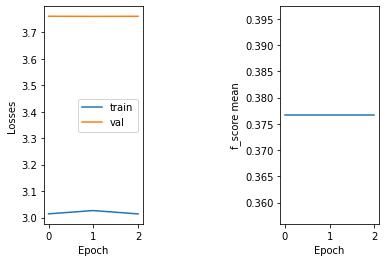

In [ ]:
lr_tab = np.array([ 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13])
seuil_tab = np.arange(0.,0.5,0.01)

max = 0.
lr_max = 0.
seuil_max = 0.

for seuil in seuil_tab:
  for lr in lr_tab:
    history = fit_rnn(rnn_model, train_loader, 3, lr=lr, seuil=seuil)
    titre = 'seuil : ' + str(seuil) + ' , lr : ' + str(lr)
    print(titre)
    # print_history_test(history)
    f_score = np.mean(history['f_micro'])
    if max < f_score:
      history_temp = history
      max = f_score
      lr_max = lr
      seuil_max = seuil

print("\n\n___________________________\n\n")
print("Meilleur f_score :", max, " avec un seuil de", seuil_max, " et un learning rate de", lr_max)
print_history_test(history_temp)


=> Avec ce test, meilleure performance avec :</br>
- seuil : 0.1 </br>
- lr : 1e-05 

# BioBert Finetuning

In [24]:
!pip install pandas==0.23
!pip install transformers==3.0.0

In [25]:
from transformers import BertModel

import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Importation du model Bert pré-entraîné et freeze d'un certains nombre de couches.

In [26]:
bert = BertModel.from_pretrained('dmis-lab/biobert-base-cased-v1.1')
# print(len(bert.encoder.layer))

#freeze du model Bert
# for i,param in enumerate(bert.parameters()):
#     param.requires_grad = False
# print(i)

#freeze des 6 premières couches 
modules = [bert.embeddings, *bert.encoder.layer[:6]] 
for module in modules:
    for param in module.parameters():
        param.requires_grad = False

Définission de notre nouvelle architecture constituée du model Bert précédent suivi d'une couche linéaire, d'une couche relu, d'un dropout à 0.1, d'une couche linéaire, et pour finir on applique un softmax. (Plusieurs modèles ont été testés.)

In [27]:
class BioBertClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.bert = bert
    ### ajout de qq couches supplémentaires
    self.dropout = nn.Dropout(0.1)
    self.relu = nn.ReLU()
    self.lin1 = nn.Linear(self.bert.config.hidden_size,512)
    self.lin2 = nn.Linear(512, len(LABELS))
    self.softmax = nn.Softmax(dim=1)

    self.to(DEVICE)

  def forward(self, x):
    _,output = self.bert(x, attention_mask = (x != tokenizer.pad_token_id).long())
    x = self.lin1(output)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.lin2(x)
    return self.softmax(x)

bert_model = BioBertClassifier()
with torch.no_grad():
  print(bert_model(X_train[:3]).shape)

torch.Size([3, 19])


Reprise des fonctions fit et perf du Notebook sur l'étude de litcovid.

In [28]:
def multi_hot(y_pred, seuil=2e-1):
    """binarize prediction using threshold
    """
    res = torch.zeros(y_pred.shape[0], y_pred.shape[1])#.int()
    res[torch.arange(y_pred.shape[0]), torch.argmax(y_pred, dim=1)] = 1
    for i in range(y_pred.shape[0]):
        for j in range(y_pred.shape[1]):
            if y_pred[i,j] > seuil:
                res[i,j] = 1
    return res.to(DEVICE)

def CrossEntropyLossOneHot(y_score=None, y=None):
    """CrossEntropy pour la multi classification
    """
    log_y_score = torch.log(y_score)
    cost = -torch.sum(y * log_y_score)
    return cost

def perf(model, loader, seuil:float=2e-1):
    """Evaluation en multi-label, le seuil désigne le niveau a partir duquel on considère une classe comme 'prédite'
    """
    criterion = CrossEntropyLossOneHot
    model.eval()
    total_loss = num = num_comp = correct = 0
    total_pred = true_y = None # concaténation des batchs
    for x, y in loader:
        with torch.no_grad():
            y_scores = model(x)
            loss = criterion(y_scores, y)
            y_pred = multi_hot(y_scores, seuil)
            if total_pred == None: # concat
                total_pred = y_pred
                true_y = y
            else:
                total_pred = torch.cat((total_pred,y_pred), dim=0)
                true_y = torch.cat((true_y,y), dim=0)
            correct += torch.sum(y_pred == y).item()
            total_loss += loss.item()
            num_comp += len(y) * len(LABELS)
            num += len(y)

    f_score = f1_score(true_y.cpu(), total_pred.cpu(), average='micro')
    accu_score = accuracy_score(true_y.cpu(), total_pred.cpu())
    return total_loss / num, correct / num_comp, accu_score, f_score

In [29]:
def fit(model, epochs, train_loader, 
          lrbio:float=1e-4, lrdeci:float=1e-02, 
          freezebio:bool=True, 
          seuil:float=2e-1):
    criterion = CrossEntropyLossOneHot

    #freeze biobert layers
    if freezebio :
      for parameter in model.parameters():
          parameter.requires_grad = False
      for name, param in model.named_parameters():
          if 'decision' in name:
              param.requires_grad = True
      optimizer = optim.Adam(model.parameters(), lr=lrdeci)

    #different lr pour bio et decision
    else :
      my_list = ['decision.weight', 'decision.bias']
      params = list(map(lambda x: x[1],list(filter(lambda kv: kv[0] in my_list, model.named_parameters()))))
      base_params = list(map(lambda x: x[1],list(filter(lambda kv: kv[0] not in my_list, model.named_parameters()))))
      optimizer = optim.Adam([{'params': base_params}, {'params': params, 'lr': lrdeci}], lr=lrbio)
      
    history  = {
        'train_losses' : [],
        'val_losses' : [],
        'preci' : [],
        'all_good_preci' : [],
        'f_micro' : [],
    }

    for epoch in range(epochs):
        model.train()
        total_loss = num = 0
        for x, y in tqdm(train_loader):
            optimizer.zero_grad()
            y_scores = model(x)
            loss = criterion(y_scores, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            num += len(y)

        valloss, preci, accu_score, f_mesure = perf(model, valid_loader, seuil)
        history['train_losses'].append(total_loss / num)
        history['val_losses'].append(valloss)
        history['preci'].append(preci)
        history['all_good_preci'].append(accu_score)
        history['f_micro'].append(f_mesure)

        print(f'\nepoch : {epoch}\t - train loss : {total_loss / num}\t - val loss : {valloss}\t - precision :{preci}\t - all good precision : {accu_score}\t - f-score micro : {f_mesure}')

    return history

In [30]:
# history_bert = fit(bert_model, 3, train_loader, lrbio=3e-06, lrdeci=1e-07, freezebio=False)

## Tests pour la paramétrisation de l'entraînement

In [ ]:
def print_history_test(hist:dict, losses:bool=True, preci:bool=True, all_good_preci:bool=True, f_micro:bool=True):
    
    nb_epoch = len(hist['train_losses'])
    x = np.arange(0,nb_epoch)
    plt.figure()
    if losses:
      plt.subplot(131)
      plt.plot(x,hist['train_losses'], label='train')
      plt.plot(x,hist['val_losses'], label='val')
      plt.xlabel('Epoch')
      plt.ylabel('Losses')
      plt.legend()
    
    if [f_micro]:
      plt.subplot(133)
      plt.plot(x,hist['f_micro'])
      plt.xlabel('Epoch')
      plt.ylabel('f_score mean')
      plt.show()


  0%|          | 0/13 [00:00<?, ?it/s]

25


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7970109710506365	 - val loss : 3.7201682525931052	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8020405886219997	 - val loss : 3.7199627404074067	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.8001048518162147	 - val loss : 3.6200393010111687	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8034423987070719	 - val loss : 3.7250972488551466	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7983486488753674	 - val loss : 3.6146000982488244	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7999860539155847	 - val loss : 3.593418269481474	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7953436795402976	 - val loss : 3.618044066197664	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.801655694550159	 - val loss : 3.6855048022223906	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7982645455528709	 - val loss : 3.725557642075622	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7990246239830466	 - val loss : 3.598449855174833	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7989803061765783	 - val loss : 3.694441860161939	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7989868042515773	 - val loss : 3.561922684456538	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8024894957448921	 - val loss : 3.7175336300748065	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7977130039065492	 - val loss : 3.6553172139288153	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7987713393043069	 - val loss : 3.5628904694492376	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.798389427802142	 - val loss : 3.7296058877000533	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7996891105876249	 - val loss : 3.610101644275258	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7934519262874827	 - val loss : 3.7838129210240634	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.797291451809453	 - val loss : 3.6362847263373217	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8026736437105665	 - val loss : 3.717112309724382	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7984557712779325	 - val loss : 3.6635970328618024	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7985846224953147	 - val loss : 3.684421835593807	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.796447099423876	 - val loss : 3.721500137477245	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7928670200647092	 - val loss : 3.671810409397755	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7960896305009431	 - val loss : 3.5819886587198497	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7985785358092364	 - val loss : 3.675502036381694	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.794538745693132	 - val loss : 3.6224686705950395	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7953258682699764	 - val loss : 3.838930074451039	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7965125242869059	 - val loss : 3.5730359716322817	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7972590081831988	 - val loss : 3.66318008274708	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8004846900117164	 - val loss : 3.570216317778652	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7958578338810042	 - val loss : 3.637648647271314	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.8005320558360979	 - val loss : 3.6462114945198727	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8013865924349018	 - val loss : 3.662146855326532	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7973060093674005	 - val loss : 3.590881014333188	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7934801204531801	 - val loss : 3.661202884414821	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7995222432940614	 - val loss : 3.730629559859489	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7986854525173411	 - val loss : 3.698936092043386	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7930007822373334	 - val loss : 3.656248296348794	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7996855763828054	 - val loss : 3.598257009265492	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7970363018559474	 - val loss : 3.6644901534886034	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7984862234078202	 - val loss : 3.652214346580135	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7927186629351448	 - val loss : 3.663027939287204	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7926324395572438	 - val loss : 3.53816163887098	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7995382781122246	 - val loss : 3.7588538382817243	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7974402109781901	 - val loss : 3.7207751968531935	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7945618699578678	 - val loss : 3.7266375347248557	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7996548180486641	 - val loss : 3.576009435561097	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7940002890194163	 - val loss : 3.7381207364276774	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7932988101360845	 - val loss : 3.6896434154325317	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7977606876223695	 - val loss : 3.659344904631087	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7908087127348956	 - val loss : 3.7112583049292702	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7934534830205581	 - val loss : 3.6982053367836962	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7957819793738571	 - val loss : 3.5861224942994347	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.790405133191277	 - val loss : 3.7271972952537165	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7971277470682182	 - val loss : 3.669758361520119	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7966061655212852	 - val loss : 3.7212097760543084	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7962699590944776	 - val loss : 3.6814848520223378	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7959808999416875	 - val loss : 3.628403006248104	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7930455955804563	 - val loss : 3.698321110993913	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7939043232038909	 - val loss : 3.577473945988035	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7958215358210545	 - val loss : 3.658426599595153	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7967711897457347	 - val loss : 3.7007931088938295	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7955084688523236	 - val loss : 3.687289969435016	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8053548359403423	 - val loss : 3.75746025159521	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7908705028833127	 - val loss : 3.6787756392099324	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.793905120269925	 - val loss : 3.7184686382997385	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7929755496043785	 - val loss : 3.617772222722618	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7915631626166549	 - val loss : 3.6629639412592914	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7915329979915245	 - val loss : 3.6497059794305597	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7915406320609298	 - val loss : 3.5926605150537583	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7883513955508962	 - val loss : 3.6583441576911406	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7946940426732979	 - val loss : 3.645470406245259	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7946713975831574	 - val loss : 3.635233610579111	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7961331676034367	 - val loss : 3.5879445492642597	 - precision :0.07920286152273888	 - all good precision : 0.0	 - f-score micro : 0.146780303030303
seuil : 0.0 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.785756321514354	 - val loss : 3.7423582725154545	 - precision :0.9141543178334185	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5736040609137055


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7935293328528311	 - val loss : 3.6068266340829793	 - precision :0.914665304036791	 - all good precision : 0.24271844660194175	 - f-score micro : 0.5793450881612091


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7879952496173335	 - val loss : 3.729677515122497	 - precision :0.9172202350536536	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5846153846153845
seuil : 0.02 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.795922552838045	 - val loss : 3.6756498836776585	 - precision :0.9182422074603985	 - all good precision : 0.2912621359223301	 - f-score micro : 0.5918367346938777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.791083485472436	 - val loss : 3.689312462667817	 - precision :0.9202861522738887	 - all good precision : 0.2912621359223301	 - f-score micro : 0.5958549222797928


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7899617494321337	 - val loss : 3.6941457952110515	 - precision :0.9192641798671436	 - all good precision : 0.2912621359223301	 - f-score micro : 0.5927835051546392
seuil : 0.02 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.791940450668335	 - val loss : 3.721592356857744	 - precision :0.9187531936637711	 - all good precision : 0.2912621359223301	 - f-score micro : 0.5891472868217055


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7910955092486214	 - val loss : 3.7396539854771884	 - precision :0.9172202350536536	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5846153846153845


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7964094503253114	 - val loss : 3.7075847514624733	 - precision :0.9177312212570261	 - all good precision : 0.2815533980582524	 - f-score micro : 0.588235294117647
seuil : 0.02 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7957295670228846	 - val loss : 3.6540948071526094	 - precision :0.9141543178334185	 - all good precision : 0.2621359223300971	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7989115808524337	 - val loss : 3.680194373269683	 - precision :0.9182422074603985	 - all good precision : 0.2621359223300971	 - f-score micro : 0.5897435897435898


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.795803937257505	 - val loss : 3.7032176638112486	 - precision :0.9192641798671436	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5969387755102041
seuil : 0.02 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7914430300394694	 - val loss : 3.652956953326475	 - precision :0.9161982626469085	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5794871794871794


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7924883505877327	 - val loss : 3.6750491244121664	 - precision :0.9151762902401636	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5786802030456852


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7924144513466779	 - val loss : 3.7186744097367073	 - precision :0.9187531936637711	 - all good precision : 0.2912621359223301	 - f-score micro : 0.587012987012987
seuil : 0.02 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7927668982861089	 - val loss : 3.7314827557906365	 - precision :0.916709248850281	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5831202046035805


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7881008550232532	 - val loss : 3.6872917841939095	 - precision :0.916709248850281	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5809768637532133


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7874721218557919	 - val loss : 3.67919377447332	 - precision :0.916709248850281	 - all good precision : 0.2621359223300971	 - f-score micro : 0.5852417302798982
seuil : 0.02 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7929312949087105	 - val loss : 3.62604541223026	 - precision :0.9187531936637711	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5954198473282442


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7882039032730401	 - val loss : 3.617694188090204	 - precision :0.9161982626469085	 - all good precision : 0.27184466019417475	 - f-score micro : 0.583756345177665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7898965022143196	 - val loss : 3.712210201522679	 - precision :0.9187531936637711	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5912596401028277
seuil : 0.02 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7909446744357839	 - val loss : 3.5544040272536788	 - precision :0.916709248850281	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5852417302798982


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.792538418489344	 - val loss : 3.655688758035308	 - precision :0.9172202350536536	 - all good precision : 0.2912621359223301	 - f-score micro : 0.586734693877551


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7922280652850282	 - val loss : 3.6591993905965565	 - precision :0.9182422074603985	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5918367346938777
seuil : 0.02 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7901680282517975	 - val loss : 3.6432840291736195	 - precision :0.9177312212570261	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5818181818181818


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7947991128061332	 - val loss : 3.549888388624469	 - precision :0.914665304036791	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5750636132315521


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7924938856386671	 - val loss : 3.683849297680901	 - precision :0.9182422074603985	 - all good precision : 0.2912621359223301	 - f-score micro : 0.5897435897435898
seuil : 0.02 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7919127660639146	 - val loss : 3.6192145116120864	 - precision :0.9141543178334185	 - all good precision : 0.2524271844660194	 - f-score micro : 0.5800000000000001


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7939588509353936	 - val loss : 3.6408559558461016	 - precision :0.915687276443536	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5801526717557253


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.788184359961865	 - val loss : 3.620593691335141	 - precision :0.9182422074603985	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5918367346938777
seuil : 0.02 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7930451421176686	 - val loss : 3.7237015881584687	 - precision :0.916709248850281	 - all good precision : 0.2815533980582524	 - f-score micro : 0.578811369509044


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7953338716544357	 - val loss : 3.759950063760998	 - precision :0.9161982626469085	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5794871794871794


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.78909325132183	 - val loss : 3.6560499320909816	 - precision :0.916709248850281	 - all good precision : 0.2621359223300971	 - f-score micro : 0.5831202046035805
seuil : 0.02 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7889979049271229	 - val loss : 3.722206708296989	 - precision :0.9177312212570261	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5839793281653747


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7899570839077819	 - val loss : 3.6864948828243516	 - precision :0.9161982626469085	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5816326530612245


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7919474933661667	 - val loss : 3.6785343873848038	 - precision :0.9151762902401636	 - all good precision : 0.27184466019417475	 - f-score micro : 0.576530612244898
seuil : 0.02 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7903355804144168	 - val loss : 3.672186657063012	 - precision :0.9172202350536536	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5846153846153845


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7909171931883868	 - val loss : 3.6663549478771618	 - precision :0.9182422074603985	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5897435897435898


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7861437283310235	 - val loss : 3.698490920576077	 - precision :0.9187531936637711	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5933503836317134
seuil : 0.02 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7947289920320698	 - val loss : 3.5791868932038833	 - precision :0.9187531936637711	 - all good precision : 0.2621359223300971	 - f-score micro : 0.5974683544303797


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7929357827878466	 - val loss : 3.6613601758642105	 - precision :0.9187531936637711	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5912596401028277


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7890046998566272	 - val loss : 3.672479870249924	 - precision :0.9187531936637711	 - all good precision : 0.2912621359223301	 - f-score micro : 0.5891472868217055
seuil : 0.02 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7848368883132935	 - val loss : 3.592012090590394	 - precision :0.9182422074603985	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5897435897435898


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7851253841437545	 - val loss : 3.722281483770574	 - precision :0.913643331630046	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5699745547073791


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7925670941670736	 - val loss : 3.7600052842816103	 - precision :0.916709248850281	 - all good precision : 0.2912621359223301	 - f-score micro : 0.578811369509044
seuil : 0.02 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7918455834482231	 - val loss : 3.6248338199356227	 - precision :0.9151762902401636	 - all good precision : 0.2815533980582524	 - f-score micro : 0.576530612244898


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7825207850512337	 - val loss : 3.7601090958974894	 - precision :0.9177312212570261	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5861182519280206


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7866851582246668	 - val loss : 3.7348413930355924	 - precision :0.9187531936637711	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5891472868217055
seuil : 0.02 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7933200410768098	 - val loss : 3.66012076961184	 - precision :0.9151762902401636	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5808080808080808


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7905816646183238	 - val loss : 3.6647305905240253	 - precision :0.9151762902401636	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5786802030456852


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7875969409942627	 - val loss : 3.609009455708624	 - precision :0.915687276443536	 - all good precision : 0.2524271844660194	 - f-score micro : 0.5843828715365239
seuil : 0.02 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7835986403857961	 - val loss : 3.6702799750763235	 - precision :0.916709248850281	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5852417302798982


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7955222503811705	 - val loss : 3.6776674881722164	 - precision :0.9141543178334185	 - all good precision : 0.2524271844660194	 - f-score micro : 0.5736040609137055


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7872090199414421	 - val loss : 3.7273437351856415	 - precision :0.9177312212570261	 - all good precision : 0.2912621359223301	 - f-score micro : 0.5861182519280206
seuil : 0.02 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.792826259837431	 - val loss : 3.608278441197664	 - precision :0.9151762902401636	 - all good precision : 0.24271844660194175	 - f-score micro : 0.5829145728643216


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7881899090374217	 - val loss : 3.754311052340906	 - precision :0.9197751660705161	 - all good precision : 0.2912621359223301	 - f-score micro : 0.5922077922077922


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7879445132087258	 - val loss : 3.5638645135083244	 - precision :0.916709248850281	 - all good precision : 0.2524271844660194	 - f-score micro : 0.5873417721518988
seuil : 0.02 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.787773008440055	 - val loss : 3.7294248932773626	 - precision :0.915687276443536	 - all good precision : 0.2621359223300971	 - f-score micro : 0.578005115089514


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7935844379312852	 - val loss : 3.695803892265246	 - precision :0.915687276443536	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5801526717557253


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7913543991014069	 - val loss : 3.57190485833918	 - precision :0.9151762902401636	 - all good precision : 0.2621359223300971	 - f-score micro : 0.5829145728643216
seuil : 0.02 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7891552214529	 - val loss : 3.667105591412887	 - precision :0.9141543178334185	 - all good precision : 0.2621359223300971	 - f-score micro : 0.5736040609137055


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7875947788649914	 - val loss : 3.6220888304478915	 - precision :0.9151762902401636	 - all good precision : 0.24271844660194175	 - f-score micro : 0.5829145728643216


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7891141363218719	 - val loss : 3.6022288868728194	 - precision :0.9172202350536536	 - all good precision : 0.2524271844660194	 - f-score micro : 0.5888324873096447
seuil : 0.02 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.788149821992014	 - val loss : 3.611941032039309	 - precision :0.9161982626469085	 - all good precision : 0.24271844660194175	 - f-score micro : 0.5858585858585859


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7857957914763806	 - val loss : 3.618875707237466	 - precision :0.915687276443536	 - all good precision : 0.24271844660194175	 - f-score micro : 0.5801526717557253


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7854877219480627	 - val loss : 3.7157843876810905	 - precision :0.9121103730199285	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5612244897959184
seuil : 0.02 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.783128210142547	 - val loss : 3.5992119428023552	 - precision :0.9177312212570261	 - all good precision : 0.2524271844660194	 - f-score micro : 0.5903307888040713


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7901299163406971	 - val loss : 3.6490687398077215	 - precision :0.916709248850281	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5852417302798982


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7866855322145948	 - val loss : 3.765925731473756	 - precision :0.9177312212570261	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5861182519280206
seuil : 0.02 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.787091381409589	 - val loss : 3.6333502982426618	 - precision :0.9151762902401636	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5829145728643216


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7831819478203269	 - val loss : 3.7170166089696792	 - precision :0.9177312212570261	 - all good precision : 0.2912621359223301	 - f-score micro : 0.5839793281653747


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7883183769151276	 - val loss : 3.650182112906743	 - precision :0.9151762902401636	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5786802030456852
seuil : 0.02 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7822355756572649	 - val loss : 3.718651780804384	 - precision :0.915687276443536	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5758354755784062


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7867233285716936	 - val loss : 3.767906003785365	 - precision :0.916709248850281	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5831202046035805


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7893795102250343	 - val loss : 3.673355065503167	 - precision :0.915687276443536	 - all good precision : 0.27184466019417475	 - f-score micro : 0.5801526717557253
seuil : 0.02 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7853369432337144	 - val loss : 3.75347355962957	 - precision :0.9243740419008687	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5819209039548022


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7833612572913077	 - val loss : 3.7317857094181393	 - precision :0.9233520694941236	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5786516853932584


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7861698655521169	 - val loss : 3.5733443695364646	 - precision :0.9243740419008687	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5911602209944751
seuil : 0.04 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7836641844581155	 - val loss : 3.7416442574806585	 - precision :0.9228410832907511	 - all good precision : 0.2912621359223301	 - f-score micro : 0.5722379603399433


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7942161723679187	 - val loss : 3.622032980317051	 - precision :0.9253960143076136	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5966850828729281


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7849085891948027	 - val loss : 3.5883520181896618	 - precision :0.9243740419008687	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5934065934065934
seuil : 0.04 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7836061762828453	 - val loss : 3.829724172944004	 - precision :0.9233520694941236	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5786516853932584


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7902575100169462	 - val loss : 3.7093009208012555	 - precision :0.9218191108840061	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5738161559888579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7838206524942436	 - val loss : 3.672123103465849	 - precision :0.9228410832907511	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5770308123249299
seuil : 0.04 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7874659697214762	 - val loss : 3.665323313000133	 - precision :0.9233520694941236	 - all good precision : 0.32038834951456313	 - f-score micro : 0.585635359116022


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7852152609357647	 - val loss : 3.767558458939339	 - precision :0.9223300970873787	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5754189944134078


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7824356813056796	 - val loss : 3.740872540520233	 - precision :0.9233520694941236	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5833333333333334
seuil : 0.04 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7873768432467592	 - val loss : 3.717576702821602	 - precision :0.9243740419008687	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5795454545454545


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7889884149326998	 - val loss : 3.6687264303559237	 - precision :0.9243740419008687	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5888888888888888


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7852785563936421	 - val loss : 3.7040300832211392	 - precision :0.9228410832907511	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5770308123249299
seuil : 0.04 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7801485505758547	 - val loss : 3.699739622838289	 - precision :0.9238630556974962	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5779036827195466


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7928135114557603	 - val loss : 3.70297193064273	 - precision :0.9228410832907511	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5746478873239437


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7870515234330121	 - val loss : 3.7430330665366163	 - precision :0.9233520694941236	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5810055865921787
seuil : 0.04 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7873218082914165	 - val loss : 3.7134926064500533	 - precision :0.9228410832907511	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5746478873239437


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7865943020465327	 - val loss : 3.7151880727230924	 - precision :0.9228410832907511	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5770308123249299


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7861645735946357	 - val loss : 3.7609924760837	 - precision :0.9243740419008687	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5795454545454545
seuil : 0.04 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7855266636493159	 - val loss : 3.6579235410227358	 - precision :0.9218191108840061	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7861791007659015	 - val loss : 3.768801939140246	 - precision :0.9228410832907511	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5722379603399433


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7845713578018487	 - val loss : 3.7361335384035574	 - precision :0.9218191108840061	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5761772853185595
seuil : 0.04 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7832642209296133	 - val loss : 3.7111037541361687	 - precision :0.9243740419008687	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5888888888888888


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7884711284263461	 - val loss : 3.6635023691121815	 - precision :0.9233520694941236	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5901639344262295


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7838203346028048	 - val loss : 3.717957394794353	 - precision :0.9218191108840061	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5714285714285714
seuil : 0.04 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7863497874316048	 - val loss : 3.7402488189993552	 - precision :0.9238630556974962	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5895316804407714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7820864752227185	 - val loss : 3.7036256512391916	 - precision :0.9238630556974962	 - all good precision : 0.3106796116504854	 - f-score micro : 0.584958217270195


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7845187771554086	 - val loss : 3.730139723101866	 - precision :0.9233520694941236	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5833333333333334
seuil : 0.04 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7830538235458673	 - val loss : 3.6440903376607063	 - precision :0.9218191108840061	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5785123966942148


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7849124716777428	 - val loss : 3.7220630460572472	 - precision :0.9213081246806336	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5792349726775957


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7806930705612781	 - val loss : 3.7055396292973493	 - precision :0.9228410832907511	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5817174515235458
seuil : 0.04 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7871736101075715	 - val loss : 3.6508717953580097	 - precision :0.9238630556974962	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5872576177285318


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7875864926506492	 - val loss : 3.6539067388738244	 - precision :0.9238630556974962	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5895316804407714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7831399908252791	 - val loss : 3.6839495908866806	 - precision :0.9243740419008687	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5842696629213483
seuil : 0.04 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7816062417684817	 - val loss : 3.7165217723661255	 - precision :0.9213081246806336	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5722222222222223


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7827643389795341	 - val loss : 3.674230001505139	 - precision :0.9238630556974962	 - all good precision : 0.2912621359223301	 - f-score micro : 0.5826330532212886


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7845444188398474	 - val loss : 3.721565765084572	 - precision :0.9218191108840061	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5714285714285714
seuil : 0.04 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7841501399582508	 - val loss : 3.6753441893938676	 - precision :0.9228410832907511	 - all good precision : 0.3106796116504854	 - f-score micro : 0.584022038567493


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7804047477011588	 - val loss : 3.6298806644180446	 - precision :0.9223300970873787	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5824175824175825


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7816596779168821	 - val loss : 3.7747544964540354	 - precision :0.9238630556974962	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5802816901408451
seuil : 0.04 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7841204895692713	 - val loss : 3.7603278298979825	 - precision :0.9213081246806336	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5674157303370787


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7883934343562407	 - val loss : 3.763852239812462	 - precision :0.9207971384772611	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5706371191135734


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7911377981597302	 - val loss : 3.662464993671306	 - precision :0.9243740419008687	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5842696629213483
seuil : 0.04 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7815005802640728	 - val loss : 3.728835763283146	 - precision :0.9228410832907511	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5746478873239437


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.786479580636118	 - val loss : 3.7411225698526622	 - precision :0.9213081246806336	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5722222222222223


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7852968468385584	 - val loss : 3.6122616517891006	 - precision :0.9243740419008687	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5888888888888888
seuil : 0.04 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7819106906068092	 - val loss : 3.708400318923506	 - precision :0.9228410832907511	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5793871866295265


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.785412449462741	 - val loss : 3.6882197185627463	 - precision :0.9218191108840061	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5738161559888579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.779309492485196	 - val loss : 3.712518117960217	 - precision :0.9228410832907511	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5817174515235458
seuil : 0.04 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.784331805565778	 - val loss : 3.660191063742036	 - precision :0.9228410832907511	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5817174515235458


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7882809405233345	 - val loss : 3.719646416821526	 - precision :0.9202861522738887	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5666666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7818878421596452	 - val loss : 3.704623768630537	 - precision :0.9233520694941236	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5810055865921787
seuil : 0.04 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7827764854711645	 - val loss : 3.6666114214554573	 - precision :0.9233520694941236	 - all good precision : 0.2912621359223301	 - f-score micro : 0.5786516853932584


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7867990288079953	 - val loss : 3.666879116910175	 - precision :0.9223300970873787	 - all good precision : 0.32038834951456313	 - f-score micro : 0.577777777777778


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7810845795799705	 - val loss : 3.7348896137719017	 - precision :0.9253960143076136	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5804597701149425
seuil : 0.04 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7818511280359006	 - val loss : 3.698422256025296	 - precision :0.9218191108840061	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5761772853185595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7850232241200465	 - val loss : 3.726630164581595	 - precision :0.9218191108840061	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5641025641025641


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7849113730823293	 - val loss : 3.676870364587284	 - precision :0.9248850281042412	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5905292479108635
seuil : 0.04 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7853007106220021	 - val loss : 3.7832540123208056	 - precision :0.9218191108840061	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5641025641025641


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7848470491521499	 - val loss : 3.60464121994463	 - precision :0.9248850281042412	 - all good precision : 0.32038834951456313	 - f-score micro : 0.592797783933518


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.78125859709347	 - val loss : 3.728217930469698	 - precision :0.9243740419008687	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5842696629213483
seuil : 0.04 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7888826996672387	 - val loss : 3.6939686154856264	 - precision :0.9228410832907511	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5770308123249299


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7817046899421543	 - val loss : 3.6985515113015777	 - precision :0.9228410832907511	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5793871866295265


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7861453154507805	 - val loss : 3.6608877459776052	 - precision :0.9248850281042412	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5905292479108635
seuil : 0.04 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7786497321783328	 - val loss : 3.7347999498682114	 - precision :0.9207971384772611	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5753424657534247


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7831127035851572	 - val loss : 3.7269557471414214	 - precision :0.9213081246806336	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5722222222222223


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.782807798946605	 - val loss : 3.656547694530302	 - precision :0.9213081246806336	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5769230769230769
seuil : 0.04 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7781063879237455	 - val loss : 3.7965946382689246	 - precision :0.9207971384772611	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7867001388587204	 - val loss : 3.7108993900632394	 - precision :0.9223300970873787	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5754189944134078


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7830147322486428	 - val loss : 3.757092707365462	 - precision :0.9223300970873787	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5706214689265536
seuil : 0.04 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7843858728221819	 - val loss : 3.7870738205400487	 - precision :0.9223300970873787	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5681818181818181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7783201442045324	 - val loss : 3.6262484059750455	 - precision :0.9253960143076136	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5944444444444444


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7769952007368499	 - val loss : 3.7067628508632624	 - precision :0.9233520694941236	 - all good precision : 0.32038834951456313	 - f-score micro : 0.576271186440678
seuil : 0.04 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7851693688654432	 - val loss : 3.5666789082647528	 - precision :0.9269289729177312	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5855072463768116


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7796460927701464	 - val loss : 3.7367381123663153	 - precision :0.9259070005109862	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5671641791044777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7874228299832812	 - val loss : 3.7715710019602358	 - precision :0.9248850281042412	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5689149560117301
seuil : 0.06 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7790626170588475	 - val loss : 3.6560499320909816	 - precision :0.9264179867143587	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5813953488372092


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7867162835364249	 - val loss : 3.8065493685527914	 - precision :0.9259070005109862	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5722713864306785


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7837767834756889	 - val loss : 3.766059245878053	 - precision :0.9248850281042412	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5663716814159293
seuil : 0.06 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7817377132527968	 - val loss : 3.652754848443189	 - precision :0.9264179867143587	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5862068965517242


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7814730452556237	 - val loss : 3.6767625530946604	 - precision :0.9253960143076136	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5680473372781066


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7801068693983788	 - val loss : 3.7596132963606457	 - precision :0.9253960143076136	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5680473372781066
seuil : 0.06 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7838491248149498	 - val loss : 3.7118072509765625	 - precision :0.9269289729177312	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5830903790087464


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7854908587885838	 - val loss : 3.8445013842536406	 - precision :0.9253960143076136	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5705882352941176


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7801833082647884	 - val loss : 3.7083133586402077	 - precision :0.9253960143076136	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5730994152046783
seuil : 0.06 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.784053690293256	 - val loss : 3.7233461546666415	 - precision :0.9248850281042412	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5663716814159293


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7803023095224418	 - val loss : 3.686681580774992	 - precision :0.9243740419008687	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5722543352601156


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7787672141019035	 - val loss : 3.7229134272603157	 - precision :0.9264179867143587	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5789473684210527
seuil : 0.06 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7794011036554972	 - val loss : 3.6541271765255234	 - precision :0.9248850281042412	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5763688760806917


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7846668047063491	 - val loss : 3.7890285010476714	 - precision :0.9238630556974962	 - all good precision : 0.3106796116504854	 - f-score micro : 0.563049853372434


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7811161817288866	 - val loss : 3.6593730889477776	 - precision :0.9233520694941236	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5689655172413793
seuil : 0.06 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7848493328281477	 - val loss : 3.7899098812955097	 - precision :0.9259070005109862	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5671641791044777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.781258692928389	 - val loss : 3.66951096173629	 - precision :0.9259070005109862	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5821325648414986


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7814279677821141	 - val loss : 3.673244846677317	 - precision :0.9259070005109862	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5772594752186588
seuil : 0.06 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7796232069239897	 - val loss : 3.6856929075370712	 - precision :0.9259070005109862	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5797101449275363


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7798553003984339	 - val loss : 3.7060791311912165	 - precision :0.9274399591211038	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5823529411764706


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7807938865586823	 - val loss : 3.681086086532445	 - precision :0.9253960143076136	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5780346820809249
seuil : 0.06 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7812018511342067	 - val loss : 3.6730680002749545	 - precision :0.9259070005109862	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5747800586510263


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.78447220138475	 - val loss : 3.735038164749886	 - precision :0.9274399591211038	 - all good precision : 0.3300970873786408	 - f-score micro : 0.584795321637427


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7885143990610161	 - val loss : 3.7264582069174756	 - precision :0.9269289729177312	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5830903790087464
seuil : 0.06 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7780045130673576	 - val loss : 3.7099800850581195	 - precision :0.9259070005109862	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5722713864306785


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7814040721631518	 - val loss : 3.7662421291314283	 - precision :0.9259070005109862	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5722713864306785


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7844197703342811	 - val loss : 3.694368492052393	 - precision :0.9274399591211038	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5798816568047338
seuil : 0.06 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7792180192236807	 - val loss : 3.773305170744368	 - precision :0.9264179867143587	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5764705882352942


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7844822289896947	 - val loss : 3.7338919037754095	 - precision :0.9243740419008687	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5697674418604651


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7830391000298893	 - val loss : 3.6611806628773516	 - precision :0.9269289729177312	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5830903790087464
seuil : 0.06 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7835859843328887	 - val loss : 3.713423238217252	 - precision :0.9253960143076136	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5730994152046783


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7804925698860019	 - val loss : 3.782724917513653	 - precision :0.9269289729177312	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5781710914454278


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7764728630290312	 - val loss : 3.6286990341630956	 - precision :0.9269289729177312	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5855072463768116
seuil : 0.06 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7782943973354265	 - val loss : 3.765487226467688	 - precision :0.9243740419008687	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5672514619883041


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7836168373332304	 - val loss : 3.6527928102363663	 - precision :0.9253960143076136	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5730994152046783


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7846110264460245	 - val loss : 3.703569134462227	 - precision :0.9253960143076136	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5755813953488372
seuil : 0.06 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7760940416186464	 - val loss : 3.633078306624033	 - precision :0.9274399591211038	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5895953757225434


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7872181125715667	 - val loss : 3.6384278454826875	 - precision :0.9279509453244762	 - all good precision : 0.32038834951456313	 - f-score micro : 0.591304347826087


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7804330306894639	 - val loss : 3.737200172202101	 - precision :0.9264179867143587	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5789473684210527
seuil : 0.06 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7818624014947929	 - val loss : 3.7275239518545207	 - precision :0.9259070005109862	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5722713864306785


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7864809269998588	 - val loss : 3.688797774824124	 - precision :0.9248850281042412	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5811965811965812


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7795832250632492	 - val loss : 3.7944268902528635	 - precision :0.9253960143076136	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5730994152046783
seuil : 0.06 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7818475798064587	 - val loss : 3.7510302275129894	 - precision :0.9238630556974962	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5681159420289856


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7763172668569228	 - val loss : 3.8212957659971365	 - precision :0.9259070005109862	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5747800586510263


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7796152619754567	 - val loss : 3.651968465268033	 - precision :0.9253960143076136	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5780346820809249
seuil : 0.06 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7823111075980991	 - val loss : 3.774884788735399	 - precision :0.9253960143076136	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5730994152046783


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7840683974471747	 - val loss : 3.8310273550089122	 - precision :0.9279509453244762	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5816023738872403


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7806991969837862	 - val loss : 3.7799614100780303	 - precision :0.9259070005109862	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5747800586510263
seuil : 0.06 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7795988297929951	 - val loss : 3.7756275065894265	 - precision :0.9253960143076136	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5680473372781066


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7887432458353978	 - val loss : 3.7624976519242073	 - precision :0.9264179867143587	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5764705882352942


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7826618914510689	 - val loss : 3.7808881222623065	 - precision :0.9279509453244762	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5865102639296188
seuil : 0.06 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7742953721214744	 - val loss : 3.7872729995875685	 - precision :0.9279509453244762	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5865102639296188


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7801882636313345	 - val loss : 3.693642551459155	 - precision :0.9264179867143587	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5789473684210527


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7851183087218041	 - val loss : 3.641966921611897	 - precision :0.9274399591211038	 - all good precision : 0.32038834951456313	 - f-score micro : 0.584795321637427
seuil : 0.06 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.781799456652473	 - val loss : 3.745334254885183	 - precision :0.9279509453244762	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5865102639296188


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7831685917050231	 - val loss : 3.763795797107289	 - precision :0.9274399591211038	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5823529411764706


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7832876303616692	 - val loss : 3.713500791383021	 - precision :0.9274399591211038	 - all good precision : 0.32038834951456313	 - f-score micro : 0.584795321637427
seuil : 0.06 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7777851890115177	 - val loss : 3.732577870193037	 - precision :0.9289729177312213	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5899705014749262


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.783324262675117	 - val loss : 3.7530702387244954	 - precision :0.9294839039345938	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5843373493975904


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7828010063545376	 - val loss : 3.7167779866931507	 - precision :0.9284619315278487	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5857988165680473
seuil : 0.06 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7797884099623736	 - val loss : 3.766057134831993	 - precision :0.9238630556974962	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5604719764011801


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7741971109427658	 - val loss : 3.800857951340166	 - precision :0.9274399591211038	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5798816568047338


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7802461829839968	 - val loss : 3.6759352822905607	 - precision :0.9269289729177312	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5878962536023055
seuil : 0.06 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7784950499441109	 - val loss : 3.7640340860607555	 - precision :0.9279509453244762	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5889212827988338


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7795548766267066	 - val loss : 3.781738947896124	 - precision :0.9264179867143587	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5764705882352942


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7820683694353291	 - val loss : 3.7119632461695997	 - precision :0.9274399591211038	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5895953757225434
seuil : 0.06 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7749944691564522	 - val loss : 3.8050279339540354	 - precision :0.9269289729177312	 - all good precision : 0.2912621359223301	 - f-score micro : 0.5731343283582089


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7803826729456583	 - val loss : 3.6537508918243704	 - precision :0.9264179867143587	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5838150289017342


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7799581593158198	 - val loss : 3.6515962174795207	 - precision :0.9259070005109862	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5772594752186588
seuil : 0.06 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7747234643674364	 - val loss : 3.881088701266687	 - precision :0.9238630556974962	 - all good precision : 0.30097087378640774	 - f-score micro : 0.565597667638484


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7847254790511786	 - val loss : 3.77280774162811	 - precision :0.9269289729177312	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5855072463768116


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7790025846630919	 - val loss : 3.711002905391952	 - precision :0.9279509453244762	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5889212827988338
seuil : 0.06 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7792227712332034	 - val loss : 3.773013809352245	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5784615384615385


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7788102720298019	 - val loss : 3.7545551559300097	 - precision :0.9294839039345938	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5792682926829268


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7793267474454992	 - val loss : 3.674057895697436	 - precision :0.9294839039345938	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5868263473053891
seuil : 0.08 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7778871713900098	 - val loss : 3.8440546202428134	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5758513931888545


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7796029086206474	 - val loss : 3.6975599122278897	 - precision :0.9284619315278487	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5783132530120482


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7818137337179745	 - val loss : 3.700375899527837	 - precision :0.9279509453244762	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5816023738872403
seuil : 0.08 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7784068935057696	 - val loss : 3.758780988674719	 - precision :0.9299948901379663	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5835866261398176


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7793614046246398	 - val loss : 3.7156233185703313	 - precision :0.9289729177312213	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5875370919881306


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7810286727606082	 - val loss : 3.8503258344039177	 - precision :0.9284619315278487	 - all good precision : 0.33980582524271846	 - f-score micro : 0.573170731707317
seuil : 0.08 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7748576800028483	 - val loss : 3.722182116462189	 - precision :0.9289729177312213	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5775075987841946


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7794880726758171	 - val loss : 3.731882224962549	 - precision :0.9289729177312213	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5825825825825826


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7761614088918648	 - val loss : 3.729294267672937	 - precision :0.9279509453244762	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5714285714285714
seuil : 0.08 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.774590387063868	 - val loss : 3.744407098270157	 - precision :0.9305058763413387	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5802469135802468


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7826241278180889	 - val loss : 3.765343453120259	 - precision :0.9294839039345938	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5766871165644172


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7791838201822019	 - val loss : 3.6783874289503373	 - precision :0.9289729177312213	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5775075987841946
seuil : 0.08 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7796540494058647	 - val loss : 3.8144676801070427	 - precision :0.9294839039345938	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5843373493975904


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7785814907036576	 - val loss : 3.6587302939405717	 - precision :0.9269289729177312	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5679758308157099


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7762555094326243	 - val loss : 3.7597369962525597	 - precision :0.9289729177312213	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5749235474006115
seuil : 0.08 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7770619439143761	 - val loss : 3.736172833488983	 - precision :0.9289729177312213	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5723076923076924


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7762820066190234	 - val loss : 3.7268270103676806	 - precision :0.9289729177312213	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5723076923076924


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7826932434942208	 - val loss : 3.7125390062054384	 - precision :0.9284619315278487	 - all good precision : 0.3300970873786408	 - f-score micro : 0.573170731707317
seuil : 0.08 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7781498852898093	 - val loss : 3.7731094360351562	 - precision :0.9299948901379663	 - all good precision : 0.3300970873786408	 - f-score micro : 0.581039755351682


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.779496473424575	 - val loss : 3.80824124234394	 - precision :0.9284619315278487	 - all good precision : 0.3300970873786408	 - f-score micro : 0.573170731707317


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7803005611195284	 - val loss : 3.7285486239831425	 - precision :0.9279509453244762	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5765765765765766
seuil : 0.08 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7819275856018066	 - val loss : 3.729458632978421	 - precision :0.9279509453244762	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5765765765765766


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7855600796493829	 - val loss : 3.8037950460193226	 - precision :0.9274399591211038	 - all good precision : 0.3300970873786408	 - f-score micro : 0.572289156626506


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7721580874686148	 - val loss : 3.8497072608725538	 - precision :0.9284619315278487	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5783132530120482
seuil : 0.08 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7779569111618341	 - val loss : 3.69685234143896	 - precision :0.9284619315278487	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5808383233532934


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7794455593707514	 - val loss : 3.7413617476676273	 - precision :0.9279509453244762	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5765765765765766


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7729787873286827	 - val loss : 3.7742674003527004	 - precision :0.9284619315278487	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5808383233532934
seuil : 0.08 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7786329330182543	 - val loss : 3.824955727290181	 - precision :0.9279509453244762	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7793337784561456	 - val loss : 3.811105376308404	 - precision :0.9279509453244762	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5688073394495412


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7777796118867164	 - val loss : 3.751798611242794	 - precision :0.9289729177312213	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5800604229607251
seuil : 0.08 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7820035149069393	 - val loss : 3.7554010557896884	 - precision :0.9284619315278487	 - all good precision : 0.30097087378640774	 - f-score micro : 0.573170731707317


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.778204016825732	 - val loss : 3.756845307581633	 - precision :0.9269289729177312	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5756676557863503


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7811385112650254	 - val loss : 3.779364539581595	 - precision :0.9294839039345938	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5818181818181818
seuil : 0.08 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7776397069295248	 - val loss : 3.73880738193549	 - precision :0.9289729177312213	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5775075987841946


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7747387231564989	 - val loss : 3.7454682877920207	 - precision :0.9284619315278487	 - all good precision : 0.32038834951456313	 - f-score micro : 0.573170731707317


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7793462019340665	 - val loss : 3.8055388441363585	 - precision :0.9289729177312213	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5775075987841946
seuil : 0.08 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.776899496714274	 - val loss : 3.7570664118794563	 - precision :0.9305058763413387	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5802469135802468


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7822048360226201	 - val loss : 3.742684262470134	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5758513931888545


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7807478343739229	 - val loss : 3.7247676293826797	 - precision :0.9294839039345938	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5818181818181818
seuil : 0.08 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7785753081826603	 - val loss : 3.761904892412204	 - precision :0.9284619315278487	 - all good precision : 0.3592233009708738	 - f-score micro : 0.573170731707317


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7785063491148108	 - val loss : 3.7347766542897642	 - precision :0.9294839039345938	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5766871165644172


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7797496716181437	 - val loss : 3.896079128228345	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5758513931888545
seuil : 0.08 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7787089207593132	 - val loss : 3.6612570308944554	 - precision :0.9289729177312213	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5800604229607251


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7785554984036613	 - val loss : 3.772376199370449	 - precision :0.9289729177312213	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5723076923076924


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7806321055281396	 - val loss : 3.742649226512724	 - precision :0.9305058763413387	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5828220858895705
seuil : 0.08 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7781183018403894	 - val loss : 3.7782240932427564	 - precision :0.9284619315278487	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5808383233532934


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7754899099761364	 - val loss : 3.714810676945066	 - precision :0.9294839039345938	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5792682926829268


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7782326913347432	 - val loss : 3.6611815147029545	 - precision :0.9305058763413387	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5878787878787878
seuil : 0.08 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7731134096781412	 - val loss : 3.757545508227302	 - precision :0.9294839039345938	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5818181818181818


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7718454178641824	 - val loss : 3.7137581538228157	 - precision :0.9279509453244762	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5791044776119403


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7760570423275817	 - val loss : 3.7973244676312197	 - precision :0.9274399591211038	 - all good precision : 0.30097087378640774	 - f-score micro : 0.572289156626506
seuil : 0.08 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7771103054869408	 - val loss : 3.8092316562689623	 - precision :0.9289729177312213	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5775075987841946


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7812440465478336	 - val loss : 3.7097126118187767	 - precision :0.9289729177312213	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5775075987841946


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7781936047123927	 - val loss : 3.757932162979274	 - precision :0.9294839039345938	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5792682926829268
seuil : 0.08 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7787743456223432	 - val loss : 3.7923467691662243	 - precision :0.9315278487480838	 - all good precision : 0.33980582524271846	 - f-score micro : 0.588957055214724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7757006696626252	 - val loss : 3.7382109558698042	 - precision :0.9315278487480838	 - all good precision : 0.33980582524271846	 - f-score micro : 0.588957055214724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7804811585183237	 - val loss : 3.7093094020213897	 - precision :0.9289729177312213	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5800604229607251
seuil : 0.08 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7785390662211998	 - val loss : 3.7390507448066788	 - precision :0.9294839039345938	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5818181818181818


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7807560247533462	 - val loss : 3.812016496380556	 - precision :0.9289729177312213	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5749235474006115


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7721592702117621	 - val loss : 3.8011482386913116	 - precision :0.9289729177312213	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5749235474006115
seuil : 0.08 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7787126793580896	 - val loss : 3.820528530380101	 - precision :0.9289729177312213	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5800604229607251


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7793697586246565	 - val loss : 3.732257176371454	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5835866261398176


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7809097626629997	 - val loss : 3.8029777749070846	 - precision :0.9284619315278487	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5679012345679013
seuil : 0.08 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7728016376495361	 - val loss : 3.76693299673136	 - precision :0.9284619315278487	 - all good precision : 0.32038834951456313	 - f-score micro : 0.573170731707317


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7744670241486793	 - val loss : 3.7899401025864683	 - precision :0.9284619315278487	 - all good precision : 0.3106796116504854	 - f-score micro : 0.573170731707317


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7785698619543338	 - val loss : 3.857345321803417	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5784615384615385
seuil : 0.08 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7743862680360383	 - val loss : 3.8635317978349706	 - precision :0.9305058763413387	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5802469135802468


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7771498338848937	 - val loss : 3.8647765742922293	 - precision :0.9284619315278487	 - all good precision : 0.33980582524271846	 - f-score micro : 0.573170731707317


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7751451964471855	 - val loss : 3.812861766630006	 - precision :0.9294839039345938	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5766871165644172
seuil : 0.08 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7732287037606332	 - val loss : 3.783469301982991	 - precision :0.9284619315278487	 - all good precision : 0.33980582524271846	 - f-score micro : 0.573170731707317


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7764594858767939	 - val loss : 3.8544499665788075	 - precision :0.9289729177312213	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5749235474006115


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7733600700602812	 - val loss : 3.772102207813448	 - precision :0.9294839039345938	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5843373493975904
seuil : 0.08 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7723630362865972	 - val loss : 3.756914898029809	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5867507886435331


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7768887795653998	 - val loss : 3.8411694128536484	 - precision :0.9305058763413387	 - all good precision : 0.3592233009708738	 - f-score micro : 0.577639751552795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7775529646405986	 - val loss : 3.8951614157667436	 - precision :0.9305058763413387	 - all good precision : 0.33980582524271846	 - f-score micro : 0.575
seuil : 0.1 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.775524335749009	 - val loss : 3.704179671204206	 - precision :0.9299948901379663	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5705329153605014


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7783475529913809	 - val loss : 3.7779096584875607	 - precision :0.9294839039345938	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5766871165644172


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7760729158625883	 - val loss : 3.799741245010524	 - precision :0.9289729177312213	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5669781931464175
seuil : 0.1 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.774340926432142	 - val loss : 3.8769030524689017	 - precision :0.9299948901379663	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5732087227414331


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7792397129769418	 - val loss : 3.7726704125265473	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5732087227414331


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7784330798130409	 - val loss : 3.7407217673885014	 - precision :0.9305058763413387	 - all good precision : 0.3592233009708738	 - f-score micro : 0.575
seuil : 0.1 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7779149518293493	 - val loss : 3.7787988903453047	 - precision :0.9310168625447113	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5794392523364487


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7735270261764526	 - val loss : 3.9080060199626443	 - precision :0.9310168625447113	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5768025078369906


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7773763782837811	 - val loss : 3.7442499549643506	 - precision :0.9305058763413387	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5802469135802468
seuil : 0.1 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7780919612622729	 - val loss : 3.8695676488783755	 - precision :0.9294839039345938	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5687499999999999


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.778263765222886	 - val loss : 3.766838407053531	 - precision :0.9310168625447113	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5794392523364487


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7778883681577795	 - val loss : 3.735050645846765	 - precision :0.9294839039345938	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5740740740740741
seuil : 0.1 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7737992417578604	 - val loss : 3.656865981018659	 - precision :0.9310168625447113	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5846153846153845


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.778940341051887	 - val loss : 3.8014388964014145	 - precision :0.9299948901379663	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5758513931888545


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7739248392628688	 - val loss : 3.763060856791376	 - precision :0.9294839039345938	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5740740740740741
seuil : 0.1 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7734437947179756	 - val loss : 3.7972382110299416	 - precision :0.9305058763413387	 - all good precision : 0.33980582524271846	 - f-score micro : 0.577639751552795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7775024128895179	 - val loss : 3.8306146269863093	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5838509316770186


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7771459280275831	 - val loss : 3.8141792075147904	 - precision :0.9310168625447113	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5794392523364487
seuil : 0.1 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7814470856797462	 - val loss : 3.720235287564472	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5784615384615385


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7733530367121977	 - val loss : 3.8264151267635014	 - precision :0.9279509453244762	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5688073394495412


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7777667957193711	 - val loss : 3.7550666957225616	 - precision :0.9305058763413387	 - all good precision : 0.34951456310679613	 - f-score micro : 0.577639751552795
seuil : 0.1 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7775022609561097	 - val loss : 3.758138823277742	 - precision :0.9294839039345938	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5740740740740741


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.776331667806588	 - val loss : 3.7393361434195804	 - precision :0.9294839039345938	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5740740740740741


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7748898758607752	 - val loss : 3.825323160412242	 - precision :0.9305058763413387	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5723270440251572
seuil : 0.1 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7779735747505637	 - val loss : 3.818211083273286	 - precision :0.9289729177312213	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5669781931464175


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7735214700885847	 - val loss : 3.883492034615822	 - precision :0.9289729177312213	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5669781931464175


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7726650471780815	 - val loss : 3.783975101211696	 - precision :0.9305058763413387	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5802469135802468
seuil : 0.1 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7760417625015857	 - val loss : 3.7105816220774233	 - precision :0.9305058763413387	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5828220858895705


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7742287060793709	 - val loss : 3.7460612324835028	 - precision :0.9305058763413387	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5802469135802468


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7772037889443192	 - val loss : 3.710047712603819	 - precision :0.9310168625447113	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5794392523364487
seuil : 0.1 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.770939401551789	 - val loss : 3.760625413320597	 - precision :0.9315278487480838	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5812499999999999


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7760010420107374	 - val loss : 3.738673756423506	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5838509316770186


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7749995413948508	 - val loss : 3.844343796517085	 - precision :0.9294839039345938	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5714285714285714
seuil : 0.1 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7740318027197146	 - val loss : 3.709452212435528	 - precision :0.9315278487480838	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5812499999999999


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7792858422971239	 - val loss : 3.7358254367865404	 - precision :0.9315278487480838	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5838509316770186


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7765661548165714	 - val loss : 3.78699723030757	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.588235294117647
seuil : 0.1 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7721467555737963	 - val loss : 3.752296818112864	 - precision :0.9299948901379663	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5758513931888545


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7731080873339784	 - val loss : 3.763992383642104	 - precision :0.9299948901379663	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5784615384615385


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7749561141518986	 - val loss : 3.8042419581737335	 - precision :0.9289729177312213	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5749235474006115
seuil : 0.1 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7763634873371498	 - val loss : 3.9275203075223755	 - precision :0.9305058763413387	 - all good precision : 0.33980582524271846	 - f-score micro : 0.575


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7742951944762585	 - val loss : 3.729055052822076	 - precision :0.9294839039345938	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5766871165644172


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7759369120878332	 - val loss : 3.8011983482583056	 - precision :0.9284619315278487	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5679012345679013
seuil : 0.1 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.771373426212984	 - val loss : 3.668192965313069	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5932721712538226


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7679075236413994	 - val loss : 3.677797854525372	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7722663318409639	 - val loss : 3.7513389587402344	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.588235294117647
seuil : 0.1 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7776140255086562	 - val loss : 3.747267899004001	 - precision :0.9310168625447113	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5820433436532507


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7749430759280336	 - val loss : 3.7952926043167854	 - precision :0.9305058763413387	 - all good precision : 0.36893203883495146	 - f-score micro : 0.577639751552795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7751418001511517	 - val loss : 3.78467341302668	 - precision :0.9310168625447113	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5820433436532507
seuil : 0.1 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.775887318685943	 - val loss : 3.796298943676995	 - precision :0.9305058763413387	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5802469135802468


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7759910237555411	 - val loss : 3.797538905467802	 - precision :0.9310168625447113	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5820433436532507


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7698598936492321	 - val loss : 3.7859499292466245	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5784615384615385
seuil : 0.1 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7762734796486649	 - val loss : 3.698809910746454	 - precision :0.9305058763413387	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5802469135802468


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7788526544383928	 - val loss : 3.7799933720560905	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5856697819314642


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7759812859927907	 - val loss : 3.7589901303782045	 - precision :0.9310168625447113	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5820433436532507
seuil : 0.1 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7736937625735414	 - val loss : 3.768463319945104	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7722713923921772	 - val loss : 3.7833476761012403	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5856697819314642


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7743678840936399	 - val loss : 3.77552288018384	 - precision :0.9315278487480838	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5838509316770186
seuil : 0.1 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7774984930075851	 - val loss : 3.8548813236569894	 - precision :0.9310168625447113	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5794392523364487


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7752591862398035	 - val loss : 3.8402644407401962	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5812499999999999


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7755162856158089	 - val loss : 3.7932662223149274	 - precision :0.9315278487480838	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5786163522012577
seuil : 0.1 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7732375182357489	 - val loss : 3.6655650462919067	 - precision :0.9305058763413387	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5853658536585366


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7773913822922052	 - val loss : 3.7688384935693833	 - precision :0.9294839039345938	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7738302665598252	 - val loss : 3.7281858573839504	 - precision :0.9310168625447113	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5820433436532507
seuil : 0.1 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7754872920466405	 - val loss : 3.7657596254811705	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5758513931888545


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7768092926810769	 - val loss : 3.785670826736006	 - precision :0.9310168625447113	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5794392523364487


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.774069676212236	 - val loss : 3.7213559937708585	 - precision :0.9310168625447113	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5820433436532507
seuil : 0.1 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7761617828817928	 - val loss : 3.811600509199124	 - precision :0.9294839039345938	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5766871165644172


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7725837838416006	 - val loss : 3.8215687205490556	 - precision :0.9305058763413387	 - all good precision : 0.33980582524271846	 - f-score micro : 0.577639751552795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7717433513379565	 - val loss : 3.674365663991391	 - precision :0.9305058763413387	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5878787878787878
seuil : 0.1 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7756423435959161	 - val loss : 3.7900683578935643	 - precision :0.9299948901379663	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5758513931888545


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7712052008684944	 - val loss : 3.7473138235147716	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7732820651110481	 - val loss : 3.7826362906150446	 - precision :0.9315278487480838	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5838509316770186
seuil : 0.1 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.77556157579609	 - val loss : 3.7794705363153254	 - precision :0.9340827797649464	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5930599369085174


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7772892690172383	 - val loss : 3.755229949951172	 - precision :0.9340827797649464	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5904761904761905


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7732419827405144	 - val loss : 3.7514182525931052	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.584126984126984
seuil : 0.12 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.773024227104935	 - val loss : 3.7270065974263313	 - precision :0.9330608073582013	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5867507886435331


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.780499582197152	 - val loss : 3.878993876929422	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5759493670886076


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7712287248349657	 - val loss : 3.672959336956728	 - precision :0.9315278487480838	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5838509316770186
seuil : 0.12 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.773013061168147	 - val loss : 3.861288237340242	 - precision :0.9294839039345938	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5660377358490566


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7729276348562801	 - val loss : 3.7419250636424835	 - precision :0.9310168625447113	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5794392523364487


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7718013571757897	 - val loss : 3.7310665834297256	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5822784810126582
seuil : 0.12 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7752235216252944	 - val loss : 3.7914173533615556	 - precision :0.9310168625447113	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5741324921135647


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7722494041218477	 - val loss : 3.7278629043727247	 - precision :0.9315278487480838	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5786163522012577


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7686856400732901	 - val loss : 3.78610725773191	 - precision :0.9320388349514563	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5830721003134796
seuil : 0.12 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7721340749778	 - val loss : 3.799838982739495	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5849056603773586


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7754872616599587	 - val loss : 3.7606219319463934	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5804416403785488


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7759859141181497	 - val loss : 3.821053069772072	 - precision :0.9320388349514563	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5804416403785488
seuil : 0.12 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7752962953904096	 - val loss : 3.74293388440771	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5867507886435331


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.773047031140795	 - val loss : 3.7504440974263313	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5886075949367088


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7680384271285113	 - val loss : 3.7906068227823497	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5904761904761905
seuil : 0.12 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7730456263411278	 - val loss : 3.7403572601022073	 - precision :0.9310168625447113	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5794392523364487


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7715025976592419	 - val loss : 3.787855648300023	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5759493670886076


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7750693770015941	 - val loss : 3.7881101960117376	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5804416403785488
seuil : 0.12 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.772292272717345	 - val loss : 3.7825934030477284	 - precision :0.9335717935615738	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5859872611464967


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7760333009794647	 - val loss : 3.809807490376593	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5942492012779552


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7734463565489825	 - val loss : 3.8870381475652307	 - precision :0.9325498211548289	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5796178343949044
seuil : 0.12 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7743050607980466	 - val loss : 3.8450002577698346	 - precision :0.9310168625447113	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5768025078369906


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7754901764439601	 - val loss : 3.810666686122857	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5830721003134796


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7713552175783643	 - val loss : 3.8549989126260997	 - precision :0.9315278487480838	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5812499999999999
seuil : 0.12 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7719731447743434	 - val loss : 3.796458494316027	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.584126984126984


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7750744866389855	 - val loss : 3.775503621518033	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5814696485623003


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7745298030329686	 - val loss : 3.76137572353326	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5949367088607596
seuil : 0.12 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7737627169665169	 - val loss : 3.862792487283355	 - precision :0.9330608073582013	 - all good precision : 0.34951456310679613	 - f-score micro : 0.584126984126984


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7755202218598011	 - val loss : 3.833396133867282	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5942492012779552


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7745011437172983	 - val loss : 3.796382126298923	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5856697819314642
seuil : 0.12 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7712474056318694	 - val loss : 3.7581123055763617	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5942492012779552


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7740095082451316	 - val loss : 3.923732276101714	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5852090032154341


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7695578313341328	 - val loss : 3.844515828252996	 - precision :0.9351047521716913	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5968253968253969
seuil : 0.12 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7744582914838604	 - val loss : 3.8410657493813525	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5897435897435896


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7713983035555073	 - val loss : 3.8420829032231305	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5968253968253969


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7703763503654331	 - val loss : 3.800505591827689	 - precision :0.9330608073582013	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5814696485623003
seuil : 0.12 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.773877223332723	 - val loss : 3.8111165611489306	 - precision :0.9335717935615738	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5859872611464967


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7747717230927711	 - val loss : 3.806148640160422	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5886075949367088


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.776875799777461	 - val loss : 3.785788563848699	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5777777777777777
seuil : 0.12 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7755957257513907	 - val loss : 3.7987454979165087	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5968253968253969


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7721385815564323	 - val loss : 3.8009228011936815	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.584126984126984


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7758344014485677	 - val loss : 3.8398819710444476	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5796178343949044
seuil : 0.12 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7737034419003654	 - val loss : 3.811251001450622	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5804416403785488


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7735340361501656	 - val loss : 3.819688667371435	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5786163522012577


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7704931731317558	 - val loss : 3.805842908840735	 - precision :0.9315278487480838	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5759493670886076
seuil : 0.12 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7730199799818152	 - val loss : 3.7932161868197247	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5833333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7753120333540673	 - val loss : 3.8484696693790768	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5814696485623003


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7773662057577395	 - val loss : 3.912630729304934	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5777777777777777
seuil : 0.12 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7728428840637207	 - val loss : 3.764602920384083	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5930599369085174


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7700982701544669	 - val loss : 3.7168698727505878	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5942492012779552


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7684910881753061	 - val loss : 3.7552446161659017	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5916398713826366
seuil : 0.12 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7734726550532323	 - val loss : 3.8525699874729784	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5804416403785488


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7729097160638547	 - val loss : 3.888591247854881	 - precision :0.9330608073582013	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5787781350482315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7706643903956694	 - val loss : 3.818100753339749	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5796178343949044
seuil : 0.12 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7720624909681433	 - val loss : 3.832909371089009	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5859872611464967


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7717274310542088	 - val loss : 3.8400641506158033	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5777777777777777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7703438880396825	 - val loss : 3.862547828155814	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5777777777777777
seuil : 0.12 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7702608108520508	 - val loss : 3.844671341979388	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5889967637540453


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7711866509680655	 - val loss : 3.944822700278273	 - precision :0.9325498211548289	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7784800599603092	 - val loss : 3.8227998307607707	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5833333333333333
seuil : 0.12 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7716458591760373	 - val loss : 3.854567740727397	 - precision :0.9345937659683189	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5897435897435896


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.774075283723719	 - val loss : 3.863950451600899	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5870967741935483


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7708711530648026	 - val loss : 3.7117524748867	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5878594249201278
seuil : 0.12 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.774332228828879	 - val loss : 3.8390435524357174	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5923566878980892


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7735207174338546	 - val loss : 3.7990186746838024	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5796178343949044


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7721884250640869	 - val loss : 3.827840416176805	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5759493670886076
seuil : 0.12 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7707981502308565	 - val loss : 3.8796185243476944	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5705329153605014


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7751405800090116	 - val loss : 3.8301293456438676	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5822784810126582


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7733852816563026	 - val loss : 3.7378201901334003	 - precision :0.9315278487480838	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5786163522012577
seuil : 0.12 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7743743026957792	 - val loss : 3.9493572642502275	 - precision :0.9305058763413387	 - all good precision : 0.34951456310679613	 - f-score micro : 0.569620253164557


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7713286455939797	 - val loss : 3.892375427542381	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5804416403785488


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7703826240464753	 - val loss : 3.8023341280742757	 - precision :0.9335717935615738	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5859872611464967
seuil : 0.12 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7760108685960957	 - val loss : 3.8760376346921457	 - precision :0.9325498211548289	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5741935483870968


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7739051557054707	 - val loss : 3.7445635378939435	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5897435897435896


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.774073974758971	 - val loss : 3.7494847195819743	 - precision :0.9340827797649464	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5852090032154341
seuil : 0.14 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7716292119493672	 - val loss : 3.7202038070530565	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5909090909090908


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.771154476147072	 - val loss : 3.8300254599561967	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5806451612903226


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7704036492927402	 - val loss : 3.856795820217688	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5852090032154341
seuil : 0.14 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7712334768444884	 - val loss : 3.845228880354502	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5833333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7723990187925451	 - val loss : 3.7864152112053437	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5852090032154341


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7750412623087565	 - val loss : 3.8253894546656935	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5980707395498392
seuil : 0.14 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7700327728308883	 - val loss : 3.871272559304839	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5769230769230769


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.77402598250146	 - val loss : 3.8700768924453883	 - precision :0.9315278487480838	 - all good precision : 0.36893203883495146	 - f-score micro : 0.564935064935065


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7720888221965116	 - val loss : 3.8660414242050023	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5833333333333333
seuil : 0.14 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7677462498346964	 - val loss : 3.8482533797477054	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5833333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7695490799698175	 - val loss : 3.946575831441046	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5825242718446602


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.76997298820346	 - val loss : 3.880652751737428	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5844155844155845
seuil : 0.14 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7714170965493894	 - val loss : 3.886942039415674	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5928338762214984


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7703540231667313	 - val loss : 3.8342710698692546	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5928338762214984


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7716441528469908	 - val loss : 3.7886256245733465	 - precision :0.9330608073582013	 - all good precision : 0.33980582524271846	 - f-score micro : 0.584126984126984
seuil : 0.14 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.770709287886526	 - val loss : 3.818428965448176	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5787781350482315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.770050565401713	 - val loss : 3.7924425810286144	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5935483870967742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7679030007007075	 - val loss : 3.8493487904372725	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5935483870967742
seuil : 0.14 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7701707307030173	 - val loss : 3.7953191590540616	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5852090032154341


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7736079552594353	 - val loss : 3.714870378809068	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5897435897435896


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7713508185218362	 - val loss : 3.747419523961336	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5897435897435896
seuil : 0.14 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7739912750674229	 - val loss : 3.806848470447133	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5777777777777777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7732477702346503	 - val loss : 3.756667868604938	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5859872611464967


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7717353269165638	 - val loss : 3.7257094892483313	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5777777777777777
seuil : 0.14 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7704022772171918	 - val loss : 3.8091792875123254	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5897435897435896


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7678851193072749	 - val loss : 3.7753658479857215	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5935483870967742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7742733043782851	 - val loss : 3.853846948123673	 - precision :0.9335717935615738	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5859872611464967
seuil : 0.14 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7735250744165159	 - val loss : 3.7868116063979067	 - precision :0.9340827797649464	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5878594249201278


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7711854565377328	 - val loss : 3.8264979390264715	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5852090032154341


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7691341755436916	 - val loss : 3.8472778912886834	 - precision :0.9340827797649464	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5878594249201278
seuil : 0.14 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7699472670461617	 - val loss : 3.8407038346077633	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5822784810126582


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7708609665141386	 - val loss : 3.8424973348969393	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5859872611464967


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.770111126058242	 - val loss : 3.815250804123369	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5909090909090908
seuil : 0.14 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7692437779669669	 - val loss : 3.8820309314912964	 - precision :0.9340827797649464	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5878594249201278


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7713505988027535	 - val loss : 3.8889637919305597	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5777777777777777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7729437397975548	 - val loss : 3.8541540127356075	 - precision :0.9315278487480838	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5732484076433121
seuil : 0.14 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7670476670358696	 - val loss : 3.952829564659341	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5825242718446602


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7708721207637413	 - val loss : 3.879392457239836	 - precision :0.9345937659683189	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5897435897435896


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7725790949428782	 - val loss : 3.890612370759538	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5889967637540453
seuil : 0.14 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7695123074101466	 - val loss : 3.9260997587037316	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.577922077922078


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7701745851367128	 - val loss : 3.8600916445833966	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5863192182410424


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.770226983463063	 - val loss : 3.805863982265435	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5825242718446602
seuil : 0.14 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7699674648397109	 - val loss : 3.9036604872027647	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5787781350482315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7710611516354131	 - val loss : 3.9552725264169637	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5814696485623003


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7747802056518256	 - val loss : 3.8350264910355354	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5935483870967742
seuil : 0.14 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7671703801435583	 - val loss : 4.006717126346329	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.56957928802589


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7716884379293404	 - val loss : 3.8757532360484297	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5897435897435896


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7683539530810188	 - val loss : 3.795846476138217	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5935483870967742
seuil : 0.14 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7687114991393744	 - val loss : 4.007936162856018	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5741935483870968


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7756050100513533	 - val loss : 3.8340367807925326	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5954692556634303


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7700672266530055	 - val loss : 3.8294987354463745	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5897435897435896
seuil : 0.14 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7675411794699875	 - val loss : 3.9149911750867528	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5901639344262295


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7701588752222996	 - val loss : 3.8972986462046797	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5863192182410424


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.770281291475483	 - val loss : 3.901427704153709	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5825242718446602
seuil : 0.14 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7724204671149161	 - val loss : 3.8589909377607325	 - precision :0.9335717935615738	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5859872611464967


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7690072223251941	 - val loss : 3.892952520870468	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5870967741935483


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.771459838923286	 - val loss : 3.784418198668841	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5897435897435896
seuil : 0.14 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7675227674783445	 - val loss : 3.9199346894199407	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5852090032154341


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7693071786095115	 - val loss : 3.841080156344812	 - precision :0.9340827797649464	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5878594249201278


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7681879716760972	 - val loss : 3.903084579023343	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5825242718446602
seuil : 0.14 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7696589839224722	 - val loss : 3.9592998467602776	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5806451612903226


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7687467862577999	 - val loss : 3.937106049176559	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5889967637540453


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7708678152046952	 - val loss : 3.9083324543480735	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5889967637540453
seuil : 0.14 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7730532300238516	 - val loss : 3.9785330689069136	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5889967637540453


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7723458830048057	 - val loss : 3.8423986342346783	 - precision :0.9340827797649464	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5878594249201278


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7689418465483422	 - val loss : 3.784359237522755	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5897435897435896
seuil : 0.14 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7674412329991659	 - val loss : 3.842800732955192	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5870967741935483


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7693264461031147	 - val loss : 3.8231161173107555	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5909090909090908


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7679281795726103	 - val loss : 3.7820106061916907	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5980707395498392
seuil : 0.14 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7674493836421593	 - val loss : 3.7762033777329527	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5935483870967742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7674236624848609	 - val loss : 3.841852762166736	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5935483870967742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7698789566170936	 - val loss : 3.89184333282767	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5870967741935483
seuil : 0.14 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7707115154640347	 - val loss : 3.8364978160672973	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7679876860450295	 - val loss : 3.90715700908772	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5947712418300652


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7726806495703903	 - val loss : 3.9041892486868552	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5882352941176471
seuil : 0.16 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7716948331571093	 - val loss : 3.939217724846405	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5855263157894737


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.770943793596006	 - val loss : 3.9422540386903635	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5844155844155845


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7705877014234954	 - val loss : 3.9181705215602247	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5798045602605864
seuil : 0.16 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7698209776597864	 - val loss : 3.9510737298761756	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5760517799352751


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7748011818119124	 - val loss : 3.9298951232317583	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5798045602605864


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7710660929773369	 - val loss : 3.8161195921666415	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5974025974025974
seuil : 0.16 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7662476441439461	 - val loss : 3.9952463316685947	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5789473684210527


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7707724898469215	 - val loss : 3.8756610907397224	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5901639344262295


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7681645201701744	 - val loss : 3.846862459645688	 - precision :0.9376596831885539	 - all good precision : 0.3883495145631068	 - f-score micro : 0.6013071895424836
seuil : 0.16 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7697286535711849	 - val loss : 3.8595506612536976	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5947712418300652


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7677233826880362	 - val loss : 4.000122366599666	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5789473684210527


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7688474257787069	 - val loss : 3.8971925013273667	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5889967637540453
seuil : 0.16 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.770466121972776	 - val loss : 3.7964604201826075	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.6026490066225165


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7696425634271958	 - val loss : 3.832735006091664	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5921052631578947


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7654070036084044	 - val loss : 3.9575389010234945	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5816993464052287
seuil : 0.16 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7703572628544826	 - val loss : 3.9428522424790464	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5844155844155845


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7707148229374605	 - val loss : 3.8608484360778217	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5986842105263158


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7709664223240871	 - val loss : 3.8513274702053626	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5947712418300652
seuil : 0.16 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7681824132507923	 - val loss : 3.8196451872297863	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.6013071895424836


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.771197987537758	 - val loss : 3.8520188563078355	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5882352941176471


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7689842827179852	 - val loss : 3.866695329980943	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5836065573770493
seuil : 0.16 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7670707445518643	 - val loss : 3.831895698621435	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5974025974025974


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7664679919972139	 - val loss : 3.92907170416082	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5901639344262295


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7678918090521121	 - val loss : 3.8175116603814283	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5882352941176471
seuil : 0.16 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7667655196844363	 - val loss : 3.8124755563087835	 - precision :0.9340827797649464	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5825242718446602


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7690088912552479	 - val loss : 3.896033092609887	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5901639344262295


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.765744174227995	 - val loss : 3.9142156434290616	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5855263157894737
seuil : 0.16 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7696395528082755	 - val loss : 3.992337643521503	 - precision :0.9335717935615738	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7708521310020896	 - val loss : 3.8999263430104674	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5882352941176471


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7683113299164117	 - val loss : 3.9034719744932302	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5947712418300652
seuil : 0.16 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7712030738007789	 - val loss : 3.9974481527087757	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5789473684210527


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7673782227086086	 - val loss : 3.871166229248047	 - precision :0.9351047521716913	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5889967637540453


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7680914238387463	 - val loss : 3.9011586383708474	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5882352941176471
seuil : 0.16 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.77327719856711	 - val loss : 3.9320308351979674	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5836065573770493


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7709495179793414	 - val loss : 3.8377555180521843	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5889967637540453


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7651468012847152	 - val loss : 3.8899701312907693	 - precision :0.9361267245784364	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5928338762214984
seuil : 0.16 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7670806248982748	 - val loss : 3.9633747582296723	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5844155844155845


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7715659655776679	 - val loss : 3.891182390231531	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5798045602605864


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7699586246527877	 - val loss : 3.808357683200281	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5863192182410424
seuil : 0.16 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7712487753699807	 - val loss : 3.822263921348794	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5947712418300652


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7673639596677294	 - val loss : 3.9805847093896958	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5863192182410424


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7692170119753071	 - val loss : 3.873973661256068	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5882352941176471
seuil : 0.16 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7664601662579704	 - val loss : 3.8465768017815156	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5947712418300652


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7668558990254122	 - val loss : 3.900636987778747	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5863192182410424


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7655644977793974	 - val loss : 3.916678604570407	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5882352941176471
seuil : 0.16 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7684991312961952	 - val loss : 3.9027352194184237	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5947712418300652


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7673034364101934	 - val loss : 3.9618399907084343	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5928338762214984


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7673968029957191	 - val loss : 3.853703952530055	 - precision :0.9366377107818089	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5947712418300652
seuil : 0.16 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7664213414285698	 - val loss : 3.8455292414693	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5947712418300652


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7699941981072519	 - val loss : 3.886091510069023	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5993485342019543


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7691633116965201	 - val loss : 3.933829335333074	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5882352941176471
seuil : 0.16 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7678330786087934	 - val loss : 3.874777043907388	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5909090909090908


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7690820553723503	 - val loss : 3.8973859027751443	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5928338762214984


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7721186011445289	 - val loss : 3.880319058316425	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5947712418300652
seuil : 0.16 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7691765883389641	 - val loss : 3.935591688433897	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5882352941176471


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7686827533385333	 - val loss : 3.9424687728141117	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5882352941176471


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7716423015968472	 - val loss : 3.8371560920789403	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5993485342019543
seuil : 0.16 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.769168823373084	 - val loss : 3.7828746166044067	 - precision :0.9356157383750638	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5882352941176471


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7669638348560707	 - val loss : 3.8697474581524007	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5960264900662251


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7693353914747051	 - val loss : 3.955502148970817	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5855263157894737
seuil : 0.16 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.768121083577474	 - val loss : 3.8949588664527077	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5967213114754097


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.76627649863561	 - val loss : 3.8897294350040768	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5974025974025974


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7680806833155015	 - val loss : 3.877079750727681	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5909090909090908
seuil : 0.16 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7669938732596004	 - val loss : 3.803542646389563	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5947712418300652


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7727590635711071	 - val loss : 3.8333310247624963	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5967213114754097


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7683743448818431	 - val loss : 3.8168325331604596	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5901639344262295
seuil : 0.16 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7694198267132628	 - val loss : 3.8598966505921	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5844155844155845


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7668138438580083	 - val loss : 3.914854623739002	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5947712418300652


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7690088141198251	 - val loss : 3.893911343176388	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5947712418300652
seuil : 0.16 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7670897455776439	 - val loss : 3.983326328610911	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5863192182410424


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7691302065755806	 - val loss : 3.8388514102083966	 - precision :0.9340827797649464	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5904761904761905


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7666428206013698	 - val loss : 3.822901049863945	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5980707395498392
seuil : 0.16 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7661268278664234	 - val loss : 3.800814174911351	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.594059405940594


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.768494496158525	 - val loss : 3.7899546947294067	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.594059405940594


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7704235899682138	 - val loss : 3.871727471212739	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5960264900662251
seuil : 0.18 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7665591286677941	 - val loss : 3.819767442721765	 - precision :0.9386816555952989	 - all good precision : 0.39805825242718446	 - f-score micro : 0.6026490066225165


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7687443681791717	 - val loss : 3.80598864509064	 - precision :0.9386816555952989	 - all good precision : 0.39805825242718446	 - f-score micro : 0.6052631578947368


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7691035410937141	 - val loss : 3.868679935492358	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5913621262458472
seuil : 0.18 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7666679947983985	 - val loss : 3.8744236473898286	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.594059405940594


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7697886672674441	 - val loss : 3.919517924484697	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5933333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7654022352368224	 - val loss : 3.911800088234318	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.6000000000000001
seuil : 0.18 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7673906157998478	 - val loss : 3.944581115130082	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5855263157894737


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7696744717803656	 - val loss : 3.8123955958097886	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.76817426962011	 - val loss : 3.879679078037299	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5874587458745875
seuil : 0.18 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7670724275065404	 - val loss : 3.8991580703883497	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5960264900662251


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7681814175026089	 - val loss : 3.9534591378517523	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5980066445182725


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7656111740598491	 - val loss : 3.9120795981397904	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5960264900662251
seuil : 0.18 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7687917223163679	 - val loss : 3.8552128689960368	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5855263157894737


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7662975764742085	 - val loss : 3.9477459435324067	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7669581595589133	 - val loss : 3.95468565561239	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5960264900662251
seuil : 0.18 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7696190862094655	 - val loss : 4.010066541653235	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7663657151016534	 - val loss : 3.887763014117491	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.6000000000000001


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7678235138163847	 - val loss : 3.8619323656396958	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.6006600660066007
seuil : 0.18 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7651607850018669	 - val loss : 3.858371697583245	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.6026490066225165


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7628353132921106	 - val loss : 3.8665454086748143	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.6026490066225165


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7677135981765448	 - val loss : 3.9048164886178323	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.584717607973422
seuil : 0.18 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7671507129482195	 - val loss : 3.9288342299970607	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7647450390984031	 - val loss : 3.989168667098851	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7691287480148614	 - val loss : 3.9620605765037165	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5752508361204013
seuil : 0.18 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7679293412788242	 - val loss : 4.031035747342897	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7658755522148282	 - val loss : 3.9460620324588516	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7669066214093975	 - val loss : 3.9545765108275184	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5980066445182725
seuil : 0.18 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7682612737019857	 - val loss : 3.8967920321862675	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5913621262458472


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7669905704610488	 - val loss : 3.91564185873976	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7687466004315544	 - val loss : 3.891374310243477	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.6000000000000001
seuil : 0.18 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7671676009309059	 - val loss : 3.7863463244391875	 - precision :0.9376596831885539	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5960264900662251


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7687858693739947	 - val loss : 3.882167334695464	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.594059405940594


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.764102484665665	 - val loss : 3.923739683280871	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5836065573770493
seuil : 0.18 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7681742579329247	 - val loss : 3.854478558290352	 - precision :0.9371486969851814	 - all good precision : 0.3786407766990291	 - f-score micro : 0.594059405940594


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7669591973809635	 - val loss : 3.936578991343674	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5921052631578947


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.769571491316253	 - val loss : 3.9014719990850653	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5913621262458472
seuil : 0.18 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7646036264943141	 - val loss : 3.9116195382423773	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7692985955406638	 - val loss : 3.907212081464749	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5986842105263158


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7676937206118715	 - val loss : 3.8992875849159017	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.58
seuil : 0.18 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7659320223565195	 - val loss : 3.920353713544827	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5913621262458472


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7677012588463578	 - val loss : 3.8825829515179384	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5933333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7676480026806102	 - val loss : 3.7703793720134255	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5960264900662251
seuil : 0.18 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.765172051448448	 - val loss : 3.892877486145612	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5894039735099338


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7655956534778371	 - val loss : 3.9038876283516006	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5913621262458472


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7667999898686129	 - val loss : 3.87385429456396	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5947712418300652
seuil : 0.18 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7684570223677392	 - val loss : 3.883883726249621	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7647856918035769	 - val loss : 3.891617562006978	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.766218713685578	 - val loss : 3.9201638675430446	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5866666666666667
seuil : 0.18 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7653319625293508	 - val loss : 3.909562897913664	 - precision :0.9386816555952989	 - all good precision : 0.39805825242718446	 - f-score micro : 0.6026490066225165


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7643027188731175	 - val loss : 3.951266464677829	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5913621262458472


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7695669029273239	 - val loss : 3.9398631864381066	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5921052631578947
seuil : 0.18 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7643629873500151	 - val loss : 3.9489953494766383	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7692843301623475	 - val loss : 3.8303645235820882	 - precision :0.9376596831885539	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5986842105263158


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7662531254338283	 - val loss : 3.9468962289754628	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5894039735099338
seuil : 0.18 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.764798547707352	 - val loss : 3.8418913906060377	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.6000000000000001


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7691346313439164	 - val loss : 3.870953272847296	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.594059405940594


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7653329372406006	 - val loss : 3.9518820383016346	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5761589403973509
seuil : 0.18 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7665109260409486	 - val loss : 3.9383124934816824	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7669871087167778	 - val loss : 3.872152532188638	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7645368435803581	 - val loss : 3.841200300790731	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5933333333333333
seuil : 0.18 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7655197428722008	 - val loss : 3.927948183226354	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7675274914386225	 - val loss : 3.955772029543386	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7684337929183361	 - val loss : 3.9197683612119802	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5827814569536425
seuil : 0.18 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7691310901267856	 - val loss : 3.991421338423942	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.584717607973422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7679988122453877	 - val loss : 3.9804233439917702	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7651138960146436	 - val loss : 3.9341680656359035	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5894039735099338
seuil : 0.18 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7678638439552457	 - val loss : 3.93122734143896	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5913621262458472


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7643206376655429	 - val loss : 3.8508722249744007	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.594059405940594


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7667482974482518	 - val loss : 3.846759796142578	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5894039735099338
seuil : 0.18 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.764825325386197	 - val loss : 4.003631776976354	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7684386734868965	 - val loss : 3.969375832566937	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7681006076289159	 - val loss : 3.833228102008116	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5947712418300652
seuil : 0.18 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7647775411605835	 - val loss : 3.9751013228036824	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7651484246347465	 - val loss : 3.86862538161787	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.6006600660066007


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7680944601694742	 - val loss : 3.8357135069023056	 - precision :0.9376596831885539	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5933333333333333
seuil : 0.2 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7645869745927698	 - val loss : 3.933003323749431	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5913621262458472


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7643188238143921	 - val loss : 3.9439186540622155	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5894039735099338


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7650065305186253	 - val loss : 3.9725169209600653	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.584717607973422
seuil : 0.2 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7671554859946755	 - val loss : 3.978479626109299	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7687270127090753	 - val loss : 3.9972680101116884	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7657499476975086	 - val loss : 3.9160458833268543	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5945945945945946
seuil : 0.2 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7643388907114664	 - val loss : 3.892672603570142	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7674698385537839	 - val loss : 4.016021172977188	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7656736514147591	 - val loss : 3.9293946571720455	 - precision :0.9391926417986715	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5993265993265994
seuil : 0.2 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7684134338416305	 - val loss : 3.9648490090972013	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7658729038986505	 - val loss : 3.9502074602738166	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7648595407897351	 - val loss : 3.9477423880864118	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5878378378378379
seuil : 0.2 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7670126335293639	 - val loss : 3.9923537541361687	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7677403291066488	 - val loss : 3.9506699275044563	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7665474975810331	 - val loss : 3.9560332807522376	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5819397993311036
seuil : 0.2 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7647774126015457	 - val loss : 3.8979973654145175	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5980066445182725


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7647217255012662	 - val loss : 3.9395093454897983	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.6000000000000001


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7705547622605866	 - val loss : 3.9767216062082826	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5819397993311036
seuil : 0.2 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7647728242126166	 - val loss : 3.903271721404733	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5878378378378379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7643750508626302	 - val loss : 3.8857984820615896	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5986842105263158


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7635325754390043	 - val loss : 3.9195054433878185	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5960264900662251
seuil : 0.2 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7657012892704383	 - val loss : 3.930184669864988	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5906040268456375


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.765309679741953	 - val loss : 3.8846611837738925	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5945945945945946


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7637878446017995	 - val loss : 3.864864719724192	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5953177257525084
seuil : 0.2 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.765187983419381	 - val loss : 3.9718327198213745	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7638793015012554	 - val loss : 3.9408200828774462	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7648706342659745	 - val loss : 3.8781323108858277	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5906040268456375
seuil : 0.2 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7649585405985514	 - val loss : 3.9168953756684237	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5933333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.768482572892133	 - val loss : 3.9556190712938033	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7668429052128511	 - val loss : 3.856727822313031	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5933333333333333
seuil : 0.2 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7658848645640355	 - val loss : 3.980252867763482	 - precision :0.9381706693919264	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5925925925925927


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7648581149531346	 - val loss : 3.989972827503982	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7659482558568319	 - val loss : 3.950051057685926	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5858585858585857
seuil : 0.2 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7679348856795067	 - val loss : 3.8613834566282996	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7625393213010302	 - val loss : 3.9395447518061664	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7664339074901506	 - val loss : 3.8813767664640855	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5913621262458472
seuil : 0.2 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7659862228468353	 - val loss : 3.8961699772807	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5953177257525084


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7676400226705214	 - val loss : 3.854621590919865	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5953177257525084


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7674411535263062	 - val loss : 3.8360643109071604	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5953177257525084
seuil : 0.2 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.767387266252555	 - val loss : 3.8725235948284853	 - precision :0.9386816555952989	 - all good precision : 0.3883495145631068	 - f-score micro : 0.6000000000000001


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7671878197613884	 - val loss : 3.885484936167893	 - precision :0.9376596831885539	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5933333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7651299495323032	 - val loss : 3.9562701993775597	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5933333333333333
seuil : 0.2 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7673705804581735	 - val loss : 3.9237883114120335	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5906040268456375


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7666382135129443	 - val loss : 3.81803101474799	 - precision :0.939703628002044	 - all good precision : 0.4077669902912621	 - f-score micro : 0.6040268456375838


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7638072616913739	 - val loss : 3.878408561632471	 - precision :0.939703628002044	 - all good precision : 0.42718446601941745	 - f-score micro : 0.6013513513513514
seuil : 0.2 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7654003769743676	 - val loss : 3.941948085155302	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7680164879443598	 - val loss : 3.931548035260543	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7636082616506839	 - val loss : 3.9020122046609527	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5933333333333333
seuil : 0.2 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7632741717731252	 - val loss : 3.819514154230507	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.6000000000000001


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.765157564013612	 - val loss : 3.875995635986328	 - precision :0.939703628002044	 - all good precision : 0.4174757281553398	 - f-score micro : 0.6013513513513514


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7648696712419099	 - val loss : 3.9277514855838516	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5819397993311036
seuil : 0.2 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7661964986838546	 - val loss : 3.9175536516800666	 - precision :0.9386816555952989	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5973154362416108


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7617768072614483	 - val loss : 3.899709831163721	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7628322161880194	 - val loss : 3.978691508469072	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5802047781569964
seuil : 0.2 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7667064619999305	 - val loss : 3.8821277803587684	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7655203763176414	 - val loss : 3.89341865465479	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5894039735099338


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7661439647861555	 - val loss : 3.868428128436931	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5966101694915253
seuil : 0.2 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7700092628890393	 - val loss : 3.989786277696924	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5918367346938777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7661610771627987	 - val loss : 4.001094114433214	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5925925925925927


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7673087073307411	 - val loss : 3.9381209808645896	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5945945945945946
seuil : 0.2 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7658634583155314	 - val loss : 3.9753645369150106	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5906040268456375


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7647421219769646	 - val loss : 3.878183235242529	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7665354878294701	 - val loss : 3.874771747774291	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.579124579124579
seuil : 0.2 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7650375272713456	 - val loss : 3.9074590738537243	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5925925925925927


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7622635598276176	 - val loss : 3.9525025747354747	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5878378378378379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7633770400402593	 - val loss : 3.9780893048036448	 - precision :0.9391926417986715	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5993265993265994
seuil : 0.2 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7628096155091828	 - val loss : 3.9571305802724894	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5953177257525084


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.766158842572979	 - val loss : 3.9358489768019	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7651369805429497	 - val loss : 3.85187997169865	 - precision :0.9376596831885539	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5933333333333333
seuil : 0.2 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7628394061443853	 - val loss : 3.941092407819137	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7656752315222048	 - val loss : 4.086833509426673	 - precision :0.9335717935615738	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7682739239113003	 - val loss : 4.050751287960312	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5685618729096991
seuil : 0.2 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7660891098134658	 - val loss : 3.9623541600495864	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7646835458044913	 - val loss : 4.098378931434409	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7665147734623329	 - val loss : 4.006629277201532	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5830508474576271
seuil : 0.22 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7614130459579767	 - val loss : 3.87758666103326	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5898305084745763


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7655410602980969	 - val loss : 3.936010453307513	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5898305084745763


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.76689666743372	 - val loss : 3.9581212534487826	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5850340136054422
seuil : 0.22 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.76716774818944	 - val loss : 3.952305914128868	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5925925925925927


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7636401536417943	 - val loss : 3.933368349538266	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5878378378378379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7645931314019596	 - val loss : 3.92804947640132	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5830508474576271
seuil : 0.22 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.763371888329001	 - val loss : 3.940896487930446	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5938566552901025


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7667034256692026	 - val loss : 3.9011234913057495	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5878378378378379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7643223533443376	 - val loss : 3.8703251070189246	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5925925925925927
seuil : 0.22 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.764396494510127	 - val loss : 3.9859009529780414	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5925925925925927


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7649465869454777	 - val loss : 4.033940435613244	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7624197590584848	 - val loss : 3.993342205158715	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5850340136054422
seuil : 0.22 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7648803860533471	 - val loss : 4.008284559527647	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7624431778402889	 - val loss : 3.942092006646314	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5993265993265994


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7677291982314166	 - val loss : 3.8723716735839844	 - precision :0.9402146142054164	 - all good precision : 0.4077669902912621	 - f-score micro : 0.6060606060606062
seuil : 0.22 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7645193852630316	 - val loss : 3.91893372026462	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5925925925925927


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7665450993706199	 - val loss : 3.979018053962189	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7644042454513849	 - val loss : 4.038990354075016	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5782312925170067
seuil : 0.22 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7651249217052086	 - val loss : 3.916395465147148	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5878378378378379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7630546747469434	 - val loss : 3.9360032313078355	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5945945945945946


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.763652902023465	 - val loss : 3.9550792360768736	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5898305084745763
seuil : 0.22 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7648338570314295	 - val loss : 3.8995979827584573	 - precision :0.9386816555952989	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5973154362416108


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7628654919418634	 - val loss : 3.957319537412773	 - precision :0.9412365866121615	 - all good precision : 0.4368932038834951	 - f-score micro : 0.6075085324232081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7658742596121395	 - val loss : 4.026106751080856	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5918367346938777
seuil : 0.22 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7640244166056315	 - val loss : 3.834131481578049	 - precision :0.939703628002044	 - all good precision : 0.4174757281553398	 - f-score micro : 0.6013513513513514


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7622963306950588	 - val loss : 3.8975290094764485	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5925925925925927


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7650578699859918	 - val loss : 3.9454294963947776	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5838926174496644
seuil : 0.22 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.763656964489058	 - val loss : 3.9913694511339504	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7640566218133066	 - val loss : 3.9342949506148552	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.589041095890411


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7680312745711383	 - val loss : 3.9056826471125037	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5878378378378379
seuil : 0.22 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7623305601232192	 - val loss : 3.8846119260325014	 - precision :0.9386816555952989	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5945945945945946


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7663321518430523	 - val loss : 3.9124626974457675	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5870307167235496


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7623442060807172	 - val loss : 3.9331562079272224	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5858585858585857
seuil : 0.22 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7627014926835602	 - val loss : 3.939891481862485	 - precision :0.9402146142054164	 - all good precision : 0.42718446601941745	 - f-score micro : 0.6006825938566553


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7657619340747011	 - val loss : 3.904817266371644	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5966101694915253


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7639741850834266	 - val loss : 3.859429072407843	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5878378378378379
seuil : 0.22 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.765134802051619	 - val loss : 3.9996367519341627	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5841924398625429


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7640096556906607	 - val loss : 3.98490113193549	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.589041095890411


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7615506859386668	 - val loss : 3.964402022870999	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5782312925170067
seuil : 0.22 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7634115850224215	 - val loss : 4.000256547650087	 - precision :0.939703628002044	 - all good precision : 0.42718446601941745	 - f-score micro : 0.595890410958904


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7661546445360371	 - val loss : 4.0704403108763465	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7589576735216028	 - val loss : 4.011722564697266	 - precision :0.939703628002044	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5986394557823129
seuil : 0.22 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7632375301099291	 - val loss : 4.070146505115102	 - precision :0.939703628002044	 - all good precision : 0.42718446601941745	 - f-score micro : 0.595890410958904


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7633817242641076	 - val loss : 3.9560690203916677	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5918367346938777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7650006425146963	 - val loss : 3.8966734062120754	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5850340136054422
seuil : 0.22 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7643899333243277	 - val loss : 4.063939437125493	 - precision :0.9371486969851814	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7625365678001853	 - val loss : 3.91033320751005	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7660615724675796	 - val loss : 3.908185236662337	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5945945945945946
seuil : 0.22 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7605207387138816	 - val loss : 3.957979331896143	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7639352503944846	 - val loss : 3.8774007408364306	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.762539688278647	 - val loss : 3.96447990935983	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5938566552901025
seuil : 0.22 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7648581243028828	 - val loss : 4.024212216867984	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7622127860200172	 - val loss : 4.006262621833283	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5953177257525084


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.764807380881964	 - val loss : 4.031205038422519	 - precision :0.9376596831885539	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5906040268456375
seuil : 0.22 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7633417143541223	 - val loss : 3.9730830516630005	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7654977966757381	 - val loss : 3.953717944691482	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5953177257525084


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7626515650281719	 - val loss : 3.954120821165807	 - precision :0.9381706693919264	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5898305084745763
seuil : 0.22 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.765752887024599	 - val loss : 3.960001010339237	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7610078021591785	 - val loss : 3.942996015826475	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5898305084745763


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7630405706517837	 - val loss : 3.936279630198062	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5945945945945946
seuil : 0.22 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7647742266748466	 - val loss : 3.8928935967602776	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5918367346938777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7660498712577072	 - val loss : 3.8526840580319894	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7617675159491745	 - val loss : 3.905139923095703	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5830508474576271
seuil : 0.22 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7632539435928943	 - val loss : 3.980115834949086	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5870307167235496


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7675369393591788	 - val loss : 3.87307005947076	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5925925925925927


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7639289019154567	 - val loss : 3.863464836935395	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5870307167235496
seuil : 0.22 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7650700503704595	 - val loss : 3.848307378083757	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5878378378378379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7615885968301811	 - val loss : 3.869649238956785	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5966101694915253


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7625537339378806	 - val loss : 3.8750933674932684	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5925925925925927
seuil : 0.22 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.764970159998127	 - val loss : 3.9641439937850804	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5938566552901025


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7633195344139548	 - val loss : 3.935732498909663	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5925925925925927


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7641787996479109	 - val loss : 3.9579607028405643	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5945945945945946
seuil : 0.22 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.766458179436478	 - val loss : 3.885498528341645	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.577319587628866


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.763680895169576	 - val loss : 3.9247137273399577	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.589041095890411


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7644989911247703	 - val loss : 3.963686007897831	 - precision :0.9402146142054164	 - all good precision : 0.42718446601941745	 - f-score micro : 0.6006825938566553
seuil : 0.24 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7630347200468475	 - val loss : 4.043942719987295	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5743944636678201


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7639061960519529	 - val loss : 4.004526971613319	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5793103448275863


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7629078860376396	 - val loss : 3.9497886213284095	 - precision :0.9391926417986715	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5910652920962199
seuil : 0.24 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7605419018689323	 - val loss : 3.9528596378067165	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5870307167235496


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7628462150985119	 - val loss : 3.9184144399698497	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5918367346938777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7634958426157633	 - val loss : 3.90576408904733	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5870307167235496
seuil : 0.24 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7653248613955927	 - val loss : 3.9439505419684844	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7618057073331347	 - val loss : 3.856210504920737	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.766255727001265	 - val loss : 3.9190685309252693	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5966101694915253
seuil : 0.24 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7636834499882716	 - val loss : 3.9188944251791944	 - precision :0.941747572815534	 - all good precision : 0.42718446601941745	 - f-score micro : 0.6095890410958904


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7658404322231517	 - val loss : 3.9228210819577707	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5938566552901025


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7608038350647571	 - val loss : 3.8914412341071563	 - precision :0.939703628002044	 - all good precision : 0.42718446601941745	 - f-score micro : 0.595890410958904
seuil : 0.24 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7629296475765752	 - val loss : 3.9654548052445198	 - precision :0.939703628002044	 - all good precision : 0.4174757281553398	 - f-score micro : 0.595890410958904


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7636359018438003	 - val loss : 3.9708280100405795	 - precision :0.9391926417986715	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5938566552901025


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7621264364205155	 - val loss : 3.9233039930028824	 - precision :0.939703628002044	 - all good precision : 0.42718446601941745	 - f-score micro : 0.595890410958904
seuil : 0.24 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.761074891277388	 - val loss : 3.9507849239608617	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7632091255748973	 - val loss : 3.9706996436257964	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.765319450228822	 - val loss : 3.9632204296519453	 - precision :0.939703628002044	 - all good precision : 0.4174757281553398	 - f-score micro : 0.595890410958904
seuil : 0.24 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7656140280704872	 - val loss : 3.927584898124621	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.589041095890411


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7620626898372874	 - val loss : 4.040920146460672	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7623813456180049	 - val loss : 4.07492254312756	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694444444444445
seuil : 0.24 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7642760954651178	 - val loss : 3.8928784861147983	 - precision :0.939703628002044	 - all good precision : 0.4077669902912621	 - f-score micro : 0.595890410958904


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7630616800457823	 - val loss : 3.936514400741429	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5910652920962199


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7641696696187935	 - val loss : 3.9281859166413833	 - precision :0.9407256004087889	 - all good precision : 0.4174757281553398	 - f-score micro : 0.6027397260273972
seuil : 0.24 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.76172155492446	 - val loss : 3.922933559973263	 - precision :0.939703628002044	 - all good precision : 0.42718446601941745	 - f-score micro : 0.595890410958904


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7639488823273602	 - val loss : 3.968400344107915	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5918367346938777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7636556742238063	 - val loss : 3.855370308589009	 - precision :0.9391926417986715	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5910652920962199
seuil : 0.24 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7656538860470641	 - val loss : 3.843456083131068	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5841924398625429


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.761026985505048	 - val loss : 3.9095592313599816	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5743944636678201


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7641150180031272	 - val loss : 3.940360504446678	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.577319587628866
seuil : 0.24 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7626370261697208	 - val loss : 3.805985126680541	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5635738831615121


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7631514680151846	 - val loss : 3.893668869166698	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5918367346938777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7616597624386058	 - val loss : 3.8980584005707675	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5918367346938777
seuil : 0.24 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7652656634648641	 - val loss : 3.889795470006258	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7656272252400717	 - val loss : 3.914332010213611	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7613233444737453	 - val loss : 3.9714073625583093	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5850340136054422
seuil : 0.24 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7643574943729475	 - val loss : 3.9540295276827027	 - precision :0.9391926417986715	 - all good precision : 0.4368932038834951	 - f-score micro : 0.5910652920962199


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7632369667876	 - val loss : 3.9546151763027155	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.577319587628866


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7650645807677624	 - val loss : 3.953564875334212	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5743944636678201
seuil : 0.24 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7621285097271788	 - val loss : 3.9235649849604632	 - precision :0.939703628002044	 - all good precision : 0.42718446601941745	 - f-score micro : 0.593103448275862


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7652911836025762	 - val loss : 3.9929024409321907	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.588235294117647


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7647286653518677	 - val loss : 3.9199580590701797	 - precision :0.939703628002044	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5902777777777777
seuil : 0.24 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7617420063299292	 - val loss : 3.9237010178056737	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5862068965517241


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7643256047192741	 - val loss : 3.9890198568695956	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5674740484429066


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7629532066046023	 - val loss : 3.912289591668879	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5655172413793104
seuil : 0.24 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7611574144924388	 - val loss : 3.9825610558963516	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.577319587628866


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7629853814255958	 - val loss : 4.02142000661313	 - precision :0.9391926417986715	 - all good precision : 0.42718446601941745	 - f-score micro : 0.588235294117647


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7638692645465627	 - val loss : 3.9334679390620257	 - precision :0.9402146142054164	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5979381443298969
seuil : 0.24 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7617117049647313	 - val loss : 3.98025227518915	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5862068965517241


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7641864126803828	 - val loss : 3.966809319060983	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5793103448275863


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7643443696639117	 - val loss : 4.0085995868571755	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5833333333333334
seuil : 0.24 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7694598132488775	 - val loss : 3.942790133281819	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5763888888888888


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7638650220983169	 - val loss : 3.9934080920173125	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5862068965517241


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7616731138790355	 - val loss : 3.986444713999924	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.588235294117647
seuil : 0.24 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7645982971378401	 - val loss : 3.9086572591540882	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5862068965517241


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7637384218328139	 - val loss : 3.9736027023167284	 - precision :0.9402146142054164	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5951557093425605


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7629809473075119	 - val loss : 3.998923551689074	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5813148788927336
seuil : 0.24 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.762433412028294	 - val loss : 3.977588690600349	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5918367346938777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7632141697640512	 - val loss : 3.9432643038555257	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5918367346938777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7622005845986161	 - val loss : 3.887659906183632	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5841924398625429
seuil : 0.24 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7619010654150271	 - val loss : 3.882040894147262	 - precision :0.9391926417986715	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5910652920962199


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7626956537658093	 - val loss : 3.8713944444378603	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5833333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7627395718705421	 - val loss : 3.873113539612409	 - precision :0.939703628002044	 - all good precision : 0.4174757281553398	 - f-score micro : 0.593103448275862
seuil : 0.24 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7616765779607436	 - val loss : 3.985951395868098	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5655172413793104


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7636492860083487	 - val loss : 3.861888626246776	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5724137931034483


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7636383725147621	 - val loss : 3.8964595609498254	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5841924398625429
seuil : 0.24 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7633954590442134	 - val loss : 3.834452879081652	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5862068965517241


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7647133668263754	 - val loss : 3.962916253839882	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5910652920962199


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7644605309355492	 - val loss : 3.9850480162981645	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5938566552901025
seuil : 0.24 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7637486107209149	 - val loss : 3.9684510462492417	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5910652920962199


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7617407008713367	 - val loss : 4.061834576060471	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5724137931034483


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7651016922558055	 - val loss : 3.9170195199910878	 - precision :0.939703628002044	 - all good precision : 0.4174757281553398	 - f-score micro : 0.595890410958904
seuil : 0.24 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7589401614432242	 - val loss : 3.9781375625758497	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5763888888888888


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.759411942725088	 - val loss : 3.919597033158089	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7600933009502935	 - val loss : 3.9269619913934504	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5743944636678201
seuil : 0.26 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7614528408237532	 - val loss : 3.9401186230113203	 - precision :0.9376596831885539	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5793103448275863


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7639508948606604	 - val loss : 3.987752266300535	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7626258088093177	 - val loss : 3.9267682566226108	 - precision :0.9381706693919264	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5841924398625429
seuil : 0.26 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7612008580974504	 - val loss : 3.99837901291338	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5793103448275863


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7629320247500551	 - val loss : 4.011009475559864	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5833333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7638030052185059	 - val loss : 3.9462121019085634	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5853658536585367
seuil : 0.26 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7631166542277616	 - val loss : 3.9428185027779885	 - precision :0.939703628002044	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5902777777777777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.761777354221718	 - val loss : 3.9496552550676958	 - precision :0.9391926417986715	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5910652920962199


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7606121512020335	 - val loss : 3.9432239717650184	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5763888888888888
seuil : 0.26 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7647200589086495	 - val loss : 3.9823774689609563	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.578397212543554


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7629452265945136	 - val loss : 3.9671599378863585	 - precision :0.9402146142054164	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5951557093425605


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7625034603418088	 - val loss : 3.9195467384116163	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5833333333333334
seuil : 0.26 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7658579770256492	 - val loss : 3.9631600241059237	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.76100147004221	 - val loss : 3.937351449022015	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7635554308984794	 - val loss : 3.988845417800459	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5763888888888888
seuil : 0.26 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.758433178359387	 - val loss : 4.031587915513122	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7642914056777954	 - val loss : 3.9766161279770933	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5574912891986064


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.76356775152917	 - val loss : 3.86191669945578	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5694444444444445
seuil : 0.26 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7616542180379232	 - val loss : 3.898164434340394	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5833333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.761420724438686	 - val loss : 3.9485593629114835	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5862068965517241


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7638661580927232	 - val loss : 3.94369010554934	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5813148788927336
seuil : 0.26 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.763150832232307	 - val loss : 3.976694125573612	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5724137931034483


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7617080398634368	 - val loss : 3.969581641039802	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5694444444444445


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7618556536880194	 - val loss : 3.962496451961184	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5813148788927336
seuil : 0.26 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7604348753012863	 - val loss : 3.991712699816065	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7646012212715897	 - val loss : 3.8858957012880198	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7619451354531681	 - val loss : 3.893889714213251	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5862068965517241
seuil : 0.26 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7646398591060265	 - val loss : 3.920823624990519	 - precision :0.939703628002044	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5902777777777777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7630624537374459	 - val loss : 3.8370034671524196	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7616615996641272	 - val loss : 3.829756912675876	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5862068965517241
seuil : 0.26 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7633787136451871	 - val loss : 3.8915931183157615	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.589041095890411


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7610994974772135	 - val loss : 3.8951352313884255	 - precision :0.939703628002044	 - all good precision : 0.4174757281553398	 - f-score micro : 0.593103448275862


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7591278669880885	 - val loss : 3.8606979592332564	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.589041095890411
seuil : 0.26 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.760817756839827	 - val loss : 3.9477867570895593	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.578397212543554


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7628967247757257	 - val loss : 3.9088698451958814	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5833333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7628167517044965	 - val loss : 3.892022327311988	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5813148788927336
seuil : 0.26 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7639661957235897	 - val loss : 3.9674013748909664	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5862068965517241


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7651318498686248	 - val loss : 3.8761466683693304	 - precision :0.9402146142054164	 - all good precision : 0.4368932038834951	 - f-score micro : 0.5951557093425605


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7621579918206907	 - val loss : 3.901389557181053	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.578397212543554
seuil : 0.26 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7622813056497013	 - val loss : 3.7998243905965565	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.578397212543554


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7619885626961204	 - val loss : 3.810497765402192	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7585878921490089	 - val loss : 3.8972192782800175	 - precision :0.939703628002044	 - all good precision : 0.42718446601941745	 - f-score micro : 0.593103448275862
seuil : 0.26 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7609250709122303	 - val loss : 3.9068202046514715	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.578397212543554


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7617871036716536	 - val loss : 3.85990727989419	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7593240247053259	 - val loss : 3.92259819993695	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5833333333333334
seuil : 0.26 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.76083458404915	 - val loss : 4.009369933489457	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5862068965517241


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7641717055264641	 - val loss : 3.9595226547093065	 - precision :0.939703628002044	 - all good precision : 0.42718446601941745	 - f-score micro : 0.593103448275862


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7610321979896695	 - val loss : 3.9487900965422105	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5813148788927336
seuil : 0.26 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7633998814751121	 - val loss : 3.9339345172770974	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.759959805245493	 - val loss : 3.858994604314415	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7622809994454477	 - val loss : 3.9319947622354747	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5743944636678201
seuil : 0.26 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7594964223749497	 - val loss : 4.10157883283004	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5734265734265733


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7617592297348321	 - val loss : 3.9818974837516117	 - precision :0.9391926417986715	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5853658536585367


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7653227880889294	 - val loss : 3.9431263821796305	 - precision :0.9381706693919264	 - all good precision : 0.42718446601941745	 - f-score micro : 0.578397212543554
seuil : 0.26 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7592747398451263	 - val loss : 3.9257671763596025	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5694444444444445


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7608378073748421	 - val loss : 3.8329875909009026	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5635738831615121


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7601482774697098	 - val loss : 3.855921069395195	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5743944636678201
seuil : 0.26 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.76221483595231	 - val loss : 3.950751258331595	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5793103448275863


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7627168215957343	 - val loss : 4.03544061160782	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5753424657534246


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7619294606003106	 - val loss : 4.086909173761756	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5734265734265733
seuil : 0.26 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7637553320211523	 - val loss : 3.9943517666418575	 - precision :0.9381706693919264	 - all good precision : 0.42718446601941745	 - f-score micro : 0.578397212543554


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7617036478192198	 - val loss : 3.986080577072588	 - precision :0.9381706693919264	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7631290379692527	 - val loss : 4.0410586607109	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5862068965517241
seuil : 0.26 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7635401650971058	 - val loss : 3.9087835515587077	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5724137931034483


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.762952023861455	 - val loss : 3.9452565017255763	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5841924398625429


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7600950797398885	 - val loss : 3.931956726370506	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5862068965517241
seuil : 0.26 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7621553960968467	 - val loss : 3.934950560042002	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5724137931034483


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7636252454682892	 - val loss : 3.9576909333756825	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5870307167235496


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.762186658148672	 - val loss : 3.9697752276670584	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.577319587628866
seuil : 0.26 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7643708551631254	 - val loss : 4.066894975680749	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7590780538671157	 - val loss : 4.053362688971955	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7621916216962478	 - val loss : 4.057873475898817	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5763888888888888
seuil : 0.26 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7620834322536693	 - val loss : 4.000509428746492	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.568421052631579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7650901803783342	 - val loss : 4.012185698574029	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5644599303135889


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7609194680756214	 - val loss : 3.9964958857564095	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694444444444445
seuil : 0.28 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7612595277674058	 - val loss : 3.96925768805939	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5664335664335666


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7578957408082252	 - val loss : 3.986288755842783	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5644599303135889


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7588625702203489	 - val loss : 4.03298639093788	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5804195804195804
seuil : 0.28 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.760317748668147	 - val loss : 4.042707239539878	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7605547297234628	 - val loss : 4.052426162275296	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5704225352112675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7607064293880089	 - val loss : 4.028898035438315	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285714
seuil : 0.28 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7653781783347037	 - val loss : 4.0460680248667895	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5614035087719298


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7623353775809792	 - val loss : 3.9995774204291186	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5563380281690141


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7623738027086445	 - val loss : 3.9335033453783943	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5734265734265733
seuil : 0.28 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7616789995455274	 - val loss : 3.9340358845238548	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5574912891986064


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7611910876105813	 - val loss : 3.9951740746359223	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5624999999999999


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.76120345732745	 - val loss : 3.9519392957965147	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5793103448275863
seuil : 0.28 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.759109712114521	 - val loss : 4.072527950249829	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694444444444445


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7613884841694551	 - val loss : 4.018609056195009	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7634488881803027	 - val loss : 4.015619111292571	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5594405594405594
seuil : 0.28 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7608267396104103	 - val loss : 4.035764305336961	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5763888888888888


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7640914169012332	 - val loss : 3.970777122719774	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7616458079394173	 - val loss : 3.976726494946526	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.578397212543554
seuil : 0.28 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7606644046072867	 - val loss : 4.018792902381675	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5763888888888888


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7590403813941806	 - val loss : 3.957692118524348	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5763888888888888


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7629652397305358	 - val loss : 3.998431677957183	 - precision :0.9391926417986715	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5853658536585367
seuil : 0.28 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7617665505876728	 - val loss : 3.910650012562576	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5655172413793104


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7601325324937409	 - val loss : 3.9877505626493286	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5763888888888888


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7637507190891341	 - val loss : 3.9675828137444062	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5664335664335666
seuil : 0.28 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7594258925494026	 - val loss : 4.041132102892237	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5624999999999999


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7620066474465763	 - val loss : 4.077640644554953	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5512367491166078


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7613004072039735	 - val loss : 4.018455986837739	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5594405594405594
seuil : 0.28 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7609861832039029	 - val loss : 4.063043983237257	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7608913814320284	 - val loss : 4.020328262477245	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5574912891986064


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7620187787448659	 - val loss : 3.9793154522053245	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5594405594405594
seuil : 0.28 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7607622614093855	 - val loss : 4.0783993248800625	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5574912891986064


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7617223449781829	 - val loss : 4.09930182892142	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5614035087719298


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7624877293904623	 - val loss : 4.04168367848813	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5614035087719298
seuil : 0.28 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7605292142606249	 - val loss : 4.030861345309655	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5664335664335666


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7628751689312505	 - val loss : 3.935541912189965	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694444444444445


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7601075990527284	 - val loss : 3.9800516147057987	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285714
seuil : 0.28 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7595761757270962	 - val loss : 4.0467642997075055	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7613199832392674	 - val loss : 4.012791235470077	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.578397212543554


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7580047331604303	 - val loss : 4.032944503339749	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5804195804195804
seuil : 0.28 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7614883090935501	 - val loss : 4.070006842752105	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5763888888888888


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7645614287432503	 - val loss : 4.007449918580287	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7598855261709175	 - val loss : 4.049242149278956	 - precision :0.9381706693919264	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5813148788927336
seuil : 0.28 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7604440590914558	 - val loss : 4.072434212397603	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5754385964912281


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7606075978746601	 - val loss : 4.048722498625228	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5804195804195804


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.762152632077535	 - val loss : 4.0190426354269375	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285714
seuil : 0.28 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7636380476110122	 - val loss : 4.0183123986697895	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7601324717203776	 - val loss : 4.056885284127541	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.568421052631579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7598908204658359	 - val loss : 4.065479241528557	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5602836879432624
seuil : 0.28 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7611677740134445	 - val loss : 4.08143960156487	 - precision :0.9381706693919264	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5754385964912281


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7620119440789316	 - val loss : 4.032558552269797	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5763888888888888


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7585800792656693	 - val loss : 3.999014252597846	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.568421052631579
seuil : 0.28 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7613978572920257	 - val loss : 4.0526539700702555	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5734265734265733


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7602402906791836	 - val loss : 4.054615354075016	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7623723207735548	 - val loss : 3.9928948115376595	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5614035087719298
seuil : 0.28 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7599114647098616	 - val loss : 3.968364197073631	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5614035087719298


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7617178407369876	 - val loss : 4.008263300923468	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7625426077375225	 - val loss : 4.031268666091474	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285714
seuil : 0.28 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7601403675827325	 - val loss : 4.026829839910119	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.763002404979631	 - val loss : 4.023148582976999	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.568421052631579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7617836442648196	 - val loss : 4.018507725984147	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5754385964912281
seuil : 0.28 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7614570879468731	 - val loss : 4.004931699882433	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694444444444445


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7617725671506396	 - val loss : 4.063520005605753	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5763888888888888


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7597316152909223	 - val loss : 4.1070068507518585	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5763888888888888
seuil : 0.28 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7586244555080638	 - val loss : 4.051866846177185	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5694444444444445


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7596130417842492	 - val loss : 3.9789540188983805	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285714


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7630974381577735	 - val loss : 4.04951584454879	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285714
seuil : 0.28 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7607885248520795	 - val loss : 4.098762512207031	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5664335664335666


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7608331138012456	 - val loss : 4.024280362916224	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694444444444445


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7605612815595141	 - val loss : 4.002952242360531	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5734265734265733
seuil : 0.28 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7617024300145168	 - val loss : 3.9628970692458663	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5644599303135889


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7622228837480732	 - val loss : 3.9968275792390395	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.568421052631579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.76186984426835	 - val loss : 4.08034519084449	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5833333333333334
seuil : 0.28 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.760059627832151	 - val loss : 3.9878837807664596	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5653710247349824


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7570422303442862	 - val loss : 4.0815733752204375	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.558303886925795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.761106154497932	 - val loss : 4.045808662488622	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5633802816901409
seuil : 0.3 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7609048450694365	 - val loss : 4.075558634637629	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5512367491166078


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7602052992465449	 - val loss : 4.035245284293461	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5664335664335666


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7592906928529927	 - val loss : 4.000439764226525	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.558303886925795
seuil : 0.3 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7612411765491262	 - val loss : 4.006022258869653	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.578397212543554


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.760427666645424	 - val loss : 3.9731921594119766	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.578397212543554


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7651739564596438	 - val loss : 3.987114767426426	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5754385964912281
seuil : 0.3 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7597770550671745	 - val loss : 4.09715733944791	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5704225352112675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.761232852935791	 - val loss : 4.0686354405671645	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5754385964912281


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7623814344406128	 - val loss : 3.997536742571488	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.558303886925795
seuil : 0.3 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7628669832267013	 - val loss : 4.0450349455898245	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.568421052631579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7645582171047435	 - val loss : 3.9577254508305524	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5563380281690141


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.75950447250815	 - val loss : 3.9650004859109527	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5633802816901409
seuil : 0.3 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7568883802376541	 - val loss : 4.037968237423202	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5614035087719298


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7610047260920206	 - val loss : 4.007879757186742	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5551601423487544


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7616861263910929	 - val loss : 3.976319692667248	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5563380281690141
seuil : 0.3 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7571016807182163	 - val loss : 3.9966767690714122	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5428571428571428


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7603483340319466	 - val loss : 4.095301544782028	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5704225352112675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7610818171033672	 - val loss : 4.068183602638615	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.558303886925795
seuil : 0.3 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7606634626201555	 - val loss : 4.0167124850078695	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5664335664335666


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7592737160476983	 - val loss : 3.9910364243590717	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5594405594405594


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7610810270496443	 - val loss : 4.02137978563031	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5563380281690141
seuil : 0.3 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7600429385316139	 - val loss : 4.101601165475198	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5480427046263345


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7621898721246159	 - val loss : 4.068612552383571	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5531914893617021


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.759904473435645	 - val loss : 4.00147002877541	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5633802816901409
seuil : 0.3 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7602580575382009	 - val loss : 4.078714870712132	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5563380281690141


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7615450737523097	 - val loss : 3.975468496674473	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5543859649122806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7612741531110278	 - val loss : 4.004088799930313	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5512367491166078
seuil : 0.3 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7605205096450507	 - val loss : 3.9994554982602017	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5644599303135889


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.761898068820729	 - val loss : 3.9953914753441673	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5563380281690141


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.758500807425555	 - val loss : 4.009241381895195	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5460992907801419
seuil : 0.3 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7605419439427993	 - val loss : 3.9724118501237293	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5664335664335666


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7635335618374395	 - val loss : 3.845544981725008	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5524475524475525


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7604692706874773	 - val loss : 3.8840452027552335	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5574912891986064
seuil : 0.3 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7590321512783275	 - val loss : 4.098530186032786	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5734265734265733


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7670807090460086	 - val loss : 4.104522890257604	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7622627440620872	 - val loss : 4.103257114447437	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.558303886925795
seuil : 0.3 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7609541065552655	 - val loss : 4.062730474379456	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5653710247349824


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7600903090308694	 - val loss : 3.9806261895929724	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5614035087719298


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7578074230867273	 - val loss : 3.9109371518625795	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5543859649122806
seuil : 0.3 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7598036364013073	 - val loss : 4.005155989267294	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5614035087719298


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7601386706034342	 - val loss : 3.9610630516867036	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5614035087719298


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7596580830274844	 - val loss : 3.993166321689643	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5614035087719298
seuil : 0.3 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7592168812658272	 - val loss : 3.941790719634121	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.568421052631579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7614052739797854	 - val loss : 3.956985547704604	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5734265734265733


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7602739614598891	 - val loss : 3.9159044432408603	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5664335664335666
seuil : 0.3 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7619045341716093	 - val loss : 3.9205878544779655	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5644599303135889


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7634901486191095	 - val loss : 4.008359483144815	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5644599303135889


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7605470068314496	 - val loss : 4.011096843238016	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5704225352112675
seuil : 0.3 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7600155040329578	 - val loss : 4.135403012766422	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7617961939643411	 - val loss : 4.123640486337607	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5734265734265733


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.759924612793268	 - val loss : 4.033445191614836	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285714
seuil : 0.3 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7578174296547385	 - val loss : 4.179629649930788	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5763888888888888


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7614145863289926	 - val loss : 4.117533304158924	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5833333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7613129335291245	 - val loss : 3.984607696533203	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5602836879432624
seuil : 0.3 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7588918828496746	 - val loss : 4.050357300100974	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.568421052631579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7618770809734569	 - val loss : 4.0193659958330175	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5664335664335666


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7602184707043218	 - val loss : 4.021107868083472	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5754385964912281
seuil : 0.3 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7585391858044792	 - val loss : 3.9411275919201305	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5795053003533569


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7632819110271978	 - val loss : 3.989840905643204	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.558303886925795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7594490565505683	 - val loss : 4.088358277256049	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5734265734265733
seuil : 0.3 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7605308434542488	 - val loss : 3.983992752519626	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5531914893617021


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7617342004589006	 - val loss : 4.003707404275542	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.568421052631579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7618661931916779	 - val loss : 4.0294006495799835	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5853658536585367
seuil : 0.3 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.762213854228749	 - val loss : 3.988839973523779	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.578397212543554


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7602311723372516	 - val loss : 4.0277739219295166	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.578397212543554


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7609940510170132	 - val loss : 3.967529778341645	 - precision :0.9376596831885539	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5704225352112675
seuil : 0.3 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7606064501930686	 - val loss : 4.046113134587853	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5853658536585367


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7610747346691057	 - val loss : 3.965629207277761	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.578397212543554


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7590617268693214	 - val loss : 4.037657765508856	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5664335664335666
seuil : 0.3 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7603170123754763	 - val loss : 3.999053621755063	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.75943624272066	 - val loss : 3.987244911564207	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5653710247349824


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7591785169115254	 - val loss : 4.006012851752124	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5704225352112675
seuil : 0.3 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7594550590889126	 - val loss : 4.077085402405378	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.558303886925795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7589554389317831	 - val loss : 4.050042420915029	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.558303886925795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7599525778901344	 - val loss : 3.9841304890160423	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5460992907801419
seuil : 0.32 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7595886179045135	 - val loss : 4.031906572360437	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5460992907801419


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7612092167723412	 - val loss : 3.995401252820654	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.558303886925795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7627326717563704	 - val loss : 4.026981390795662	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5734265734265733
seuil : 0.32 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7607426923864028	 - val loss : 4.059030773570236	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.558303886925795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7581165748483994	 - val loss : 4.049498845072626	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5551601423487544


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7580757421605727	 - val loss : 4.019028413642958	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.558303886925795
seuil : 0.32 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7610877518560372	 - val loss : 4.09802175725548	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7649382960562613	 - val loss : 4.03899102072114	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5531914893617021


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7611741365170946	 - val loss : 4.042295844809523	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5633802816901409
seuil : 0.32 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7596000035603842	 - val loss : 3.956585411886567	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5563380281690141


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7645199602725459	 - val loss : 3.9917221069335938	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.558303886925795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7584012442944097	 - val loss : 4.064859334704946	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5551601423487544
seuil : 0.32 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7567180698993159	 - val loss : 4.040717337895366	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5551601423487544


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7603201819401161	 - val loss : 3.9793671172799416	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5460992907801419


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7607430243024639	 - val loss : 4.035687603996795	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5480427046263345
seuil : 0.32 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7591071993696923	 - val loss : 3.971642021993989	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5357142857142857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7579561471939087	 - val loss : 3.984928242211203	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5376344086021505


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7584666504579431	 - val loss : 3.9561834983455326	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5594405594405594
seuil : 0.32 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.759938915570577	 - val loss : 3.99392581680446	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5653710247349824


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7605294854033227	 - val loss : 3.9524860937618516	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5571428571428572


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.756705080761629	 - val loss : 3.9832586640293157	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5519713261648747
seuil : 0.32 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7593996244318345	 - val loss : 3.9808521455931434	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5571428571428572


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7597711378452825	 - val loss : 3.9823600250540427	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7602065871743595	 - val loss : 4.0158488819900064	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5480427046263345
seuil : 0.32 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.759505220488006	 - val loss : 4.048239476472428	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7608918255450678	 - val loss : 3.9901296004508304	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5551601423487544


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7599453528722128	 - val loss : 3.9815713826892445	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5563380281690141
seuil : 0.32 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7638266039829628	 - val loss : 4.057806811286408	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.568421052631579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7593168651356417	 - val loss : 4.041218137278141	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5512367491166078


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7607025866414986	 - val loss : 3.9584207997738736	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5441696113074205
seuil : 0.32 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7586424163743561	 - val loss : 4.0460117303051994	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5664335664335666


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7612192630767822	 - val loss : 4.1379062319264825	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5653710247349824


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7592070920794618	 - val loss : 4.10524542354843	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5563380281690141
seuil : 0.32 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7610268440901065	 - val loss : 3.961256193883211	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5543859649122806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.760770367641075	 - val loss : 3.997325045391194	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7582735501083673	 - val loss : 4.011546681228193	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5754385964912281
seuil : 0.32 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7586998588898602	 - val loss : 4.085014528441198	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5602836879432624


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7600681618148205	 - val loss : 4.047356799968238	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5531914893617021


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7582064937142765	 - val loss : 3.927643859270707	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5673758865248227
seuil : 0.32 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7614659889071596	 - val loss : 4.038005125175402	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7586336369607963	 - val loss : 3.9851821232767937	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5460992907801419


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7599163335912368	 - val loss : 4.028976144142521	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.568421052631579
seuil : 0.32 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7604799410876106	 - val loss : 4.097936463587493	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5602836879432624


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7635047342263016	 - val loss : 4.090385140724552	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5602836879432624


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7584987434686399	 - val loss : 4.088499606234356	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5551601423487544
seuil : 0.32 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.760933424912247	 - val loss : 4.041170990582809	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.758376163594863	 - val loss : 4.030198476846936	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5531914893617021


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7634358078825707	 - val loss : 4.048036816050705	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5531914893617021
seuil : 0.32 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7586490079468372	 - val loss : 4.035292542096481	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5704225352112675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7576911987042895	 - val loss : 4.005659418198669	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5602836879432624


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7607344201966828	 - val loss : 4.036428247840659	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.558303886925795
seuil : 0.32 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7574475185543883	 - val loss : 4.101932562670662	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5531914893617021


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7573243893829047	 - val loss : 4.098112902595002	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5531914893617021


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7588783105214437	 - val loss : 4.013297516165427	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5704225352112675
seuil : 0.32 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7581788558585971	 - val loss : 3.9514590513358994	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5543859649122806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7590381257674274	 - val loss : 4.00792131146181	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5543859649122806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7578242643206727	 - val loss : 4.072975603122155	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5614035087719298
seuil : 0.32 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7594399592455696	 - val loss : 4.020881023221803	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5543859649122806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7595868437897926	 - val loss : 3.9823649137922863	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.558303886925795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7574398564357384	 - val loss : 3.9502260893293957	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5594405594405594
seuil : 0.32 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7578143348880843	 - val loss : 4.059641754742965	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7586721999972474	 - val loss : 4.11143508466702	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5480427046263345


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7603231411354214	 - val loss : 4.157007828499507	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5571428571428572
seuil : 0.32 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7600630288030586	 - val loss : 3.90748088799634	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5543859649122806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7619967180139878	 - val loss : 3.9022477159222353	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5492957746478874


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.761378101274079	 - val loss : 3.983477398029809	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5614035087719298
seuil : 0.32 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7612000025954901	 - val loss : 3.9436683654785156	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5602836879432624


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7576065063476562	 - val loss : 4.042012149847827	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5551601423487544


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.761341366113401	 - val loss : 4.01197281624507	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5653710247349824
seuil : 0.32 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7589166585136863	 - val loss : 4.006236104131903	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5614035087719298


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.759059749397577	 - val loss : 4.018356175098605	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5602836879432624


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7585051012974159	 - val loss : 4.048607316989343	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5602836879432624
seuil : 0.32 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7604217108558206	 - val loss : 4.043216631250474	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5622775800711742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7599007054871204	 - val loss : 3.967283971101335	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5622775800711742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7579865876366111	 - val loss : 4.003021092090792	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5428571428571428
seuil : 0.34 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7604342932794609	 - val loss : 3.9638312997169867	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5409252669039145


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7578652793285894	 - val loss : 4.010836184603496	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.55


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7609128110549029	 - val loss : 4.067969942555844	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5591397849462365
seuil : 0.34 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.760321294560152	 - val loss : 4.082158357194326	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5428571428571428


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7602492173512777	 - val loss : 4.068865692731246	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5480427046263345


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7591337199304619	 - val loss : 3.9426241383969205	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5571428571428572
seuil : 0.34 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7597797080582264	 - val loss : 4.062855507563619	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.55


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7609680119682761	 - val loss : 4.102987678305617	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5480427046263345


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7563069123847812	 - val loss : 4.084154703084705	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5415162454873647
seuil : 0.34 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7597750846077415	 - val loss : 4.086750363840641	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5448028673835126


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7596188152537626	 - val loss : 4.111945031916053	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5602836879432624


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7592333204606	 - val loss : 4.091069564078618	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5642857142857143
seuil : 0.34 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7567777586918251	 - val loss : 4.035445278130688	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5622775800711742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7573174705692366	 - val loss : 4.062335486550933	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5622775800711742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7581168249541638	 - val loss : 4.022581007874128	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5591397849462365
seuil : 0.34 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.757891270459867	 - val loss : 4.000777605667855	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5531914893617021


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7608018762925092	 - val loss : 3.982593054910308	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5602836879432624


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7594651264302871	 - val loss : 3.9481331908587114	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5571428571428572
seuil : 0.34 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7611435160917395	 - val loss : 3.9618164358787165	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5602836879432624


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7568025775984222	 - val loss : 4.035030476097922	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5571428571428572


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7584655121260998	 - val loss : 4.039686999274689	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5622775800711742
seuil : 0.34 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7611778320050707	 - val loss : 4.192019638505954	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5487364620938628


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7642221848169962	 - val loss : 4.1608792647574715	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5487364620938628


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7588414444642908	 - val loss : 4.0594169838914596	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5602836879432624
seuil : 0.34 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7614702710918352	 - val loss : 4.03758843431195	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5448028673835126


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7598574629016951	 - val loss : 3.9333040181872914	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5357142857142857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7570012784471699	 - val loss : 3.9283646148385354	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5551601423487544
seuil : 0.34 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7579522319868499	 - val loss : 4.009762143625797	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5342960288808664


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7607799324334836	 - val loss : 4.027874252171192	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5551601423487544


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.759838721331428	 - val loss : 4.024248289830476	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5531914893617021
seuil : 0.34 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7571039760813993	 - val loss : 4.031302813187386	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.55


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7579880952835083	 - val loss : 4.122381969563012	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.555956678700361


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7605954455394371	 - val loss : 3.9909592045163644	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5571428571428572
seuil : 0.34 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7574254718481326	 - val loss : 3.9570674340701797	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5428571428571428


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7602127042471194	 - val loss : 3.9512090960752615	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5460992907801419


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7581497781416949	 - val loss : 3.979693884988433	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5602836879432624
seuil : 0.34 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7578676845513138	 - val loss : 4.007062745325774	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5642857142857143


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7607401445800183	 - val loss : 4.034972922315875	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5551601423487544


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7594998560699762	 - val loss : 4.010927366978914	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5551601423487544
seuil : 0.34 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7586881787169213	 - val loss : 4.014803432723851	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5467625899280576


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7565841230691648	 - val loss : 4.029146324083643	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5531914893617021


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7590477443208882	 - val loss : 3.9548013187149196	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5571428571428572
seuil : 0.34 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7586700074812945	 - val loss : 4.011505126953125	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5531914893617021


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7584281622194776	 - val loss : 4.022803778787261	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.55


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7573819627948836	 - val loss : 3.9985021572668575	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.55
seuil : 0.34 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7597652790593166	 - val loss : 4.028605044466778	 - precision :0.9356157383750638	 - all good precision : 0.4174757281553398	 - f-score micro : 0.55


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7605545100043801	 - val loss : 4.100136247653405	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5480427046263345


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7565884426528332	 - val loss : 4.081849625967081	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5591397849462365
seuil : 0.34 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7598850586835075	 - val loss : 4.140890065906118	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5519713261648747


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.759356367821787	 - val loss : 4.062823360406079	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5524475524475525


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.759656546162624	 - val loss : 4.059879043727245	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.539568345323741
seuil : 0.34 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7600880954779831	 - val loss : 3.9673634501336847	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5448028673835126


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7621948602152806	 - val loss : 4.062622292527875	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5428571428571428


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7548556397942936	 - val loss : 4.0650425883172785	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5571428571428572
seuil : 0.34 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7587669643701291	 - val loss : 4.036965305365405	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.539568345323741


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7579329481311873	 - val loss : 4.047492536526282	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5428571428571428


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7589162891986323	 - val loss : 4.045318603515625	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5633802816901409
seuil : 0.34 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7586697410134708	 - val loss : 4.009801290567639	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.55


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7582558463601505	 - val loss : 3.8944794738176958	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5551601423487544


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7592831452687582	 - val loss : 3.956843848367339	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5551601423487544
seuil : 0.34 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.757846474647522	 - val loss : 3.9606474348642293	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5531914893617021


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7567210337694954	 - val loss : 4.050592478039195	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7585207247266582	 - val loss : 4.092669403668746	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.55
seuil : 0.34 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7570641625161264	 - val loss : 4.142234654102511	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5633802816901409


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7602595020742977	 - val loss : 4.004437603996795	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.558303886925795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7577986647101009	 - val loss : 4.014292892900485	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5531914893617021
seuil : 0.34 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7582792861788881	 - val loss : 4.065645717880101	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5571428571428572


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7569836752087462	 - val loss : 4.063600225356018	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5531914893617021


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7588293973137351	 - val loss : 4.128923619835122	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.55
seuil : 0.34 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7587639046650306	 - val loss : 3.9512725756006333	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.55


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7564809287295622	 - val loss : 4.077045625853307	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5376344086021505


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7585749462539074	 - val loss : 4.083891081578523	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5448028673835126
seuil : 0.34 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7589078323513854	 - val loss : 4.120136372094016	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5467625899280576


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7576206712161794	 - val loss : 4.059480463416831	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5401459854014599


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7578125140246224	 - val loss : 4.060184219508495	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5434782608695653
seuil : 0.36 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7599797552707148	 - val loss : 4.083507574877693	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5448028673835126


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7602885470670813	 - val loss : 4.0132464807010395	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5342960288808664


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7602786433463004	 - val loss : 4.043913239414252	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5415162454873647
seuil : 0.36 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7599427442924649	 - val loss : 4.080309673420434	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5357142857142857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7584226224936691	 - val loss : 4.144840944160536	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5415162454873647


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7573869625727335	 - val loss : 4.041066623428493	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5487364620938628
seuil : 0.36 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.75740259067685	 - val loss : 3.9859749136619196	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5539568345323741


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7592791435765285	 - val loss : 4.005883781655321	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5434782608695653


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7556734552570418	 - val loss : 4.104473854731587	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5441176470588235
seuil : 0.36 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7576658889359119	 - val loss : 4.082427904443834	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5342960288808664


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7576674807305429	 - val loss : 4.086509593482156	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5434782608695653


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7597310274255042	 - val loss : 4.130970927118097	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5579710144927537
seuil : 0.36 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7585453379387949	 - val loss : 4.145947873013691	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5342960288808664


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7561023702808455	 - val loss : 4.106346574801843	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5531914893617021


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7595223492267085	 - val loss : 4.044437482519057	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5631768953068592
seuil : 0.36 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.758664421006745	 - val loss : 4.043911757978421	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5376344086021505


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7597747760660508	 - val loss : 4.00219796930702	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5519713261648747


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7585018639471016	 - val loss : 4.111241905434618	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5571428571428572
seuil : 0.36 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7617880807203405	 - val loss : 4.11809495351847	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5507246376811594


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7568582693735758	 - val loss : 3.9887697534653745	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5591397849462365


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7575166552674537	 - val loss : 3.9757459696056774	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5539568345323741
seuil : 0.36 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7586818092009601	 - val loss : 3.9789425007347923	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.555956678700361


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.758974739149505	 - val loss : 4.035285394168595	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.555956678700361


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7586309395584405	 - val loss : 4.120995345624905	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5362318840579711
seuil : 0.36 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7630321067922256	 - val loss : 4.074946542388028	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.555956678700361


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7597980662888172	 - val loss : 4.0930382441548465	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5519713261648747


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7583078823837579	 - val loss : 4.091715914531819	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5415162454873647
seuil : 0.36 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7609954955531102	 - val loss : 4.061842316562689	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5434782608695653


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7592537543352913	 - val loss : 4.101518612463497	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5415162454873647


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7584350366218418	 - val loss : 4.132498731890928	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5487364620938628
seuil : 0.36 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7589060395371681	 - val loss : 4.046690339023627	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5663082437275986


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7584521396487367	 - val loss : 4.027633481812709	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5539568345323741


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7611620823542277	 - val loss : 4.008193043829168	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5434782608695653
seuil : 0.36 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7601830795699475	 - val loss : 4.156601396579187	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5454545454545454


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7600935744304284	 - val loss : 4.195600083730753	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5454545454545454


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7569901499093747	 - val loss : 4.145116935655909	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5519713261648747
seuil : 0.36 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7601869433533912	 - val loss : 4.125001777722997	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.55


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.75872349505331	 - val loss : 4.162696838378906	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5519713261648747


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7564833982318055	 - val loss : 4.110407375594945	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5415162454873647
seuil : 0.36 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7568333452823115	 - val loss : 4.117289422785194	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5434782608695653


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.758004719135808	 - val loss : 4.081167609946242	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5415162454873647


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7586445434420717	 - val loss : 4.115656510140132	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5376344086021505
seuil : 0.36 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7556698789783552	 - val loss : 4.0540911109702105	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5434782608695653


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.759367821263332	 - val loss : 4.121881614610987	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5415162454873647


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7588558524262672	 - val loss : 4.176133905799643	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5309090909090909
seuil : 0.36 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.757959197549259	 - val loss : 4.027221827831083	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5487364620938628


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.755759973152011	 - val loss : 4.131667276030606	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.555956678700361


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7615148810779347	 - val loss : 4.090920272382718	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.555956678700361
seuil : 0.36 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7578146340800267	 - val loss : 4.044448556251896	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5309090909090909


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7584592735066134	 - val loss : 4.172981002955761	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5376344086021505


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7593120172911999	 - val loss : 4.1958534833296985	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5309090909090909
seuil : 0.36 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7596805446288165	 - val loss : 4.06055020823062	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5401459854014599


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7572271636888093	 - val loss : 4.14773774378508	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5362318840579711


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7583063466876161	 - val loss : 4.082863039183385	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.539568345323741
seuil : 0.36 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7582516997468238	 - val loss : 4.094988739606246	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5527272727272727


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7574233962040321	 - val loss : 4.166422168028007	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5519713261648747


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7576540661793129	 - val loss : 4.157199896655037	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5448028673835126
seuil : 0.36 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.758308497129702	 - val loss : 4.073517734564624	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5519713261648747


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7571750131307864	 - val loss : 4.2004692299852096	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5467625899280576


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.755677858988444	 - val loss : 4.131367655633722	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5448028673835126
seuil : 0.36 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7559664342917648	 - val loss : 4.152693220712607	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5571428571428572


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7586395039277918	 - val loss : 4.0701372831770515	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5507246376811594


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7601881728452795	 - val loss : 4.026363039479672	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5631768953068592
seuil : 0.36 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7579464398178399	 - val loss : 4.09945086136605	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5480427046263345


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7571374645420149	 - val loss : 4.104771475190097	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.55


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7559089450275197	 - val loss : 4.171051617964958	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5415162454873647
seuil : 0.36 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7588742200066062	 - val loss : 4.043505289022205	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5519713261648747


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7592671945983288	 - val loss : 3.9886308318202937	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5487364620938628


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.761403294170604	 - val loss : 4.057711184603496	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5571428571428572
seuil : 0.36 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7576433490304386	 - val loss : 4.113579759320009	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5467625899280576


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7578225509793151	 - val loss : 4.103387888195445	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5591397849462365


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7556079345590928	 - val loss : 4.034840259737181	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5539568345323741
seuil : 0.36 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7585628546920478	 - val loss : 4.0319043872425855	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5474452554744526


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7581017812093099	 - val loss : 4.1463754153946075	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5421245421245421


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7583329139971265	 - val loss : 4.092617590450546	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5347985347985349
seuil : 0.38 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7591254687776753	 - val loss : 4.088973147197835	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5494505494505494


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7572935282015333	 - val loss : 4.083836898062993	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5567765567765568


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7599454767563764	 - val loss : 4.150810649094073	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.555956678700361
seuil : 0.38 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7561475389144	 - val loss : 4.1435203922605055	 - precision :0.9391926417986715	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5608856088560886


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7603734684925453	 - val loss : 4.131295509708738	 - precision :0.9391926417986715	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5608856088560886


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.757863395354327	 - val loss : 4.111150574915618	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5494505494505494
seuil : 0.38 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.755729588807798	 - val loss : 4.090154999668158	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5641025641025641


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7572945753733317	 - val loss : 4.081154758490405	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5547445255474452


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.757957890921948	 - val loss : 4.066601169919505	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5454545454545454
seuil : 0.38 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7566114056344125	 - val loss : 4.078165850593049	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.555956678700361


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7568023789162729	 - val loss : 4.073044934319061	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5474452554744526


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.757865681367762	 - val loss : 4.035095770382187	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5579710144927537
seuil : 0.38 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7555147806803385	 - val loss : 4.155173662796761	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5401459854014599


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7549759172925762	 - val loss : 4.104242047059883	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5567765567765568


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7573269699134079	 - val loss : 4.131173735683404	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5434782608695653
seuil : 0.38 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7590502640780281	 - val loss : 4.104757623765075	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.56


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7553746139301973	 - val loss : 4.105641522453826	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5434782608695653


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7578848974377501	 - val loss : 4.07904571236916	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5507246376811594
seuil : 0.38 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7579283737668804	 - val loss : 4.075823774615538	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5494505494505494


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7578140637453865	 - val loss : 4.0554752164674035	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.555956678700361


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7579221117730234	 - val loss : 4.020813210496625	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5434782608695653
seuil : 0.38 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7559491372575947	 - val loss : 4.145608031633988	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5347985347985349


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.758989787569233	 - val loss : 4.106136470165067	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5454545454545454


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7569183438431983	 - val loss : 4.027435080519	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5527272727272727
seuil : 0.38 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7585798946081423	 - val loss : 4.039258642104065	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5421245421245421


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7589378029692406	 - val loss : 4.026783470968598	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5527272727272727


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7599722450854731	 - val loss : 4.084985010832259	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5347985347985349
seuil : 0.38 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.758324475849376	 - val loss : 4.170885993439017	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5401459854014599


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.75749470205868	 - val loss : 4.039457969295168	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5441176470588235


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7560697606965607	 - val loss : 4.072243107175364	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5401459854014599
seuil : 0.38 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7581703031764311	 - val loss : 4.216943129752446	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5454545454545454


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7557223240534464	 - val loss : 4.17433107246473	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5474452554744526


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7578718218148923	 - val loss : 4.14975471866941	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5401459854014599
seuil : 0.38 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7580935487560198	 - val loss : 4.084600615269929	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5381818181818182


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7577461892483282	 - val loss : 4.097619028924738	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5381818181818182


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7591726873435226	 - val loss : 4.1119821048477325	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5494505494505494
seuil : 0.38 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7576670389549405	 - val loss : 4.153964144512288	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5415162454873647


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7577333730809829	 - val loss : 4.170119498539897	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5434782608695653


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7576541526644838	 - val loss : 4.083264360150087	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5342960288808664
seuil : 0.38 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7558452288309733	 - val loss : 4.067132894275258	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5539568345323741


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7569822517095828	 - val loss : 4.0578843644521765	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5507246376811594


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7571125638251212	 - val loss : 4.0500108292959265	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5527272727272727
seuil : 0.38 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7550772592133167	 - val loss : 4.065119956303569	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5539568345323741


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7572382782019821	 - val loss : 4.026753916323764	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5454545454545454


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7610472557591457	 - val loss : 4.014706065353838	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5527272727272727
seuil : 0.38 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7601874716141644	 - val loss : 4.090699390300269	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5434782608695653


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7563825775595272	 - val loss : 4.1066209367178015	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5328467153284672


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7555555035086239	 - val loss : 4.1000475466830055	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5381818181818182
seuil : 0.38 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7564926825317682	 - val loss : 4.120781759613926	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5401459854014599


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7573723325542375	 - val loss : 4.12608870719243	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5494505494505494


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7565223001966289	 - val loss : 4.179049371515663	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5381818181818182
seuil : 0.38 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7596437486947751	 - val loss : 4.175029569459193	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5347985347985349


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7561206957873177	 - val loss : 4.212118130285763	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5434782608695653


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7566807363547531	 - val loss : 4.094831818515814	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5328467153284672
seuil : 0.38 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7579952244665108	 - val loss : 4.067300185416508	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5494505494505494


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7583225755130544	 - val loss : 4.139906207334648	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5461254612546127


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7555007139841715	 - val loss : 4.1936231076138695	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5367647058823529
seuil : 0.38 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7576228543823841	 - val loss : 4.202537499585198	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5367647058823529


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7589573743296605	 - val loss : 4.132506509429043	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5547445255474452


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.757797963478986	 - val loss : 4.188282383298411	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5347985347985349
seuil : 0.38 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7569636410357905	 - val loss : 4.1039399452579834	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5527272727272727


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7588167167177388	 - val loss : 4.04023472313742	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5547445255474452


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7581058062759101	 - val loss : 4.035088992813258	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5579710144927537
seuil : 0.38 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7603438321281882	 - val loss : 4.01961521037574	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5547445255474452


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7556924422581991	 - val loss : 4.023163545478895	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5494505494505494


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.757623132537393	 - val loss : 4.1452668199261415	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5387453874538746
seuil : 0.38 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.757744826522528	 - val loss : 4.131560760794334	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5309090909090909


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7582351506925097	 - val loss : 4.030539466339407	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5381818181818182


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7589231495763741	 - val loss : 4.0443782621217	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5421245421245421
seuil : 0.38 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7586397306591857	 - val loss : 4.152151274449617	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5441176470588235


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7564912800695381	 - val loss : 4.115632881238622	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5474452554744526


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7576962405560064	 - val loss : 4.111468935475766	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5474452554744526
seuil : 0.38 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7570740007886699	 - val loss : 4.114610690515018	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5353159851301115


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7575904715294931	 - val loss : 4.20003750254807	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5298507462686567


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.759283982071222	 - val loss : 4.1303047624606535	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.548148148148148
seuil : 0.4 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7568278826919257	 - val loss : 4.016859850837189	 - precision :0.9366377107818089	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5407407407407406


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7544272413440779	 - val loss : 4.047276765397451	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5494505494505494


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7550934833638808	 - val loss : 4.0546516862887785	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5441176470588235
seuil : 0.4 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7592585016699398	 - val loss : 4.045280160255802	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5507246376811594


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7585675248912737	 - val loss : 4.124778414235531	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5474452554744526


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.755595838322359	 - val loss : 4.124709379325792	 - precision :0.9376596831885539	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5514705882352942
seuil : 0.4 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7575875964819216	 - val loss : 4.118476904711677	 - precision :0.9376596831885539	 - all good precision : 0.3883495145631068	 - f-score micro : 0.548148148148148


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7590562011681351	 - val loss : 4.161727979345229	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5441176470588235


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.76087332239338	 - val loss : 4.128793920128091	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5367647058823529
seuil : 0.4 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7562110330544266	 - val loss : 4.102249923261624	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5461254612546127


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7564705166162229	 - val loss : 4.169935763460918	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5294117647058824


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.75949447295245	 - val loss : 4.180889611105317	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5441176470588235
seuil : 0.4 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7562205510980943	 - val loss : 4.014976131105886	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5387453874538746


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7573547597024956	 - val loss : 4.094811819132092	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5421245421245421


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7583481610990038	 - val loss : 4.068622329860058	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5333333333333334
seuil : 0.4 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7561933480057061	 - val loss : 4.141518972452404	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5333333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7566193108465157	 - val loss : 4.069692148745639	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5527272727272727


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7585012071272906	 - val loss : 4.14263301219755	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5401459854014599
seuil : 0.4 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7565914976830576	 - val loss : 4.225129210833207	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5239852398523985


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7563996572120517	 - val loss : 4.144090596911977	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5387453874538746


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7585014081468769	 - val loss : 4.136105435565837	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5514705882352942
seuil : 0.4 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7578372113844928	 - val loss : 4.02821150103819	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5367647058823529


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.756339758050208	 - val loss : 4.070498420196829	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5441176470588235


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.756844207352283	 - val loss : 4.051686370257035	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5367647058823529
seuil : 0.4 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7551549041972441	 - val loss : 4.139897429827347	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5333333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.755750854810079	 - val loss : 4.142641604525371	 - precision :0.9376596831885539	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5514705882352942


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.756827756470325	 - val loss : 4.169058494197512	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5535055350553506
seuil : 0.4 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7564347959032246	 - val loss : 4.197042113368951	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5441176470588235


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7570125121696323	 - val loss : 4.189746819653557	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5387453874538746


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7586572170257568	 - val loss : 4.113424652988471	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5407407407407406
seuil : 0.4 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7550501589681587	 - val loss : 4.165645340113964	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5494505494505494


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7555693785349528	 - val loss : 4.2398431648328465	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5421245421245421


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7584466723834767	 - val loss : 4.128770735657331	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5494505494505494
seuil : 0.4 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7574467425252877	 - val loss : 4.181802101505613	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5494505494505494


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7556118544410256	 - val loss : 4.175150121299966	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5441176470588235


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7563023567199707	 - val loss : 4.090001226628869	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5387453874538746
seuil : 0.4 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7575094092125986	 - val loss : 4.060822977603061	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5474452554744526


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7595508425843482	 - val loss : 4.126143816605355	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5421245421245421


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.757735481449202	 - val loss : 4.200728518291585	 - precision :0.9325498211548289	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5074626865671642
seuil : 0.4 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7572710934807273	 - val loss : 4.120838609713952	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5494505494505494


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7594506740570068	 - val loss : 4.136556606848263	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5441176470588235


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7555393635057935	 - val loss : 4.13506983784796	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5347985347985349
seuil : 0.4 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7567325175977221	 - val loss : 4.144660505276282	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5494505494505494


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7582364175833908	 - val loss : 4.176049389885467	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5421245421245421


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7564423902362001	 - val loss : 4.158761774451987	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5387453874538746
seuil : 0.4 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7576504034154555	 - val loss : 4.120336143715868	 - precision :0.9315278487480838	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5073529411764706


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7564845529257083	 - val loss : 4.1228150302924	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5387453874538746


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7566561161303053	 - val loss : 4.081332345610684	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5514705882352942
seuil : 0.4 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7550299354628021	 - val loss : 4.135325718851923	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5401459854014599


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7590198563594445	 - val loss : 4.076309018922084	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5294117647058824


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7551170610914043	 - val loss : 4.144094189393868	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5441176470588235
seuil : 0.4 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7548057542127722	 - val loss : 4.113698163078826	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5441176470588235


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7577947915769091	 - val loss : 4.18421402718257	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5333333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7555881504919014	 - val loss : 4.080098309563201	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5387453874538746
seuil : 0.4 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7564464386771707	 - val loss : 4.229328822163702	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5333333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7558623552322388	 - val loss : 4.1656464882267334	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5313653136531366


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.755794088045756	 - val loss : 4.1095315877673695	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5367647058823529
seuil : 0.4 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7580394908493641	 - val loss : 4.0825862699342	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5441176470588235


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7579513998592601	 - val loss : 4.102581875995525	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5421245421245421


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7569314451778636	 - val loss : 4.0732132995012895	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5313653136531366
seuil : 0.4 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7551439813539094	 - val loss : 4.101139809321431	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5421245421245421


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7552780216815425	 - val loss : 4.059148658826513	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5421245421245421


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7544427338768455	 - val loss : 4.105955734993648	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5454545454545454
seuil : 0.4 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7567742291618796	 - val loss : 4.060517616642332	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5278810408921932


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7600603290632659	 - val loss : 4.084172813637743	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5461254612546127


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7561692303302241	 - val loss : 4.072561023304764	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5441176470588235
seuil : 0.4 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7578958530052036	 - val loss : 4.079193411521541	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5239852398523985


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7573747518015843	 - val loss : 4.069916067771541	 - precision :0.9371486969851814	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5461254612546127


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7577029817244586	 - val loss : 4.055723838435793	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5387453874538746
seuil : 0.4 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7578422953100765	 - val loss : 4.155273252320521	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5274725274725276


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7567028157851275	 - val loss : 4.096769758798544	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5441176470588235


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7566306918275123	 - val loss : 4.039012168217631	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5421245421245421
seuil : 0.4 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7552967141656315	 - val loss : 4.162250185475766	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5353159851301115


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7597153186798096	 - val loss : 4.199329635471973	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5333333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7566926339093376	 - val loss : 4.203359437220305	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5278810408921932
seuil : 0.42 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7565772533416748	 - val loss : 4.163352892236802	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5243445692883895


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7539873684153837	 - val loss : 4.140860066830533	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5373134328358209


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7557902943854239	 - val loss : 4.107122773105658	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5298507462686567
seuil : 0.42 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7557081778844198	 - val loss : 4.269721355253053	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5313653136531366


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.757682671733931	 - val loss : 4.279402056944023	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5387453874538746


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7548238459755393	 - val loss : 4.165173243550421	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5407407407407406
seuil : 0.42 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7570048781002269	 - val loss : 4.026827321469205	 - precision :0.9386816555952989	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5522388059701493


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.756697371894238	 - val loss : 3.968490193191084	 - precision :0.9391926417986715	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5543071161048689


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7580959609910554	 - val loss : 4.03490877614438	 - precision :0.9381706693919264	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5501858736059481
seuil : 0.42 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7555477595796772	 - val loss : 4.159231019251555	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5353159851301115


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.75798841083751	 - val loss : 4.060057408601335	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5259259259259259


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7535195771385642	 - val loss : 4.060960121525144	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5387453874538746
seuil : 0.42 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7560828293071074	 - val loss : 4.205100420609261	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5313653136531366


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7577581335516537	 - val loss : 4.13242995623246	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5318352059925094


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.757600419661578	 - val loss : 4.11837035243951	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5427509293680297
seuil : 0.42 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.756766723651512	 - val loss : 4.101748827591683	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5501858736059481


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7581851669386321	 - val loss : 4.067341517476202	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5501858736059481


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7568674461514342	 - val loss : 4.095236028282388	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5427509293680297
seuil : 0.42 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7555785623251223	 - val loss : 4.114814536085406	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5393258426966292


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.75635546095231	 - val loss : 4.068464482872232	 - precision :0.9366377107818089	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5373134328358209


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7561671009250716	 - val loss : 4.038156305701987	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5407407407407406
seuil : 0.42 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7554247145559273	 - val loss : 4.146911102591209	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5353159851301115


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7559041696436265	 - val loss : 4.121109416183916	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5298507462686567


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7571682252135932	 - val loss : 4.073967942913759	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5387453874538746
seuil : 0.42 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7565413175844679	 - val loss : 4.123462010355829	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5441176470588235


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.757349032981723	 - val loss : 4.158969323611954	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5441176470588235


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7566019273271748	 - val loss : 4.133042715128186	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5427509293680297
seuil : 0.42 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7561439345864689	 - val loss : 4.169537849796629	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5333333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7587771836449119	 - val loss : 4.155334954122895	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5318352059925094


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7557826720032037	 - val loss : 4.0278704374739265	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5514705882352942
seuil : 0.42 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7549110931508681	 - val loss : 4.152248567747838	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5263157894736842


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7553608230516022	 - val loss : 4.123981512865974	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5535055350553506


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7575729711382997	 - val loss : 4.071440687457335	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5461254612546127
seuil : 0.42 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7564322831583958	 - val loss : 4.1203558097765285	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5407407407407406


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7558238950430178	 - val loss : 4.100508532477814	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5393258426966292


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7579014488295013	 - val loss : 4.10759031425402	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5373134328358209
seuil : 0.42 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.755282813427495	 - val loss : 4.112724007912052	 - precision :0.9366377107818089	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5407407407407406


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7590977537865732	 - val loss : 4.015528188168424	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5333333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7546377789740469	 - val loss : 4.033260456566672	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.544776119402985
seuil : 0.42 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7556272651634964	 - val loss : 4.077914413896579	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5298507462686567


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7564745557074454	 - val loss : 4.1125080516037436	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5407407407407406


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7581280727012485	 - val loss : 4.100807930659322	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5461254612546127
seuil : 0.42 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7548635660433302	 - val loss : 4.250912712615671	 - precision :0.9325498211548289	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5074626865671642


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7569127363317153	 - val loss : 4.18109367889108	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5313653136531366


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7551996567670036	 - val loss : 4.174130523089066	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5259259259259259
seuil : 0.42 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7570877005072201	 - val loss : 4.054098332969888	 - precision :0.9366377107818089	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5373134328358209


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7565581798553467	 - val loss : 4.074167862679195	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5220588235294118


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7579900002947041	 - val loss : 4.060185219477681	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5494505494505494
seuil : 0.42 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7563142332376218	 - val loss : 4.118515792402249	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5204460966542751


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7553927898406982	 - val loss : 4.125219326574825	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.548148148148148


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.754986608729643	 - val loss : 4.1335504402234715	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5427509293680297
seuil : 0.42 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7552912515752456	 - val loss : 4.147592081606967	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5259259259259259


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7560023653740976	 - val loss : 4.0858609838393125	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5259259259259259


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7566171206679999	 - val loss : 4.045682888586544	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5204460966542751
seuil : 0.42 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.757127563158671	 - val loss : 4.026355410085141	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5333333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7575379984051573	 - val loss : 4.070599861515379	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5278810408921932


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.754607640060724	 - val loss : 4.130152915287944	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5274725274725276
seuil : 0.42 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7565945059645409	 - val loss : 4.1089387541835745	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5259259259259259


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7571303984698128	 - val loss : 4.1757891386458015	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5278810408921932


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7563436124839035	 - val loss : 4.1381313361010506	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5333333333333334
seuil : 0.42 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7573011388965681	 - val loss : 4.090065743159322	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5278810408921932


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7561665890263576	 - val loss : 4.091711618367908	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5427509293680297


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7566869773116767	 - val loss : 4.1421169910616085	 - precision :0.9366377107818089	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5373134328358209
seuil : 0.42 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7572276522131527	 - val loss : 4.132439881852529	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5294117647058824


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7556971218071732	 - val loss : 4.245487731637307	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.518796992481203


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.755354409124337	 - val loss : 4.093839034293461	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5427509293680297
seuil : 0.42 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7557483584273095	 - val loss : 4.101164808551085	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5220588235294118


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7563407140619615	 - val loss : 4.123213388387439	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5333333333333334


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7561806066363466	 - val loss : 4.099335235299416	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5347985347985349
seuil : 0.42 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7568325902901444	 - val loss : 4.168643432913474	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5239852398523985


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7552767127167945	 - val loss : 4.083634274677165	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5294117647058824


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7560679117838541	 - val loss : 4.106356981888558	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5421245421245421
seuil : 0.42 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7558028884962493	 - val loss : 4.1806260636709265	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5263157894736842


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7579667264339971	 - val loss : 4.111388863869084	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5243445692883895


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7532138029734293	 - val loss : 4.075684778898665	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5298507462686567
seuil : 0.44 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7572652966368432	 - val loss : 4.070863038590811	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5227272727272726


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.755324218787399	 - val loss : 4.127462368567013	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5132075471698113


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7567489532863393	 - val loss : 4.10701236910033	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5132075471698113
seuil : 0.44 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7578358556710038	 - val loss : 4.03718481711971	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.518796992481203


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7552257846383488	 - val loss : 4.1230090983863015	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5318352059925094


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7567592835893818	 - val loss : 4.175519776575774	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5112781954887218
seuil : 0.44 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.755263370626113	 - val loss : 4.120636986297312	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5207547169811322


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7591380558761895	 - val loss : 4.110107644090375	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5223880597014925


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7549462715784708	 - val loss : 4.130473609109527	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5243445692883895
seuil : 0.44 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7557903691834095	 - val loss : 4.199735771105128	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5243445692883895


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7558671656776877	 - val loss : 4.121605363864343	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5207547169811322


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7563033431184059	 - val loss : 4.058502234301521	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5263157894736842
seuil : 0.44 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.755934476852417	 - val loss : 4.131205808769152	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5243445692883895


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7538307694827809	 - val loss : 4.024804235662072	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5318352059925094


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7553243029351328	 - val loss : 4.014347187523703	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5393258426966292
seuil : 0.44 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7576013756733314	 - val loss : 4.114637504503565	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5151515151515151


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7537501419291777	 - val loss : 4.103923871679213	 - precision :0.9340827797649464	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5132075471698113


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7565460345324349	 - val loss : 4.064745671540788	 - precision :0.9376596831885539	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5378787878787878
seuil : 0.44 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7551753520965576	 - val loss : 4.134497262899158	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5263157894736842


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7558904605753282	 - val loss : 4.135015876547804	 - precision :0.9356157383750638	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5227272727272726


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7565047927931243	 - val loss : 4.1593129056171305	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5243445692883895
seuil : 0.44 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7580431536132214	 - val loss : 4.076260909293461	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5387453874538746


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.758606983166115	 - val loss : 4.1054441581652	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5243445692883895


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7563467750362322	 - val loss : 4.0681155676980625	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5338345864661653
seuil : 0.44 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7542882666868322	 - val loss : 4.114134705182418	 - precision :0.9366377107818089	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5338345864661653


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7563676296495924	 - val loss : 4.2209384881176994	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5207547169811322


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7554872690462598	 - val loss : 4.119939933702784	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5283018867924528
seuil : 0.44 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7553794898238837	 - val loss : 4.108060077556129	 - precision :0.9366377107818089	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5373134328358209


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.755382266699099	 - val loss : 4.137673831680446	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5373134328358209


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7559630543577904	 - val loss : 4.164753960174265	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5263157894736842
seuil : 0.44 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7571196275598863	 - val loss : 4.145557144313183	 - precision :0.9361267245784364	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5318352059925094


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7569244094923431	 - val loss : 4.129433937443113	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5227272727272726


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7550755154852774	 - val loss : 4.188564522752484	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5243445692883895
seuil : 0.44 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7563427102332022	 - val loss : 4.122837659224723	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5373134328358209


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7539125330307904	 - val loss : 4.222478403628451	 - precision :0.9371486969851814	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5358490566037737


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7564385895635567	 - val loss : 4.185170701406534	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5318352059925094
seuil : 0.44 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7565979116103229	 - val loss : 4.193178232433726	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5243445692883895


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7570675167382932	 - val loss : 4.1690103475329945	 - precision :0.9376596831885539	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5413533834586467


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.757508586434757	 - val loss : 4.145747805104672	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5433962264150943
seuil : 0.44 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7570147701338226	 - val loss : 4.177447976417912	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5223880597014925


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7569000674229042	 - val loss : 4.171400496103232	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5373134328358209


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7552937573077632	 - val loss : 4.2000973895915505	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5318352059925094
seuil : 0.44 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7536779104494581	 - val loss : 4.087902254271276	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5283018867924528


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7560038496466244	 - val loss : 4.080322635983958	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5243445692883895


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7582768014833039	 - val loss : 4.15451001658023	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5338345864661653
seuil : 0.44 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7575157997654933	 - val loss : 4.183085839725235	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5207547169811322


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.756598292612562	 - val loss : 4.164114202110513	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5259259259259259


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7588683904386034	 - val loss : 4.158627148970817	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5353159851301115
seuil : 0.44 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7562036607779709	 - val loss : 4.151810025705875	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5353159851301115


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.757581869761149	 - val loss : 4.083960597954907	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5427509293680297


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.755846710766063	 - val loss : 4.071517648048771	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5358490566037737
seuil : 0.44 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7542235886349398	 - val loss : 4.077465464767901	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5243445692883895


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7576685162151561	 - val loss : 4.15148951706377	 - precision :0.9371486969851814	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5393258426966292


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7553020645590389	 - val loss : 4.2032926244643125	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5427509293680297
seuil : 0.44 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7562240479039211	 - val loss : 4.097677434532388	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5263157894736842


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7555850300134397	 - val loss : 4.218132204222448	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5207547169811322


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7569161115908155	 - val loss : 4.259482263361366	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.518796992481203
seuil : 0.44 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7552344565298043	 - val loss : 4.118073102339958	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5114503816793894


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7557521497502047	 - val loss : 4.087023688751517	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5247148288973383


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.756050194011015	 - val loss : 4.098829250891232	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5283018867924528
seuil : 0.44 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7558683998444501	 - val loss : 4.1076836447113925	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5338345864661653


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7571567741094851	 - val loss : 4.219028695115766	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.518796992481203


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7538527554156733	 - val loss : 4.2122860140013465	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.518796992481203
seuil : 0.44 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7547073411006554	 - val loss : 4.182977435658279	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5207547169811322


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7554972171783447	 - val loss : 4.1196666828636985	 - precision :0.9361267245784364	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5318352059925094


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.75371440485412	 - val loss : 4.1382698503512785	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5204460966542751
seuil : 0.44 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7553540725334018	 - val loss : 4.1719125543983235	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5278810408921932


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7545944779526954	 - val loss : 4.155946268618686	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5278810408921932


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7570764060113945	 - val loss : 4.115439998293386	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5263157894736842
seuil : 0.44 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7570511687035654	 - val loss : 4.174515474189833	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5298507462686567


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7573238587846943	 - val loss : 4.1714225324612215	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.518796992481203


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7559541954713709	 - val loss : 4.093319568819212	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5243445692883895
seuil : 0.44 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7571526181464102	 - val loss : 4.195866519965015	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.49618320610687017


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7553832273857266	 - val loss : 4.205306155010335	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5227272727272726


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7542763177086326	 - val loss : 4.160217322192146	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5190839694656488
seuil : 0.46 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7560972886926988	 - val loss : 4.171760633153823	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5227272727272726


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7555881855534572	 - val loss : 4.1397779890634485	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5038167938931298


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7558370127397425	 - val loss : 4.195687821767862	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5171102661596958
seuil : 0.46 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7558519536373662	 - val loss : 4.201191392917077	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5283018867924528


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7564325566385307	 - val loss : 4.198770578625132	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5207547169811322


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7553105798422122	 - val loss : 4.143347323519512	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5227272727272726
seuil : 0.46 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.756078630101447	 - val loss : 4.1941471285033	 - precision :0.9351047521716913	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5171102661596958


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.75684874198016	 - val loss : 4.233927161948195	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5171102661596958


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.755891383862963	 - val loss : 4.189907185082297	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5171102661596958
seuil : 0.46 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7568727871950935	 - val loss : 4.190197287253963	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5171102661596958


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7559303816627053	 - val loss : 4.14575528635562	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5114503816793894


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.754209462334128	 - val loss : 4.090780869270992	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5114503816793894
seuil : 0.46 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7554608326332242	 - val loss : 4.151701399423544	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5114503816793894


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7569307205723781	 - val loss : 4.156975533198384	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5076923076923077


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7544013448790008	 - val loss : 4.223460706692298	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5095057034220533
seuil : 0.46 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7549946845746508	 - val loss : 4.179961380449313	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5057471264367815


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7580707844565896	 - val loss : 4.131937563998028	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5057471264367815


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7551494439442953	 - val loss : 4.142099399011112	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5171102661596958
seuil : 0.46 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7542209671992882	 - val loss : 4.179084555616656	 - precision :0.9335717935615738	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5075757575757576


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7570670025021422	 - val loss : 4.0778766372828805	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5114503816793894


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7570116005691827	 - val loss : 4.201423719091323	 - precision :0.9351047521716913	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5171102661596958
seuil : 0.46 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7549436396243525	 - val loss : 4.177171873814851	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5095057034220533


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7577753674750235	 - val loss : 4.175441704907463	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5283018867924528


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7554969764223286	 - val loss : 4.169330633959724	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5190839694656488
seuil : 0.46 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7565224591423484	 - val loss : 4.223868916335615	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5207547169811322


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7538538423239016	 - val loss : 4.1716058601453465	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5151515151515151


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7571434834424187	 - val loss : 4.158817661618723	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5114503816793894
seuil : 0.46 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7556430639005175	 - val loss : 4.050160861709743	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5210727969348659


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7552339680054608	 - val loss : 4.108261182470229	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5210727969348659


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.753212479984059	 - val loss : 4.207747561260335	 - precision :0.9335717935615738	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5038167938931298
seuil : 0.46 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7546410420361687	 - val loss : 4.165970033812291	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5038167938931298


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7568070035354764	 - val loss : 4.169187490222524	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5057471264367815


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7557844905292287	 - val loss : 4.148762860344451	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5230769230769231
seuil : 0.46 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.754159735698326	 - val loss : 4.184620644282369	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.49230769230769234


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7566474021649828	 - val loss : 4.257913015421154	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5132075471698113


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7582835099276375	 - val loss : 4.229673293030378	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5019011406844106
seuil : 0.46 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7556310377868951	 - val loss : 4.1868010215388916	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5038167938931298


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7572532401365393	 - val loss : 4.179468803035403	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5114503816793894


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7563040396746468	 - val loss : 4.10569726147698	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5114503816793894
seuil : 0.46 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.755608317898769	 - val loss : 4.204666989520915	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.49618320610687017


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7552855739406511	 - val loss : 4.281178668864722	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.49618320610687017


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7542168720095765	 - val loss : 4.2341342296415165	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5
seuil : 0.46 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7556722304400276	 - val loss : 4.140478671175762	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.756937160211451	 - val loss : 4.196041440500797	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.4904214559386973


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7556337094774433	 - val loss : 4.2091701840891425	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5038167938931298
seuil : 0.46 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7547713845383888	 - val loss : 4.153692375109034	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5038167938931298


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7575712250728234	 - val loss : 4.126376920533412	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5134099616858236


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7536148791219673	 - val loss : 4.15695757078893	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5151515151515151
seuil : 0.46 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7547944807538799	 - val loss : 4.277921287758836	 - precision :0.9340827797649464	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5132075471698113


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7577632572136673	 - val loss : 4.24086694809997	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5247148288973383


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7525610316033456	 - val loss : 4.137262214734716	 - precision :0.9371486969851814	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5358490566037737
seuil : 0.46 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7557175206203087	 - val loss : 4.097553734640473	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5134099616858236


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.755646691602819	 - val loss : 4.107271583334914	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5153846153846154


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7583665240044687	 - val loss : 4.197427360756883	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5207547169811322
seuil : 0.46 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7541550888734705	 - val loss : 4.236588302167874	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5114503816793894


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7536482226614859	 - val loss : 4.238232955191899	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5151515151515151


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7542786948821124	 - val loss : 4.21604223158753	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5283018867924528
seuil : 0.46 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.75346479696386	 - val loss : 4.072686130560718	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5076923076923077


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7568087601194194	 - val loss : 4.14842827806195	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5190839694656488


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7563603485331816	 - val loss : 4.133875022814112	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5413533834586467
seuil : 0.46 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7539768943599626	 - val loss : 4.1075741295675625	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5151515151515151


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7558970825344908	 - val loss : 4.141067430811021	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5153846153846154


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7562626670388615	 - val loss : 4.142572532579737	 - precision :0.9366377107818089	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5267175572519085
seuil : 0.46 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7536965678719914	 - val loss : 4.162805205409967	 - precision :0.9366377107818089	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5303030303030304


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7543850833294439	 - val loss : 4.114928606644417	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5134099616858236


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.757327208331987	 - val loss : 4.070067914944251	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5173745173745173
seuil : 0.46 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7554272997613046	 - val loss : 4.123576006843049	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5171102661596958


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7534175620359533	 - val loss : 4.153287832019399	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5247148288973383


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.755539945527619	 - val loss : 4.173086555258742	 - precision :0.9366377107818089	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5303030303030304
seuil : 0.46 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7543526607401231	 - val loss : 4.098389042233958	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5171102661596958


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7570748352536968	 - val loss : 4.09798127702139	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5134099616858236


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7563818926904716	 - val loss : 4.084481767080362	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.532319391634981
seuil : 0.46 , lrbio : 1e-08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7540356458402148	 - val loss : 4.121774729015757	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5153846153846154


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7549475735309077	 - val loss : 4.164128053535536	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5116279069767441


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7582354405347038	 - val loss : 4.279955447298809	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5057471264367815
seuil : 0.48 , lrbio : 0.0001 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7582608905493045	 - val loss : 4.262648573199522	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5153846153846154


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7573538855010388	 - val loss : 4.213948999793784	 - precision :0.9371486969851814	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5287356321839081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7569081759920308	 - val loss : 4.227913828729426	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5076923076923077
seuil : 0.48 , lrbio : 0.0001 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7535904342052984	 - val loss : 4.163004828888235	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5038759689922482


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7557649378683052	 - val loss : 4.183262204660953	 - precision :0.9356157383750638	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5190839694656488


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7541576857660331	 - val loss : 4.206146869844603	 - precision :0.9335717935615738	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5
seuil : 0.48 , lrbio : 0.0001 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7581275093789194	 - val loss : 4.181205416188656	 - precision :0.9361267245784364	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5173745173745173


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7543073378357232	 - val loss : 4.253310416508647	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5019305019305019


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7542349544225955	 - val loss : 4.2542610909174945	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5
seuil : 0.48 , lrbio : 0.0001 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7546214496388155	 - val loss : 4.23432837180721	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5134099616858236


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7556202458400353	 - val loss : 4.289374860745032	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.49808429118773945


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7544057369232178	 - val loss : 4.284499048029335	 - precision :0.9315278487480838	 - all good precision : 0.36893203883495146	 - f-score micro : 0.4846153846153846
seuil : 0.48 , lrbio : 0.0001 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7527392027424831	 - val loss : 4.260905367656819	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7554682586707321	 - val loss : 4.231035991779809	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.49230769230769234


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.752634371028227	 - val loss : 4.183426421822854	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5096525096525096
seuil : 0.48 , lrbio : 1e-05 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.754816359164668	 - val loss : 4.199107086774215	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5019305019305019


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7530146930731979	 - val loss : 4.238220362987333	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.4942084942084942


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7547526359558105	 - val loss : 4.270290745114817	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5
seuil : 0.48 , lrbio : 1e-05 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.755013110590916	 - val loss : 4.280557762071925	 - precision :0.9335717935615738	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7582432358872657	 - val loss : 4.241792030704832	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7543456344043508	 - val loss : 4.238028702226657	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5
seuil : 0.48 , lrbio : 1e-05 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7553277436424705	 - val loss : 4.264189747930731	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.49808429118773945


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7571889278935451	 - val loss : 4.194811737653121	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.4942084942084942


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.75428059054356	 - val loss : 4.1670851475984145	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5019305019305019
seuil : 0.48 , lrbio : 1e-05 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7525981267293295	 - val loss : 4.223849731741599	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7533566250520594	 - val loss : 4.2044226266805405	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5076923076923077


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7542249478545844	 - val loss : 4.202577609460331	 - precision :0.9366377107818089	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5193798449612403
seuil : 0.48 , lrbio : 1e-05 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7565668517468023	 - val loss : 4.284585489810092	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5096525096525096


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7569577880934173	 - val loss : 4.356614751723206	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.4846153846153846


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7549652352052576	 - val loss : 4.3012159773446985	 - precision :0.9335717935615738	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5
seuil : 0.48 , lrbio : 1e-06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7549936748018452	 - val loss : 4.188408564595343	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5153846153846154


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7543902256909538	 - val loss : 4.12058843223794	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5210727969348659


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7544892909480077	 - val loss : 4.110907063900846	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5096525096525096
seuil : 0.48 , lrbio : 1e-06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.755925131779091	 - val loss : 4.181649069184238	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7554803011464137	 - val loss : 4.174968904661901	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.48837209302325574


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7559640197192922	 - val loss : 4.245921718264089	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.4942084942084942
seuil : 0.48 , lrbio : 1e-06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7536412313872692	 - val loss : 4.303072809015663	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.4942084942084942


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7540760110406315	 - val loss : 4.299580546258722	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.49230769230769234


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7549816463507858	 - val loss : 4.1998263979421075	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.4942084942084942
seuil : 0.48 , lrbio : 1e-06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7548761391172222	 - val loss : 4.119268546984034	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.4942084942084942


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7543998816434074	 - val loss : 4.173329621842764	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7537638299605426	 - val loss : 4.156543250222808	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.48648648648648646
seuil : 0.48 , lrbio : 1e-06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7547975544836006	 - val loss : 4.194381047221063	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.49230769230769234


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7546796798706055	 - val loss : 4.173285808378053	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7561672832451615	 - val loss : 4.212276977242776	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5076923076923077
seuil : 0.48 , lrbio : 1e-07 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7547432534834918	 - val loss : 4.163432741628109	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.4942084942084942


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7553154417112762	 - val loss : 4.1873048949010165	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5019305019305019


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7540789491990033	 - val loss : 4.158042389212302	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5096525096525096
seuil : 0.48 , lrbio : 1e-07 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.756533332899505	 - val loss : 4.278123207462644	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7542988085279277	 - val loss : 4.203889272745373	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.49230769230769234


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7535200913747152	 - val loss : 4.162883721509026	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.4942084942084942
seuil : 0.48 , lrbio : 1e-07 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7543529505823173	 - val loss : 4.234298669018791	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.4942084942084942


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7551989181368959	 - val loss : 4.2401000828418915	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.4942084942084942


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7537407758189183	 - val loss : 4.169479925655624	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5019305019305019
seuil : 0.48 , lrbio : 1e-07 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.753843347231547	 - val loss : 4.175595700162129	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5038759689922482


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7543598249846813	 - val loss : 4.227810720795566	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7571233347350476	 - val loss : 4.213046509085349	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5096525096525096
seuil : 0.48 , lrbio : 1e-07 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7533389329910278	 - val loss : 4.257072448730469	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5134099616858236


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7545628173678529	 - val loss : 4.180329924648248	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5116279069767441


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7543035909241321	 - val loss : 4.1718121130489605	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5038759689922482
seuil : 0.48 , lrbio : 1e-08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7548206390119067	 - val loss : 4.124974297088327	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5153846153846154


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7553824618750927	 - val loss : 4.062953393436173	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.49808429118773945


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7561768433626961	 - val loss : 4.103349852330476	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.4942084942084942
seuil : 0.48 , lrbio : 1e-08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7567597393896065	 - val loss : 4.277689183799966	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5076923076923077


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7559394719553929	 - val loss : 4.309275210482403	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5114503816793894


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7534434164271635	 - val loss : 4.289257531027192	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5076923076923077
seuil : 0.48 , lrbio : 1e-08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.754935112653994	 - val loss : 4.111326828743648	 - precision :0.9371486969851814	 - all good precision : 0.3786407766990291	 - f-score micro : 0.525096525096525


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7560390865101534	 - val loss : 4.109641102911199	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5134099616858236


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7532997996199364	 - val loss : 4.131837493007623	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5114503816793894
seuil : 0.48 , lrbio : 1e-08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7548048729990043	 - val loss : 4.19017351020887	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.49808429118773945


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7550244588477939	 - val loss : 4.1707782189822895	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5134099616858236


100%|██████████| 13/13 [00:03<00:00,  3.51it/s]



epoch : 2	 - train loss : 0.7536652719273287	 - val loss : 4.15795424378034	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5210727969348659
seuil : 0.48 , lrbio : 1e-08 , lrdeci : 1e-09
Meilleur f_score :  0.5997787024482989 avec seuil =  0.24 , lrbio =  0.0001  et lrdeci =  1e-09


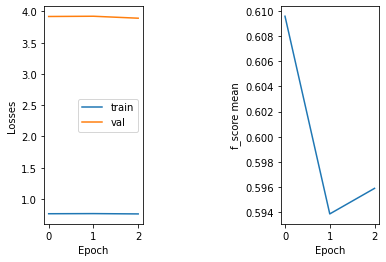

In [ ]:
lrbio_tab = np.array([ 1e-04, 1e-05, 1e-06, 1e-07, 1e-08])
lrdeci_tab = np.array([ 1e-05, 1e-06, 1e-07, 1e-08, 1e-09])
seuil_tab = np.arange(0.,0.5,0.02)
print(len(seuil_tab))
max = 0.
lrbio_max = 0.
lrdeci_max = 0.
seuil_max = 0.

for seuil in seuil_tab:
  for lrbio in lrbio_tab:
    for lrdeci in lrdeci_tab:
      history = fit(bert_model, 3, train_loader, lrbio=3e-06, lrdeci=1e-07, freezebio=False, seuil=seuil)
      titre = 'seuil : ' + str(seuil) + ' , lrbio : ' + str(lrbio) + ' , lrdeci : ' + str(lrdeci)
      print(titre)
      # print_history_test(history)
      f_score = np.mean(history['f_micro'])
      if max < f_score:
        history_temp = history
        max = f_score
        lrbio_max = lrbio
        lrdeci_max = lrdeci
        seuil_max = seuil


print("Meilleur f_score : ", max, "avec seuil = ", seuil_max, ", lrbio = ", lrbio_max, " et lrdeci = ", lrdeci_max)
print_history_test(history_temp)


=> Avec ce test, meilleure performance avec :</br>
- seuil : 0.24 </br>
- lrbio : 1e-4 </br>
- lrdeci : 1e-09

# Comparaison RNNClassifier et Fine tuning BioBert

## Entraînement

Reprise de la fonction 'print_history' du Notebook sur l'étude des données Litcovid

In [31]:
def print_history(hist:dict, losses:bool=True, preci:bool=True, all_good_preci:bool=True, f_micro:bool=True):
    """
    Génération des graphes d'entrainement avec les données extraites lors du fit (losses, etc). Possibilité de ne générer que certains des graphes.

    hist: dict
        résultat de la fonction fit
    """
    nb_epoch = len(hist['train_losses'])
    x = np.arange(0,nb_epoch)
    if losses:
      plt.plot(x,hist['train_losses'], label='train')
      plt.plot(x,hist['val_losses'], label='val')
      plt.xlabel('Epoch')
      plt.ylabel('Losses')
      plt.legend()
      plt.show()
    
    for (cond, name, label) in (zip([preci, all_good_preci, f_micro],
                          ['preci', 'all_good_preci', 'f_micro'],
                          ['Precision pour chaque label séparement', 'Precision pour l\'ensemble des labels', 'F-score micro'])):
        if cond:
            plt.plot(x,hist[name])
            plt.xlabel('Epoch')
            plt.ylabel(label)
            # plt.legend()
            plt.show()


  
# print_history(history)

100%|██████████| 13/13 [00:00<00:00, 103.66it/s]


epoch : 0	 - train loss : 1.777312157200832	 - val loss : 3.763303219693378	 - precision :0.86152273888605	 - all good precision : 0.10679611650485436	 - f-score micro : 0.34698795180722897



100%|██████████| 13/13 [00:00<00:00, 104.38it/s]


epoch : 1	 - train loss : 1.7771306505390243	 - val loss : 3.7615070713376535	 - precision :0.8630556974961676	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3526570048309179



100%|██████████| 13/13 [00:00<00:00, 101.53it/s]


epoch : 2	 - train loss : 1.7588333055084826	 - val loss : 3.7606741155235515	 - precision :0.8635666836995401	 - all good precision : 0.11650485436893204	 - f-score micro : 0.3535108958837772



100%|██████████| 13/13 [00:00<00:00, 104.87it/s]


epoch : 3	 - train loss : 1.742662644853779	 - val loss : 3.760977661725387	 - precision :0.8650996423096576	 - all good precision : 0.11650485436893204	 - f-score micro : 0.3497536945812808



100%|██████████| 13/13 [00:00<00:00, 107.09it/s]


epoch : 4	 - train loss : 1.727203976874258	 - val loss : 3.7623041023328465	 - precision :0.8666326009197751	 - all good precision : 0.11650485436893204	 - f-score micro : 0.35555555555555557



100%|██████████| 13/13 [00:00<00:00, 94.34it/s]


epoch : 5	 - train loss : 1.7353933278252096	 - val loss : 3.7643730385789596	 - precision :0.8686765457332652	 - all good precision : 0.11650485436893204	 - f-score micro : 0.3558897243107769



100%|██████████| 13/13 [00:00<00:00, 105.18it/s]


epoch : 6	 - train loss : 1.7131745488035912	 - val loss : 3.7671435087629894	 - precision :0.8702095043433827	 - all good precision : 0.11650485436893204	 - f-score micro : 0.3553299492385787



100%|██████████| 13/13 [00:00<00:00, 102.51it/s]


epoch : 7	 - train loss : 1.7196849187215169	 - val loss : 3.7696408392156213	 - precision :0.8702095043433827	 - all good precision : 0.11650485436893204	 - f-score micro : 0.3553299492385787



100%|██████████| 13/13 [00:00<00:00, 107.02it/s]


epoch : 8	 - train loss : 1.7054100597605986	 - val loss : 3.7727800387780643	 - precision :0.8717424629535002	 - all good precision : 0.1262135922330097	 - f-score micro : 0.35805626598465473



  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 1.6894552847918343	 - val loss : 3.7754258831727854	 - precision :0.8712314767501278	 - all good precision : 0.13592233009708737	 - f-score micro : 0.3538461538461538


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 3.860508208181344	 - val loss : 3.787848963320834	 - precision :0.9059785385794583	 - all good precision : 0.21359223300970873	 - f-score micro : 0.2868217054263566


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 3.4544777963675704	 - val loss : 3.711191510691226	 - precision :0.9080224833929484	 - all good precision : 0.22330097087378642	 - f-score micro : 0.3129770992366412


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 3.2227298325183344	 - val loss : 3.618230245645764	 - precision :0.9064895247828308	 - all good precision : 0.21359223300970873	 - f-score micro : 0.34408602150537637


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 2.9534549713134766	 - val loss : 3.512668517029401	 - precision :0.9039345937659683	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3380281690140845


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 2.631520897734399	 - val loss : 3.238971043558954	 - precision :0.9187531936637711	 - all good precision : 0.2815533980582524	 - f-score micro : 0.42181818181818187


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 2.27738608565985	 - val loss : 3.0551765219679154	 - precision :0.9279509453244762	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5052631578947369


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 1.9616287175346823	 - val loss : 2.9738393246548847	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5536332179930795


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 1.7183805727491193	 - val loss : 2.8120592172863415	 - precision :0.9335717935615738	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5547945205479453


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 1.5849528780170516	 - val loss : 3.043532751138928	 - precision :0.9294839039345938	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5369127516778522


100%|██████████| 13/13 [00:04<00:00,  2.97it/s]



epoch : 9	 - train loss : 1.460316774891872	 - val loss : 3.2530644240888575	 - precision :0.9279509453244762	 - all good precision : 0.2815533980582524	 - f-score micro : 0.5346534653465346


___________________________




Comparaison générale


* * * RNNClassifier * * * 
 f-score :  0.3538461538461538


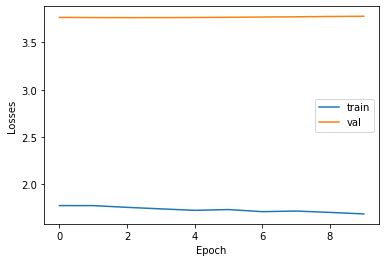

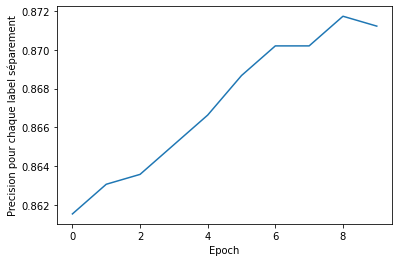

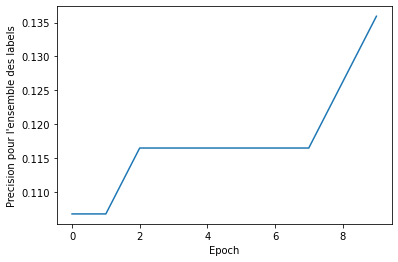

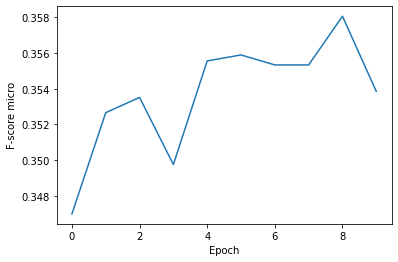



* * * Fine tuning Bert * * *
 f-score :  0.5346534653465346


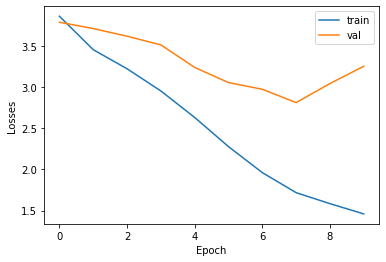

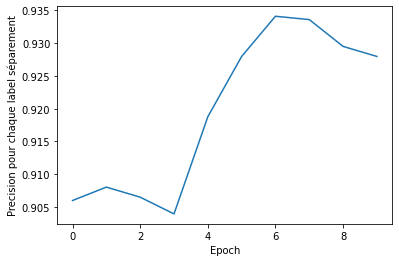

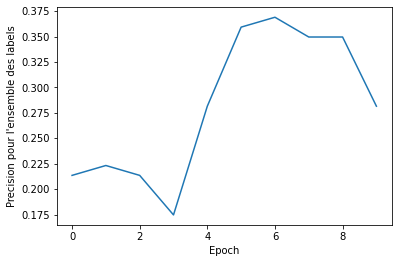

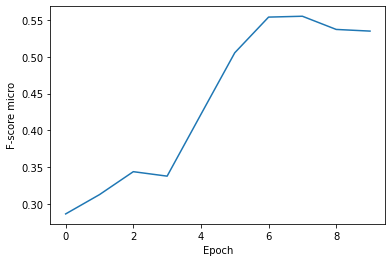

In [32]:
##RNN Classifier :
seuil = 0.11
lr = 1e-5
history_rnnclassif = fit_rnn(rnn_model, train_loader, 10, lr=lr, seuil=seuil)

##Fine tuning BioBERT :
seuil = 0.24
lr_bio = 1e-04
lr_deci = 1e-09

history_bert = fit(bert_model, 10, train_loader, lrbio=lr_bio, lrdeci=lr_deci, freezebio=False, seuil=seuil)


print("\n\n___________________________\n\n")
print("\n\nComparaison générale\n\n")
print('* * * RNNClassifier * * * ')
print(" f-score : ", history_rnnclassif['f_micro'][9])
print_history(history_rnnclassif)
print('\n\n* * * Fine tuning Bert * * *')
print(" f-score : ", history_bert['f_micro'][9])
print_history(history_bert)


## Test

In [33]:
test_loss, test_preci, accu_score, f_score = perf(rnn_model, test_loader, seuil=0.11)
print('RNN Classifier -','test loss :', test_loss, '- precision :', test_preci, '- all good precision :', accu_score, '- f-score micro :', f_score)
test_loss, test_preci, accu_score, f_score = perf(bert_model, test_loader, seuil=0.24)
print('BioBERT -','test loss :', test_loss, '- precision :', test_preci, '- all good precision :', accu_score, '- f-score micro :', f_score)

RNN Classifier - test loss : 3.624749992325989 - precision : 0.883964296706679 - all good precision : 0.07017543859649122 - f-score micro : 0.43982169390787523
BioBERT - test loss : 2.9973252056634916 - precision : 0.9372114496768237 - all good precision : 0.3567251461988304 - f-score micro : 0.5887096774193549


# Conclusion

Les performances avec le model Bert est plus performant qu'avec le model Rnn Classifier. On peut supposer que le manque de données explique les résultats si faible.